In [1]:
import scanpy as sc 

In [2]:
adata= sc.read_h5ad('/lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/bone_atlas_scvi_runs/processed_adata/adata_nlatent30_nlayers2_nhidden128_nhvg3000.h5ad')

In [1]:
adata

NameError: name 'adata' is not defined

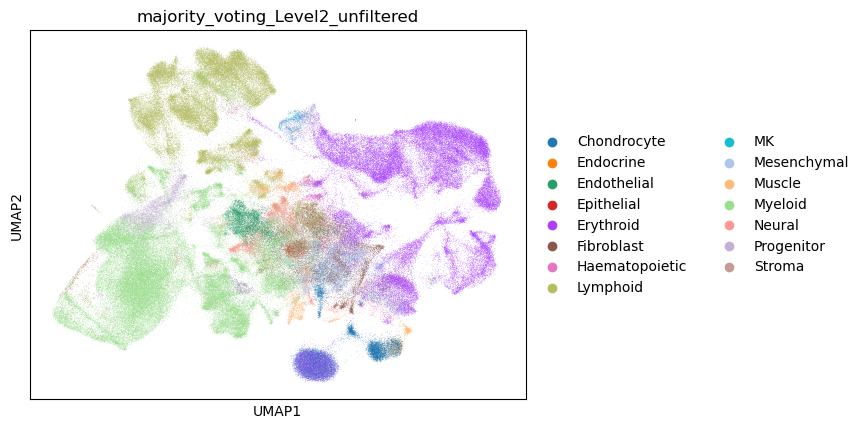

In [4]:
sc.pl.umap(adata, color='majority_voting_Level2_unfiltered')

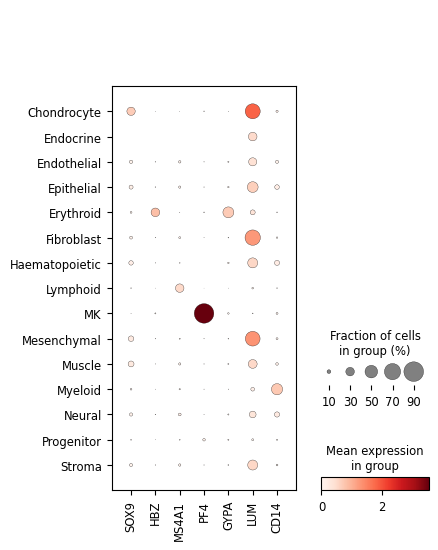

In [17]:
sc.pl.dotplot(adata,["SOX9","HBZ","MS4A1","PF4","GYPA","LUM","CD14"],'majority_voting_Level2_unfiltered')

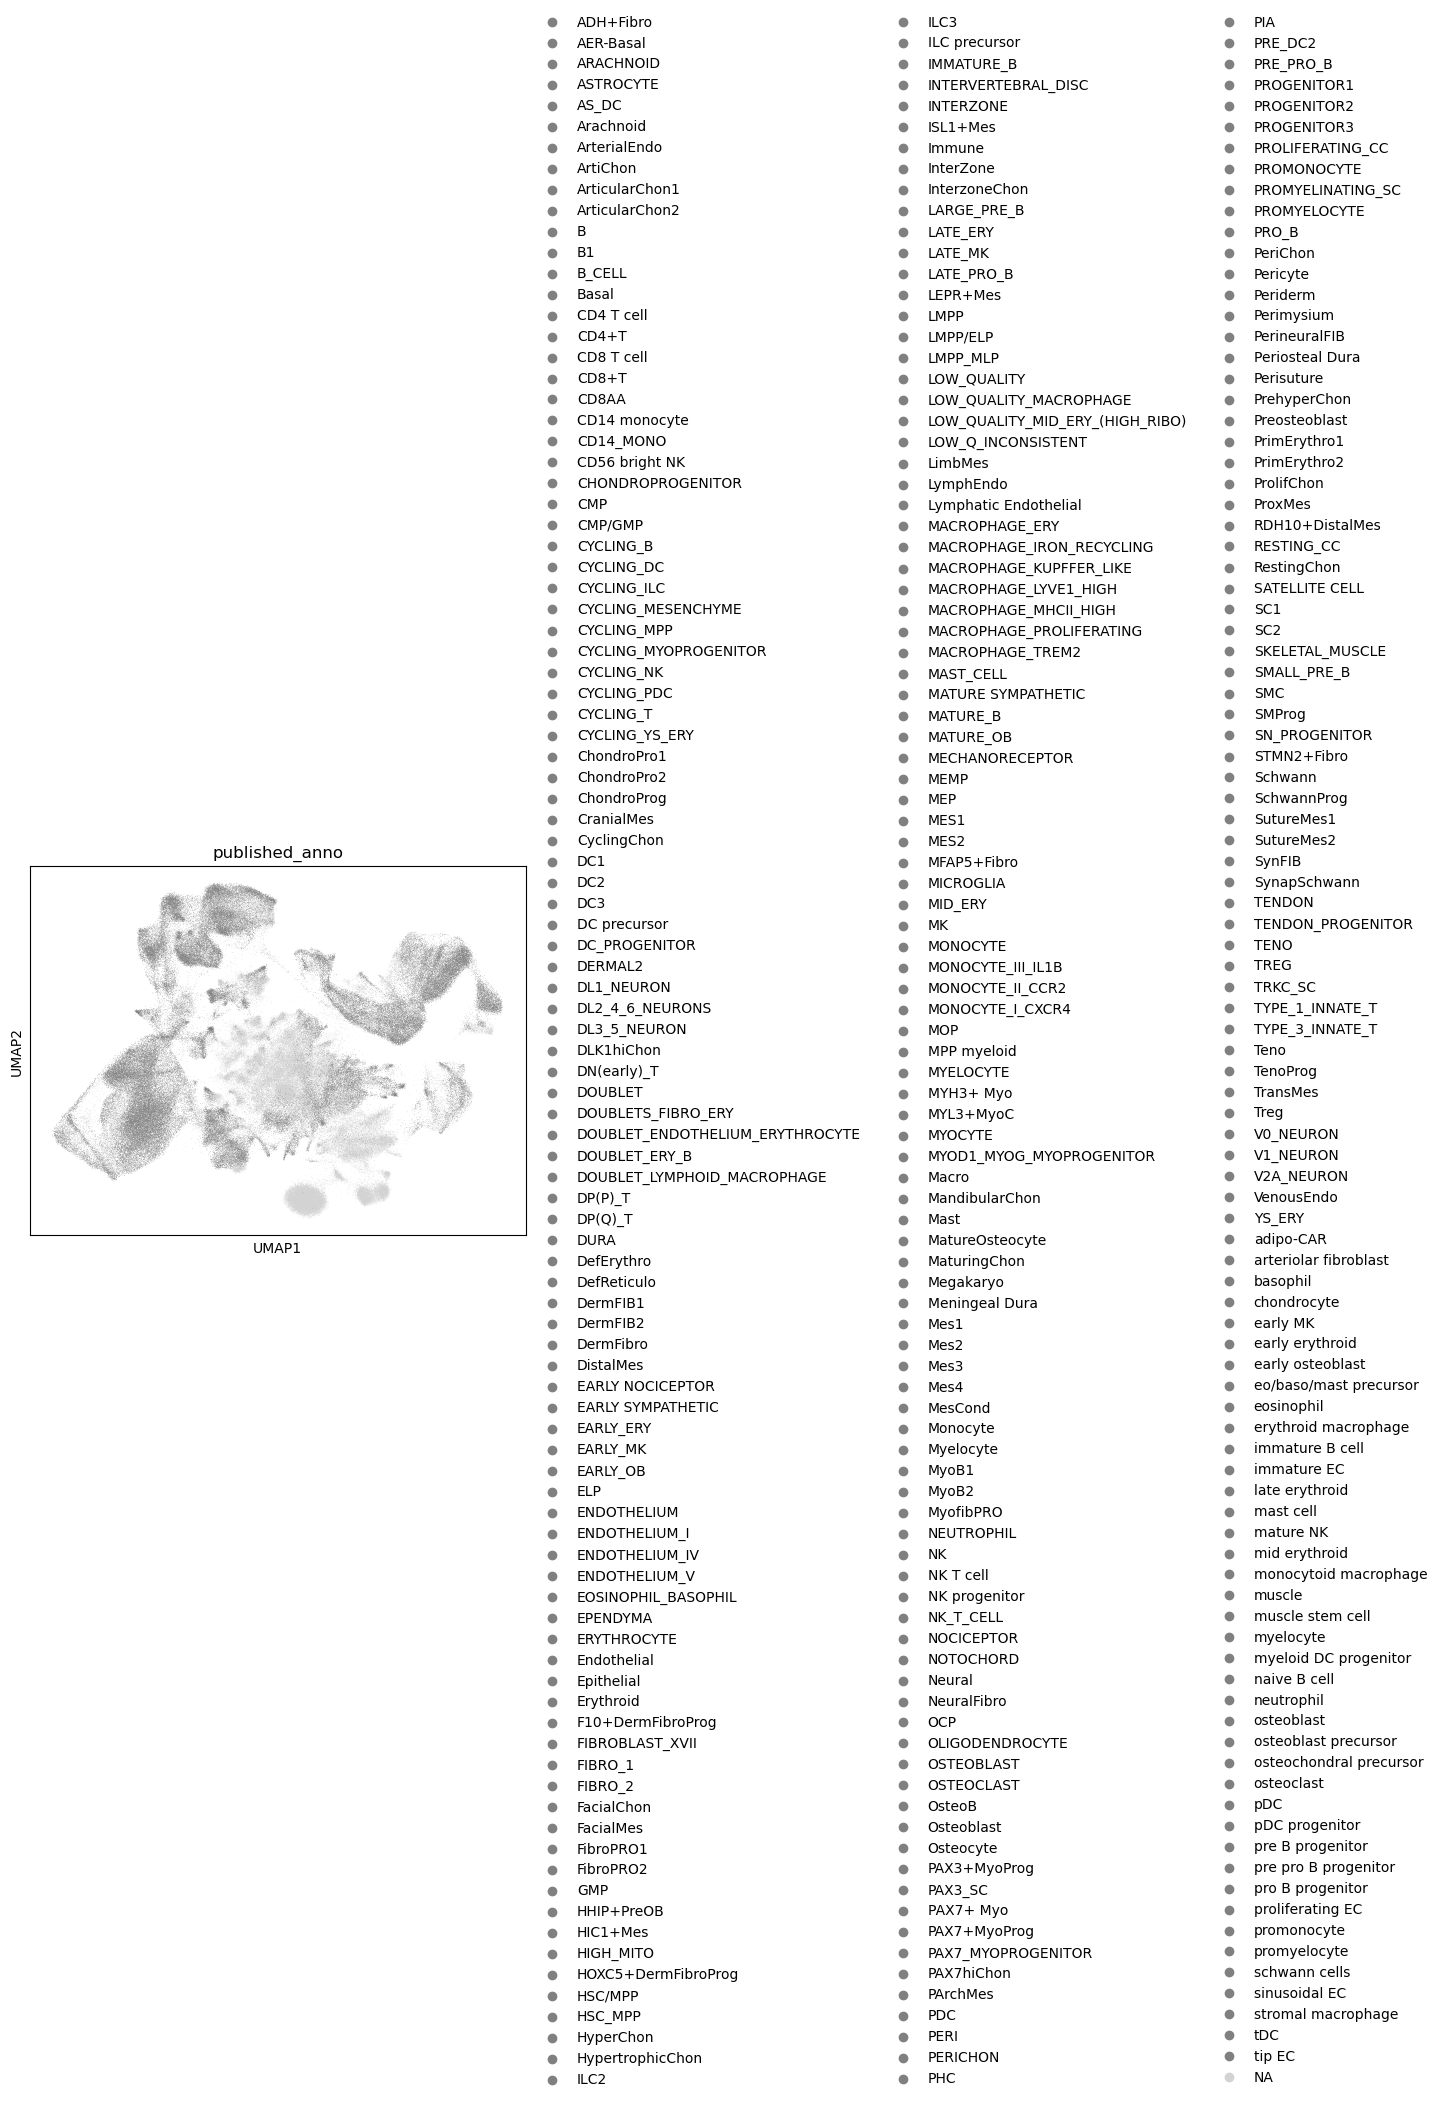

In [26]:
sc.pl.umap(adata, color='published_anno')

In [19]:
sc.pp.neighbors(adata, n_neighbors=25,use_rep="X_scVI", key_added="scvi")
sc.tl.umap(adata, neighbors_key='scvi')
sc.tl.leiden(adata, resolution= 3, key_added='leiden_res_3',neighbors_key='scvi')

/nfs/users/nfs_s/sm54/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_351917/389594307.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution= 3, key_added='leiden_res_3',neighbors_key='scvi')
IOStream.flush timed out


In [27]:
adata.write_h5ad('/lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/bone_atlas_scvi_runs/processed_adata/adata_nlatent30_nlayers2_nhidden128_nhvg3000_leiden.h5ad')

In [2]:
adata_full = sc.read_h5ad('/nfs/team298/sm54/BoneAtlasProject/data/bone_haem_compartment/haematopoeitic_compartment_celltypist.h5ad')


In [7]:
adata_full[adata_full.obs['Organ']=="spine"]

View of AnnData object with n_obs × n_vars = 6174 × 36601
    obs: 'barcode_raw', 'Sanger_ID', 'Cell_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'log1p_total_counts_rb', 'pct_counts_rb', 'total_counts_outlier', 'gene_counts_outlier', 'mt_outlier', 'Organ', '10X_Chemistry', 'Accession_ID', 'Age', 'Age(PCW)', 'Dataset', 'Donor_ID', 'FACS_Sorting', 'Anatomical_Site', 'Method', 'Multiplexed', 'Expected_Donors', 'Organism', 'Run_ID', 'Study', 'Technology', 'predicted_labels_unfiltered', 'over_clustering_unfiltered', 'majority_voting_unfiltered', 'predicted_labels_Level1_unfiltered', 'predicted_labels_Level2_unfiltered', 'majority_voting_Level1_unfiltered', 'majority_voting_Level2_unfiltered', 'mt_high_outlier', 'QC', 'scrublet_score_unfiltered',

In [209]:
adata_hvg= sc.read_h5ad('/lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/bone_atlas_scvi_runs/processed_adata/adata_nlatent30_nlayers2_nhidden128_nhvg3000_leiden.h5ad')

In [ ]:
adata_full.layers['raw_counts']= adata_full.X.copy()


In [9]:
adata_full[:,adata_full.var['highly_variable']]

View of AnnData object with n_obs × n_vars = 259876 × 2500
    obs: 'barcode_raw', 'Sanger_ID', 'Cell_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'log1p_total_counts_rb', 'pct_counts_rb', 'total_counts_outlier', 'gene_counts_outlier', 'mt_outlier', 'Organ', '10X_Chemistry', 'Accession_ID', 'Age', 'Age(PCW)', 'Dataset', 'Donor_ID', 'FACS_Sorting', 'Anatomical_Site', 'Method', 'Multiplexed', 'Expected_Donors', 'Organism', 'Run_ID', 'Study', 'Technology', 'predicted_labels_unfiltered', 'over_clustering_unfiltered', 'majority_voting_unfiltered', 'predicted_labels_Level1_unfiltered', 'predicted_labels_Level2_unfiltered', 'majority_voting_Level1_unfiltered', 'majority_voting_Level2_unfiltered', 'mt_high_outlier', 'QC', 'scrublet_score_unfiltered'

In [20]:
adata_hvg = adata_hvg[~adata_hvg.obs['majority_voting_Level2'].isna()].copy()

In [13]:
adata_full = adata_full[~adata_full.obs['majority_voting_Level2'].isna()].copy()

In [210]:
adata_hvg

AnnData object with n_obs × n_vars = 259912 × 3000
    obs: 'barcode_raw', 'Sanger_ID', 'Cell_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'log1p_total_counts_rb', 'pct_counts_rb', 'total_counts_outlier', 'gene_counts_outlier', 'mt_outlier', 'Organ', '10X_Chemistry', 'Accession_ID', 'Age', 'Age(PCW)', 'Dataset', 'Donor_ID', 'FACS_Sorting', 'Anatomical_Site', 'Method', 'Multiplexed', 'Expected_Donors', 'Organism', 'Run_ID', 'Study', 'Technology', 'predicted_labels_unfiltered', 'over_clustering_unfiltered', 'majority_voting_unfiltered', 'predicted_labels_Level1_unfiltered', 'predicted_labels_Level2_unfiltered', 'majority_voting_Level1_unfiltered', 'majority_voting_Level2_unfiltered', 'mt_high_outlier', 'QC', 'scrublet_score_unfiltered', 'predi

In [22]:
def transfer_embedding(name):
    emb = adata_hvg.obsm[name]
    cellid_to_idx = {cid: i for i, cid in enumerate(adata_hvg.obs.index)}
    
    # Map Cell_ID to indices in adata_hvg
    idx = adata_full.obs['Cell_ID'].map(cellid_to_idx)
    
    # Initialize result matrix
    result = np.full((adata_full.n_obs, emb.shape[1]), np.nan)
    
    # Mask for valid mappings
    valid_mask = idx.notnull()
    
    # Populate where matches exist
    result[valid_mask.values] = emb[idx[valid_mask].astype(int).values]
    
    adata_full.obsm[name] = result

# Execute for both embeddings
transfer_embedding('X_scVI')
transfer_embedding('X_umap')


In [23]:
adata_full

AnnData object with n_obs × n_vars = 259876 × 36601
    obs: 'barcode_raw', 'Sanger_ID', 'Cell_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'log1p_total_counts_rb', 'pct_counts_rb', 'total_counts_outlier', 'gene_counts_outlier', 'mt_outlier', 'Organ', '10X_Chemistry', 'Accession_ID', 'Age', 'Age(PCW)', 'Dataset', 'Donor_ID', 'FACS_Sorting', 'Anatomical_Site', 'Method', 'Multiplexed', 'Expected_Donors', 'Organism', 'Run_ID', 'Study', 'Technology', 'predicted_labels_unfiltered', 'over_clustering_unfiltered', 'majority_voting_unfiltered', 'predicted_labels_Level1_unfiltered', 'predicted_labels_Level2_unfiltered', 'majority_voting_Level1_unfiltered', 'majority_voting_Level2_unfiltered', 'mt_high_outlier', 'QC', 'scrublet_score_unfiltered', 'pred

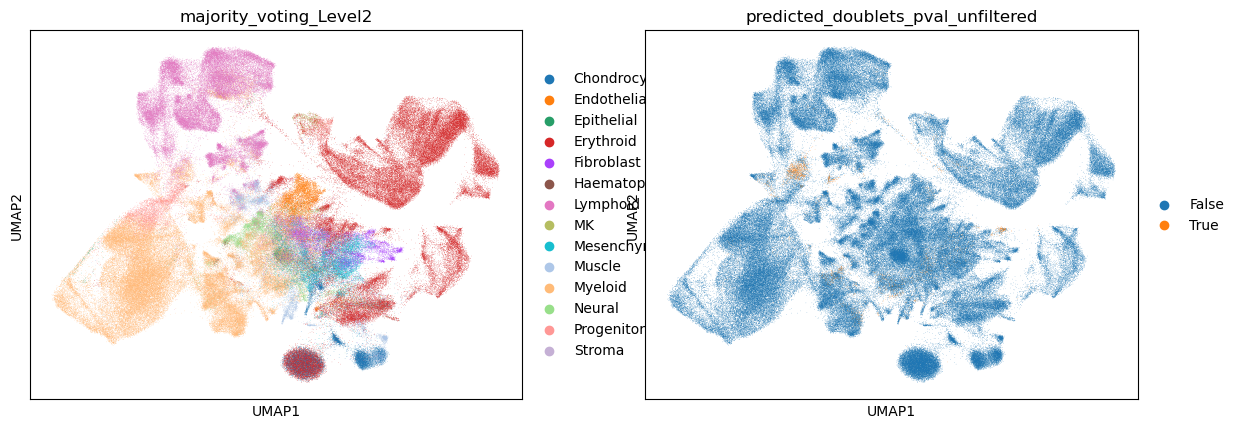

In [35]:
sc.pl.umap(adata_full, color=['majority_voting_Level2','predicted_doublets_pval_unfiltered'])

In [29]:
adata_full.obs['majority_voting_Level2'].value_counts()

majority_voting_Level2
Myeloid           78548
Erythroid         70150
Lymphoid          44969
Mesenchymal       10860
Chondrocyte       10686
Muscle             9893
Endothelial        8518
Fibroblast         8109
Neural             6803
Progenitor         6338
Epithelial         3140
Stroma              887
MK                  542
Haematopoietic      433
Name: count, dtype: int64

In [30]:
adata_full.layers['raw_counts']= adata_full.X.copy()

In [31]:
sc.pp.normalize_per_cell(adata_full, counts_per_cell_after=1e4)
sc.pp.log1p(adata_full)


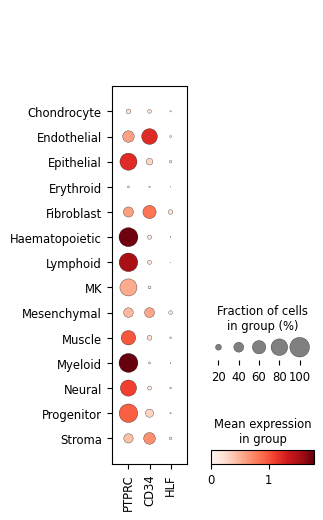

In [36]:
sc.pl.dotplot(adata_full,['PTPRC',"CD34","HLF"], 'majority_voting_Level2')

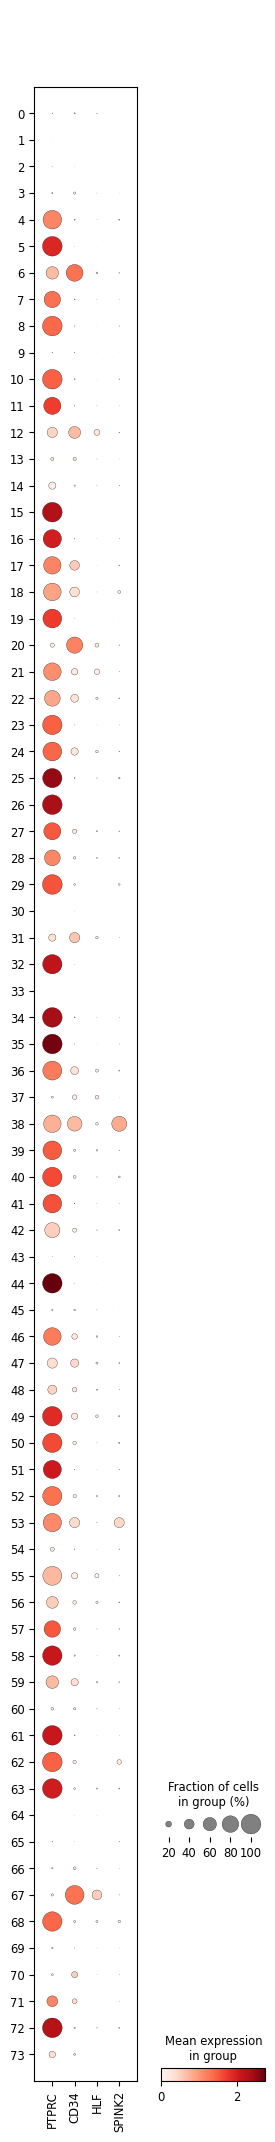

In [39]:
sc.pl.dotplot(adata_full,['PTPRC',"CD34","HLF","SPINK2"], 'leiden_res_3')

In [41]:
#sc.tl.rank_genes_groups(adata_full, groupby='leiden_res_3', method='wilcoxon', corr_method='benjamini-hochberg', groups='all', reference='rest', n_genes=500, use_raw=False, log_transformed=True)


In [3]:
adata_full

AnnData object with n_obs × n_vars = 259876 × 36601
    obs: 'barcode_raw', 'Sanger_ID', 'Cell_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'log1p_total_counts_rb', 'pct_counts_rb', 'total_counts_outlier', 'gene_counts_outlier', 'mt_outlier', 'Organ', '10X_Chemistry', 'Accession_ID', 'Age', 'Age(PCW)', 'Dataset', 'Donor_ID', 'FACS_Sorting', 'Anatomical_Site', 'Method', 'Multiplexed', 'Expected_Donors', 'Organism', 'Run_ID', 'Study', 'Technology', 'predicted_labels_unfiltered', 'over_clustering_unfiltered', 'majority_voting_unfiltered', 'predicted_labels_Level1_unfiltered', 'predicted_labels_Level2_unfiltered', 'majority_voting_Level1_unfiltered', 'majority_voting_Level2_unfiltered', 'mt_high_outlier', 'QC', 'scrublet_score_unfiltered', 'pred

In [2]:
#adata_full.write_h5ad('/lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/tmp_version.h5ad')
adata_full= sc.read_h5ad('/lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/tmp_version.h5ad')

In [4]:
import pandas as pd

markers_df = pd.read_csv('/nfs/team298/sm54/BoneAtlasProject/metadata/marker_genes/markers_panfetal.csv')


In [5]:
def split_batches(df, batch_size=20):
    return [df.iloc[i:i+batch_size] for i in range(0, len(df), batch_size)]

batches = split_batches(markers_df, batch_size=20)

In [6]:
batches

[               Cell_Type   Gene_1   Gene_2    Gene_3 Gene_4 Gene_5 Gene_6  \
 0                   ASDC  SIGLEC6      AXL       NaN    NaN    NaN    NaN   
 1              B lineage     CD19   VPREB1      PAX5    NaN    NaN    NaN   
 2                     B1     CD27      SPN     CCR10    NaN    NaN    NaN   
 3                  CD8aa    PDCD1     GNG4    ZNF683    NaN    NaN    NaN   
 4            CHONDROCYTE    CSPG4   COL9A1    HAPLN1    NaN    NaN    NaN   
 5                CYCLING    MKI67    MKI67       NaN    NaN    NaN    NaN   
 6              CYCLING_B    MKI67      NaN       NaN    NaN    NaN    NaN   
 7                    DC1   CLEC9A    BATF3       NaN    NaN    NaN    NaN   
 8                    DC2  CLEC10A     CD1C       NaN    NaN    NaN    NaN   
 9          DC_progenitor     ACY3    TIFAB     KIF17    NaN    NaN    NaN   
 10    DEVELOPING NEPHRON     PAX2      NaN       NaN    NaN    NaN    NaN   
 11                 DN(P)    TRGC2     TRDC    HIVEP3    NaN    

In [7]:
for idx, batch in enumerate(batches):
    gene_list = batch.iloc[:, 1:].values.flatten()
    gene_list = [gene for gene in gene_list if pd.notnull(gene)]
    
    sc.pl.dotplot(adata_full, var_names=gene_list, groupby='leiden_res_3', show=False, save=f'_batch_{idx+1}.png')

In [8]:
adata_full.obs['Manual_Annotation_Level1'].value_counts()

Manual_Annotation_Level1
Lymphoid           47194
T cell lineage     46181
Myeloid            40853
Macrophage         25267
Innate Lymphoid    23428
Progenitor         21764
Stromal            16245
Erythroid          11196
Muscle              6472
Epithelial          6311
Megakaryocyte       5034
Neural              4502
Endothelial         2170
Proliferative       1556
Unassigned           785
Other Immune         748
Name: count, dtype: int64

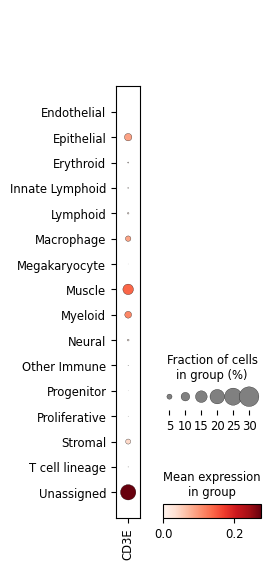

In [9]:
sc.pl.dotplot(adata_full, ["CD3E"],groupby='Manual_Annotation_Level1')

In [10]:
markers = {'DN(early)':['IGLL1','ST18'],
           'DN(P)':['TRGC2','TRDC','HIVEP3'],
           'DN(Q)':['RAG1','RAG2','TP53INP1','PTCRA','RGPD3'],
           'DP(P)':['SMPD3'], 
           'DP(Q)':['AQP3','RORC'], 
           'abT(entry)':['CCR9','SATB1','TOX2'], 
           'MATURE_T':['CCR7','CD5','CD27','CD8A','CD8B','CD4'], 
           #'agonist selection':['TNFRSF9','CD27','IKZF2','IKZF3'],
           'Treg':['FOXP3','CTLA4'], 
           'CD8aa':['PDCD1','GNG4','ZNF683'], 
           'innate':['KLRB1','ZBTB16'],
           'TYPE_3_INNATE_T':['CD40LG','RORC','CCR6','ANXA1'],
           'ILC3': ['RORC','IL1R1','IL23R','KIT'],
           'ILC2':['PTGDR2','HPGDS','GATA3'],
           'TYPE_1_INNATE_T':['NKG7','EOMES','TBX21','IFNG-AS1'],
           'NK': ['KLRD1','KLRF1','NKG7','NCAM1'],
           'CYCLING':['MKI67'],
          }

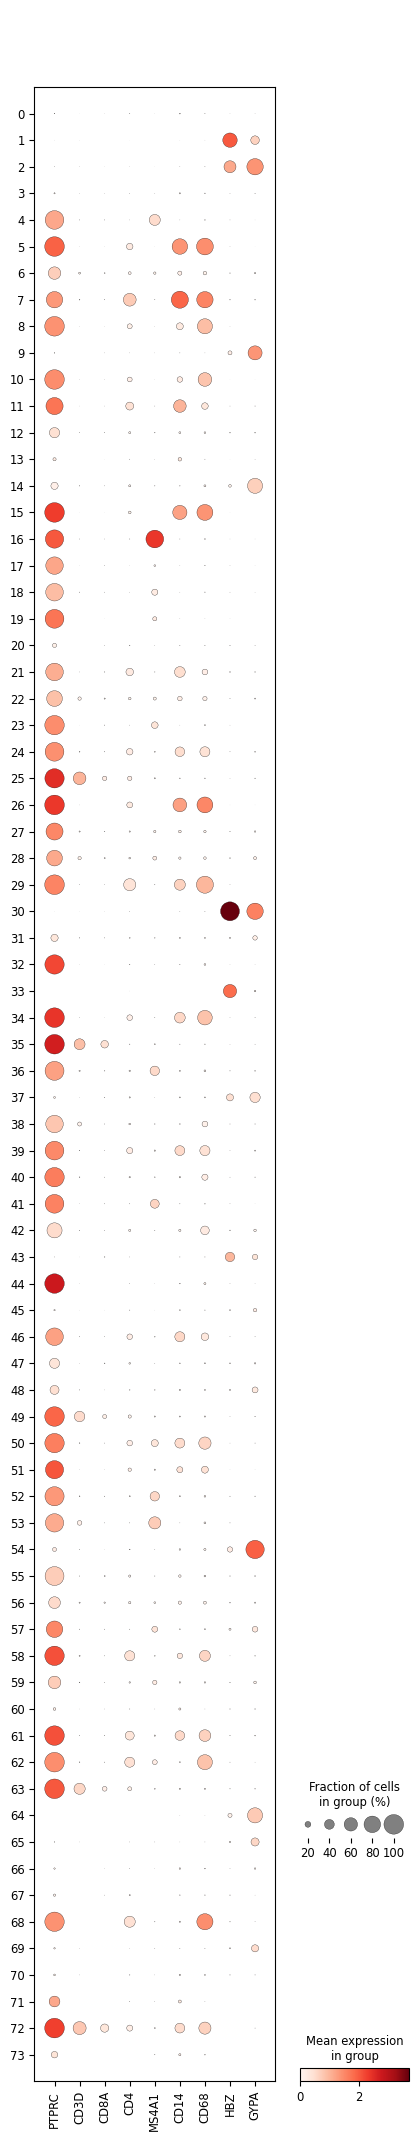

In [11]:
sc.pl.dotplot(adata_full,["PTPRC",'CD3D', 'CD8A', 'CD4','MS4A1', 'CD14', 'CD68',"HBZ","GYPA",],groupby='leiden_res_3')

In [12]:
dotplot_markers = {
    'Immune': ['PTPRC'],
    'HSC/MPP': ["CD34",'MLLT3', 'HLF', 'SPINK2','PRSS57'],
    'B Lineage': [ 'CD79A', 'CD19', 'MS4A1', 'PAX5', 'IGHM', 'IGHD'],
    'T/NK': ['IL7R', 'CD3D', 'CD3E', 'TRBC1', 'GZMA', 'TRAC'],
    'Erythrocyte': ['GYPA', 'GYPB', 'SLC4A1', 'HBE1', 'HBA2', 'HBB'],
    'Erythrocyte_YS': ['HBZ', 'HBE1'],
    'MK': ['ITGA2B', 'ITGB3', 'PF4', 'CLK1'],
    'Eo/baso/mast&Prog': ['TPSAB1', 'KIT', 'PRG2'],
    'DC': ['CLEC10A', 'CD1C', 'HLA-DPA1', 'HLA-DRA'],
    'Neutrophil': ['PRG2', 'LCN2', 'LTF', 'ITGAM'],
    'Monocyte_lineage': ['PGLYRP1', 'ORM1', 'S100A8', 'CD52','CD68', 'HLA-DRA', 'S100A8', 'CD14'],
    'Stromal Macrophage': ['MS4A6A', 'CXCR4', 'CCR2', 'IL1B', 'APOE', 'CD163'],
    'Microglia': ['TREM2', 'CX3CR1', 'P2RY12', 'SPARC'],
    'Muscle/Stroma': ['DST', 'ACTA2', 'TAGLN', 'MYH9', 'KDR', 'CTHRC1']
}


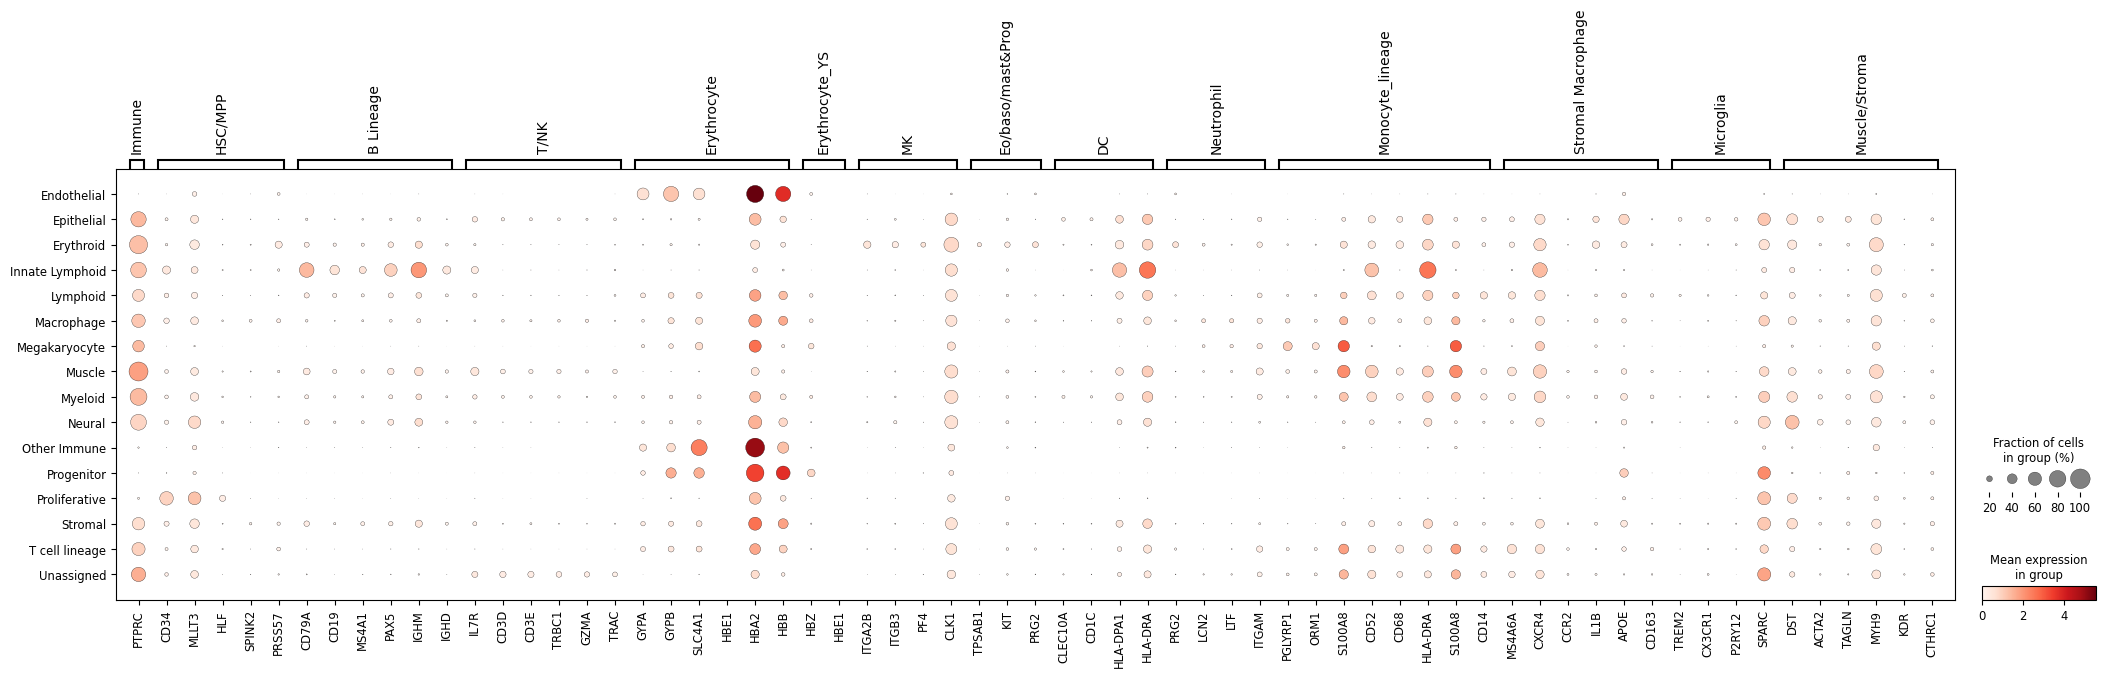

In [14]:
sc.pl.dotplot(adata_full,dotplot_markers,groupby='Manual_Annotation_Level1')

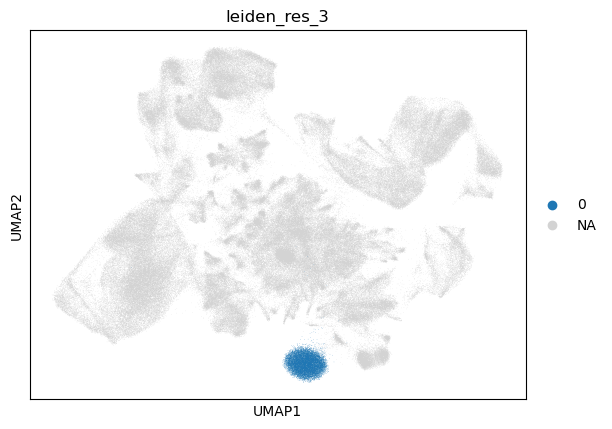

In [15]:
sc.pl.umap(adata_full, color=['leiden_res_3'], groups=['0'])

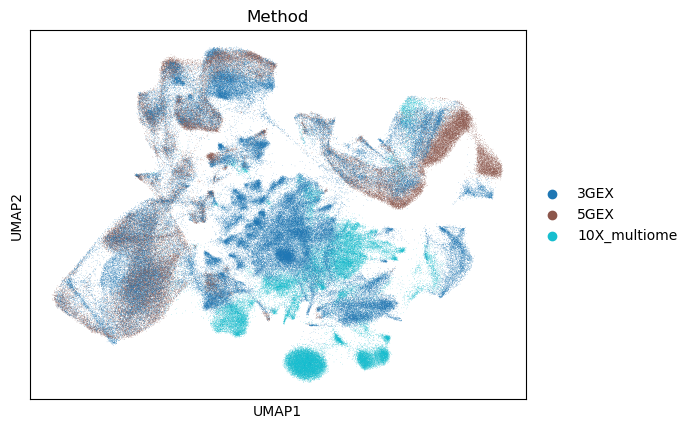

In [16]:
sc.pl.umap(adata_full, color=['Method'], groups=[],palette='tab10')

In [17]:
list(adata_full.obs['Study'].unique())

['To_et_al_2024',
 'Lawrence_et_al_2024',
 'He_et_al_2021',
 'Zhang_et_al_2023',
 'Jardine_Webb_2021',
 'Lawrence_et_al_2023']

In [18]:
import numpy as np

# Define mapping of Study to Organ
study_to_organ = {
    'Jardine_Webb_2021': 'Long Bone',
    'Zhang_et_al_2023': 'Long Bone',
    'Lawrence_et_al_2023': 'Long Bone',
     'Lawrence_et_al_2024': 'Spine'
    
}

# Update Organ column conditionally
adata_full.obs['Organ'] = np.where(
    adata_full.obs['Study'].isin(study_to_organ.keys()),
    adata_full.obs['Study'].map(study_to_organ),
    adata_full.obs['Anatomical_Site']  # retain existing value if Study not in mapping
)


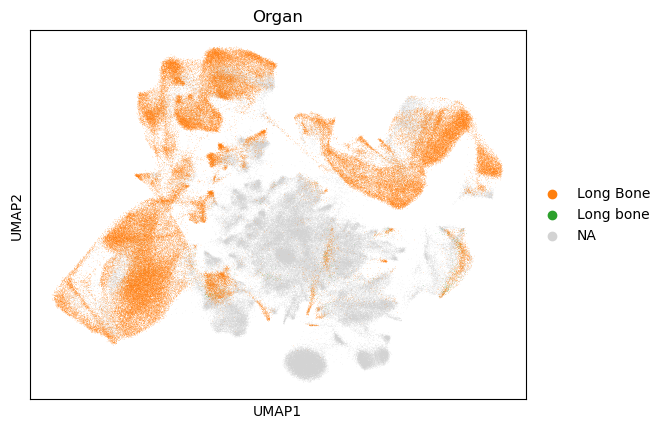

In [19]:
sc.pl.umap(adata_full, color=['Organ'], groups=["Long Bone","Long bone"],palette='tab10')

In [62]:
list(adata_full.obs['Organ'].unique())

['calvaria',
 'skullbase',
 'hip',
 'hip/knee',
 'hip/shoulder',
 'knee',
 'shoulder',
 'calvaria/skullbase',
 'Spine',
 'Limb bud',
 'Long bone',
 'Calvarial bone',
 'Long Bone']

In [20]:
# Define mapping rules
organ_rename_map = {
    'calvaria': 'Skull',
    'skullbase': 'Skull',
    'Calvarial bone': 'Skull',
    'calvaria/skullbase': "Skull",
    'Limb bud': 'Long Bone',
    'Long bone': 'Long Bone',
    'knee': 'Long Bone',
    'shoulder': 'Long Bone',
    'hip': 'Long Bone',
    'hip/knee': 'Long Bone',
    'hip/shoulder': 'Long Bone'
    
}

# Apply mapping, keeping existing value if not in mapping
adata_full.obs['Organ'] = adata_full.obs['Organ'].replace(organ_rename_map)


/tmp/ipykernel_1723319/2835036198.py:18: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata_full.obs['Organ'] = adata_full.obs['Organ'].replace(organ_rename_map)


In [21]:
adata_full.obs["Organ"].value_counts()

Organ
Long Bone    140728
Spine         82137
Skull         37011
Name: count, dtype: int64

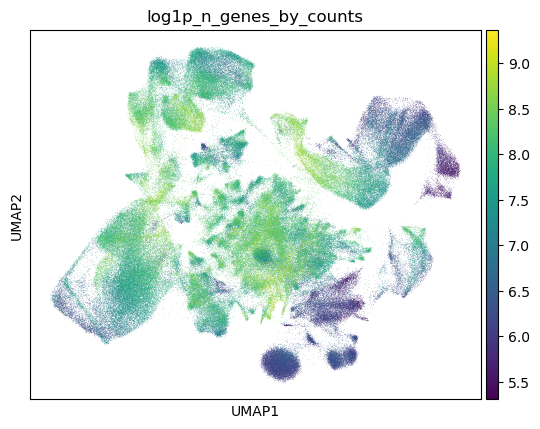

In [22]:
sc.pl.umap(adata_full, color=['log1p_n_genes_by_counts'], groups=[],palette='tab10')

In [23]:
pd.crosstab(adata_full.obs["Organ"],adata_full.obs["Donor_clean"])

Donor_clean  1111  2358  2361  2365  2368  2369  2370  2372  2382   2384  ...  \
Organ                                                                     ...   
Skull        2429     0  1380  3721     0   519   293  4302     0  19385  ...   
Long Bone       0  3057     0     0   728   268   387  2717  4071   1945  ...   
Spine           0     0     0     0     0     0     0     0     0      0  ...   

Donor_clean  HDBR15837  HDBR15868  HDBR15916  HDBR15918  HDBR15927  HDBR15948  \
Organ                                                                           
Skull                0          0          0          0          0          0   
Long Bone            0          0          0          0          0          0   
Spine             1584       1491       2383       1435        262      61375   

Donor_clean  HDBR15961  HDBR15982  HDBRXXX  SB19PCW  
Organ                                                
Skull                0          0     4716        0  
Long Bone            0          0        0    17289  
Spine             1731      11876        0        0  

[3 rows x 53 columns]

In [24]:
adata_full

AnnData object with n_obs × n_vars = 259876 × 36601
    obs: 'barcode_raw', 'Sanger_ID', 'Cell_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'log1p_total_counts_rb', 'pct_counts_rb', 'total_counts_outlier', 'gene_counts_outlier', 'mt_outlier', 'Organ', '10X_Chemistry', 'Accession_ID', 'Age', 'Age(PCW)', 'Dataset', 'Donor_ID', 'FACS_Sorting', 'Anatomical_Site', 'Method', 'Multiplexed', 'Expected_Donors', 'Organism', 'Run_ID', 'Study', 'Technology', 'predicted_labels_unfiltered', 'over_clustering_unfiltered', 'majority_voting_unfiltered', 'predicted_labels_Level1_unfiltered', 'predicted_labels_Level2_unfiltered', 'majority_voting_Level1_unfiltered', 'majority_voting_Level2_unfiltered', 'mt_high_outlier', 'QC', 'scrublet_score_unfiltered', 'pred

In [25]:
S=adata_full[(adata_full.obs['total_counts']>1000) &  (adata_full.obs['n_genes_by_counts']>200) ]

/nfs/users/nfs_s/sm54/.local/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


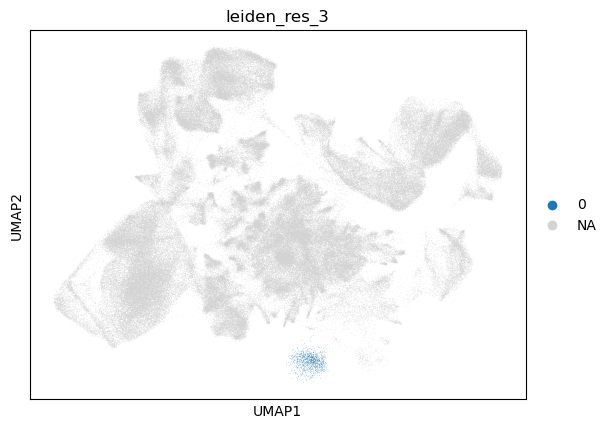

In [26]:
sc.pl.umap(S, color=['leiden_res_3'], groups=['0'],palette='tab10')

In [ ]:
combined_dict= {
'Neural progenitors' : [ 'OLIG2','NKX2-2'], 
'Glia' : ["NFIA"],
'Oligodendrocytes': ["SOX10", "SOX9", "PDGFRA", "S100B"], 
"CNS-Prog": ["SOX2"],
"CNS-Neuron": ["ELAVL3"],
"PNS-Prog": ["SOX10"],
"PNS-Neuron": ["SIX1"],
"Floorplate": ['PAX7', 'CDH7', 'TXLNB', 'CDHR3', 'PIFO', 'RRAD'],
'Mesoderm': ['PAX3','PRRX1','ZEB2'],
'Progenitors':['CDH5','PROX1','PECAM1'],
'LEC': ['TFPI','LYVE1','KDR'],
'Erythrocytes': ['HBA1','HBE1'],
'Mesoderm': ['PRRX1','ZEB2'],
'Neural Crest':['SOX10','WNT1'],
'Pia': ['S100A6','NGFR'],
'Arachnoid': ['ALDH1A2','CRABP2'],   
'Dura': ['SFRP1','DKK2'],
'Perivascular': ['LAMA1','PDGFRA'],
'Vascular endothelial': ['PECAM1','SLC2A1'],
'Arachnoid Barrier': ['SLC22A6','ABCB1','SLC22A8','CLDN11','CDH1'], 
    
'lymphoid progenitor':['CD34','SPINK2','IL7R','KIT'],
'PRE PRO B':['FLT3','CD19','VPREB1'], 
'PRO B':['MME','CDC45','DHFR','MKI67'], 
'LATE PRO B':['CD27','RAG1','DNTT','VPREB3'], 
'PRO -> PRE':['CD24','TNFRSF17'], 
'PRE -> IMMATURE':['MME','IDH2','SPIB','IL4R','IGHM'], 
'MATURE':['IGHD','MS4A1','CD40','FCER2'], 
'B1':['CD27','SPN','CCR10'],
'PLASMA B':['JCHAIN','SDC1','CD38'],
'CYCLING_B':['MKI67'],
    
'Early Progenitor':["CD34",	"SPINK2",	"MLLT3"],
'Myeloid_progenitor':["PRSS57",	"PRTN3",	"AZU1",],
'Neutrophil lineage':["ELANE",	"DEFA4",	"LCN2",	"LTF",	"ORM1",],
'Monocyte_lineage':["CD52",	"S100A8",	"MS4A6A",	"CD14",	"CXCR4",	"CCR2",	"IL1B",	"CD300E",],
'DC_progenitor':["ACY3",	"TIFAB",	"KIF17",],
'pDC':["CLEC4C",	"JCHAIN",	"IRF7",],
'ASDC':["SIGLEC6",	"AXL",],
'DC2':["CLEC10A",	"CD1C",],
'DC1':["CLEC9A",	"BATF3",],
'MIGRATORY_DC':["CCR7",	"LAMP3",],
'LANGERHANS_CELLS':["IDO1","CD207",	"CD1A",],
'EO_BASO_MAST':["CLC",	"KIT",	"TPSAB1",],
'MAC_LYVE1_HIGH':["F13A1",	"LYVE1",	"SPP1"],
 'MAC_IRON_RECYCLING':["CD5L",	"APOE",	"VCAM1",],
 'MAC_PROLIFERATING':["TOP2A",	"MKI67",],
 'MAC_MHCII_HIGH':["HLA-DRA",	"HLA-DPA1",	"CLEC7A",],
 'MAC_KUPFFER_LIKE':["ENG",	"KDR",	"CAV1",],
#'MAC_PERI':["SPP1","OLFML3","CCL3"],
#'MAC_ERY':['HBA1','HBA2','HBG2'],
'MAC_TREM2':["TREM2",	"P2RY12",],
'MAC_TLF+':["TIMD4", "FOLR2", 'LYVE1'],
'OSTEOCLAST':["MMP9",	"ACP5"],

"Megakaryocyte Erythroid Precursors":['TESPA1','GATA2','FCER1A'],
"Early_ERY":['KLF1','APOE','FAM178B'],
"Mid_ERY":[ 'BLVRB', 'CD36', 'OAT',],
"Late_ERY":[ 'GYPA', 'GYPB', 'SLC4A1'],
"YS_ERY" : ['HBZ','HBE1'],
"Early_MK":['HBD','PF4'],
"late_MK":['ITGA2B','ITGB3','CLK1'],
"VSMC_PERICYTE_III":['PDGFRA', 'TAGLN','RGS5'],
'MACROPHAGE_ERY':["C1QA","CD163"],
"Proliferating" : ["TOP2A","MKI67"],
'HSC_MPP':['CLEC9A','HLF','CD34','SPINK2'],
'MLP':['BCL11A','IL7R','IL2RG'],
'B lineage':['CD19','VPREB1','PAX5'],
'T lineage':['CD3D','BCL11B'],
'MEMP':['GATA2'],
'MEP':['KLF1','ITGA2B'],
'Ery lineage':['HBB','HBG1'],
'Myeloid lineage':['MPO','CSF1R','CEBPA'],
    
'FIBROBLAST':['PDGFRA'],
'SPLENIC FIBRO':['NKX2-5'],
'MYOFIBROBLAST':['ACTA2'],
'MYSENCHYMAL LYMPHOID TISSUE ORGANISER':['CCL19','CCL21','CXCL13'],
'MUSCLE SATELLITE CELLS':['PAX7','MYOD1','MYF5'],
'SKELETAL MUSCLE':['MYL1','ACTA1','TNNT3'],
'SMOOTH MUSCLE':['MYH11','TAGLN','ACTA2','DES'],
'MESOTHELIUM':['UPK3B','LRRN4'],
'OSTEOBLAST':['IBSP','PHOSPHO1','IFITM5'],
'CHONDROCYTE':['CSPG4','COL9A1','HAPLN1'],
'GLIAL CELL':['SOX10','SOX2'],
'NEURON':['TUBB2B','STMN4','ELAVL3'],
'MELANOCYTE':['PMEL','TYR','TYRP1','MLANA'],
'KERATINOCYTE':['KRT14','KRT5','GATA3'],
'HEPATOCYTE':['APOA1','ALB','AFP'],
'DEVELOPING NEPHRON':['PAX2'],
'EPITHELIUM':['EPCAM','CDH1','KRT19'],
'INTERSTITIAL CELLS OF CAJAL':['ETV1','KIT'],
'ENTEROENDOCRINE CELL':['CHGA','NEUROD1','NEUROG3'],
'ENDOTHELIUM':['CDH5','PECAM1','CD34'],
#'TIP EC':['VIM','PODXL','IL32','KDR'],
'VSMC/PERICYTE':['ACTA2','TAGLN','RGS5'],
'PERIVASCULAR MACROPHAGE':['C1QA','RNASE1','LYVE1'],
'CYCLING':['MKI67'],
'ERY':['HBB'],
'IMMUNE':['PTPRC'],
    
"HSPCs&Prog.": ["CD34", "SPINK2", "PRSS57"],
"Lymphoid": [ "CD7", "IL7R"],
"ysDC": [ "LTBR", "CLEC10A", "CD1C"],
"Monocyte":[ "LYZ","HLA-DRA", "FCGR3A"],
"Macrophage": ["CD4","CD14","C1QA"],
"TREM2 Mac.": ["TREM2","CX3CR1","P2RY12"],
"Granulocyte pre.": ["MPO","CLC","GATA2"],
"Mast Cell": ["TPSAB1", "KIT"],
"MK": ["ITGA2B","ITGB3","CLEC1B"],
"Erythroid": ["GYPA","HBE1","HBZ", "HBG1"], 
"Endothial(LYVE1+)": ["LYVE1","PECAM1","KDR","CD34"],
"Endothelial(PVLAP+)": ["PLVAP","ESAM","IL33","CD34"],
"Fibroblast": ["PDGFRA","THY1","VCAN", "LUM"],
"Smooth Muscle": [ "ACTA2","ITGA1","MCAM"],
"Mesothelium": ["KRT19","PDPN","UPK3B"],
"Endoderm": ["EPCAM","SPINK1","ASGR1","HNF4A"],

"Neuron (broad)": ["DCX", "ELAVL3","MAP2","STMN2", "RBFOX3",'TUBB2B','STMN4', 'SNAP25','BCL11B' ],
"Immature Neuron": ["INA"], # Braun et al., 2022
"Neuroblast": ["NHLH1", "NRXN3", "NHLH2", "NEUROD6","NEUROG2", "NEUROD1", "NEUROD4"], # Manno et al., 2016; Braun et al., 2022 
"Glioblast":["TNC","BCAN"], # # Braun et al., 2022 
"OPC":["PDGFRA","OLIG1", "OLIG2","SOX10"], # 
"Radial Glia": ["HES2","NES", "SOX2","SOX10"],   
'Microglia':[ 'TMEM119','P2RY12',"TREM2","AIF1","CCL3"], # AIF1 & CCL3 from Trevino et al., 2021 
'CAMs': ['MRC1',"CD163", "LYVE1","SIGLEC1","STAB1","MS4A1"], # CNS Associated Macrophages 
"Pericyte":["FOXC2","PDGFRB", "CD248", "RGS5"], # Trevino et al., 2021 ; "CD248", "RGS5": manno et al., 2016
"LPM":["LUM", "COL1A1"], # Leptomeningial ; Trevino et al., 2021 
"Endothelial":["CLDN5","PECAM1", "KDR"], #"CLDN5","PECAM1": Trevino et al., 2021; KDR, CLDN5: Manno et al., 2016 
 "RBC":["HEMGN"], # Trevino et al., 2021; need to combine this with erythrocytes
"EPENDYMAL":["FOXJ1"], # Trevino et al., 2021 
"Neural_Progenitor": ["NEUROG1", "TFDP2", "HMGA1", "HMGB2"], # Manno et al., 2016 
'LEC': ["PROX1","FLT4", "PDPN", 'LYVE1'], # Lymphatic endothelial cell; Jafree et al., 2021 
"Erythroid": ["GYPA","HBE1","HBZ", "HBG1"], 
"Endothial(LYVE1+)": ["LYVE1","PECAM1","KDR","CD34"],
"Endothelial(PVLAP+)": ["PLVAP","ESAM","IL33","CD34"],
"Fibroblast": ["PDGFRA","THY1","VCAN", "LUM"],
"Smooth Muscle": [ "ACTA2","ITGA1","MCAM"],
"Mesothelium": ["KRT19","PDPN","UPK3B"],
"Endoderm": ["EPCAM","SPINK1","ASGR1","HNF4A"],
    
'CD8 TRM' : ["CD3E",'CD8A', 'RUNX3', 'CD69', 'CD44'], 
"CD8_cytotoxic": ["CD8A", "GZMB", "CCL5"],
"CD8" : ["CD8A", "CD8B", "SELL"],
"Treg": ["FOXP3", "CTLA4"],
"CD4_TCM-like": ["SELL", "CCR7", "S1PR1"],
"CD4_TRM": ["CCR4", "FOXP1", "CD69"],
"CD4_Th": ["RORA", "FOXP1", "CCR4"],
"CD4_Th2": ["GATA3", "PPARG", "IL13"],
"Proliferating_TRM": ["FABP5", "MKI67"],
"CD4_Th1": ["TBX21", "STAT1"],
"CD4_Th17": ["RORC", "IL17A"],
"CD4_Th22":  ["IL21", "IL22"],
                      
"Osteoclast ": ["CTSK","ACP5",'MMP9','SIGLEC15',"CD68","ANPEP","FTL" ],
"Mac.stromal": [ "HMOX1","CD163","FOLR2","MNDA"], 
"Mac.monocytoid": ["CD14","S100A8","CD52","CD74","HLA-DPB1","LYZ"], 
"Mac.erythroid": ["BLVRB","GLUL","HLA-DRA"],
"B_lineage": ["HLA-DRA","IGLL1","CD79B","TCL1A","IGKC","MS4A1","CD19","LTB","VPREB1","PAX5"],
"ILC_prec.": ["PTPRC",'CD34','KLRB1',"CD3E","CD7",'IL7R',"KIT"],
"MK": ["ITGA2B","ITGB3","CLEC1B",'PF4', 'MYL9', 'TREML1', 'PPBP'],
'T/NK': ["CD8A",'KLRD1',"NKG7","XCL2","NCAM1"],
"Late_ERY":[ "HBZ",'GYPA', 'GYPB', 'SLC4A1'],
"Macrophage": ["CD4","CD14","C1QA","MRC1","LYVE1","SIGLEC1","CD68"],
'Monocyte_lineage':["CD52", "S100A8",   "MS4A6A",   "CD14", "CD300E","LYZ",],
'Mast':['KIT','TPSB2','CLU','CTSG','PRG2','CTSD','HPGDS','CPA3','GPNMB','VWA5A','MRGPRX2','RGS13','CMA1','MAOB','HLA-DRA',
            'HLA-DRB1','HLA-DRB5','PTPRC','TPSAB1','PRSS57','CNRIP1','GATA2'],
"HSC/MPP.": ["HLA-DRA", "CD34", "SPINK2"], 
"Pre pro-B cell": ["IGLL1","CD79B"],
"pro-B cell": ["TCL1A","IGKC","MS4A1","CD19"],
"pre-B cell/B": ["LTB"], 
"ILC pre.":["LTB","KLRB1","CD3E","PTPRC","CD7","IL32"],
"Early L/TL": ["CD8A"],
"NK": ["KLRD1","NKG7","XCL2","NCAM1"],
"Neut-my pro.": ["MPO","PLAC8","LYZ"], 
"pDC pre.": ["IL3RA",'CLEC9A'],# PLAC8 is not specific 
"DC pre.": ["S100A9",'CD1C'],
"DC1": ['CLEC9A'], 
"DC2" : ["CD1C"], 
"Mono pre.": ['S100A9'], 
"Monocyte": ['CCL4','CD14'], 
"Mono-mac": ['FCGR3A','CD4','C1QA'], 
"Kuppfer cell" : ['VCAM1'], 
"VCAM1+ EI mac": ['GYPA'], 
"MEMP": ['SERPINB1'], 
"Mast": ['TPSAB1','KIT'],
"MK": ['PF4','ITGA2B'], 
"Early ERY": ['GATA1','KLF1'], 
"Mid ERY": ['ALAS2','HBA1'], 
"Late ERY": ['BPGM'], 
"Endo": ['ESAM'], 
"Fibro":['ECM1'], 
"Hepatocyte": ['APOA1'],
"Osteoclast ": ["CTSK","ACP5",'MMP9','SIGLEC15',"CD68","ANPEP","FTL" ],

"Mac.stromal": [ "HMOX1","CD163","FOLR2","MNDA"], 
"Mac.monocytoid": ["CD14","S100A8","CD52","CD74","HLA-DPB1","LYZ"], 
"Mac.erythroid": ["BLVRB","GLUL","HLA-DRA"],
"ELP": ["RUNX2", "FLT3","LTB"], # HCA Immune 2018
'Early lymphoid/T lymphoid': ['ETS1','IL32','GATA3'], # Popescu et al. 2019
"HSC": ["CD34","SPINK2","CRHBP"],
"CMP": ["MPO","CTSG","FLT3"],
"GMP": ["ELANE","MPO","PRTN3"],
"MEMP": ["GATA1","GATA2","ITGA2B","FCER1A"], # FCER1A, GATA1 and GATA2 liver 
"Neut_myeloid_pro.":["SERPINB1","MPO","LYZ"],
"ELP": ["RUNX2", "FLT3","LTB"], # HCA Immune 2018
'Early lymphoid/T lymphoid': ['ETS1','IL32','GATA3'], # Popescu et al. 2019
"ILC_precursor": ["LST1","HPN","SCN1B"],
"NK": ['GNLY','NKG7','XCL2'],
"CD16+ NK": ["FCGR3A","GNLY","NKG7"],
"CD16- NK": ["CD160","GNLY","NKG7"],
'Trans. NK': ["CCL5","GZMK",'FCGR3A'],
"ILC": ["S100A13",'TLE1','AREG'],
'ILC1': ['CXCR3','CD3D','IKZF3'],
'ILC2': ['GATA3','KLRG1','HPGDS'], 
'ILC3': ['IL4I1','RORC','KIT'],
 "MNP": ["HLA-DPA1","HLA-DQA1",'FGL2'],
"Mast": ["TPSAB1","TPSB2",'CPA3'],
"ERY/MK":["PTPRC",'EPCAM','GYPA','GYPB','ITGA2B','ITGB3'],
"EC": ['CDH5','KDR','ANPEP'], 
"Gran/mast/DC": ["MSR1","KIT", 'IL3RA','IL5RA','HLA-DRA','HAVCR2','CLEC9A'], 
"Monocytes": ["CD1C",'CLEC4C','CD14','CD52','CD34','CD96'], 
"Neurtrophil": ["ITGB2",'SELL','ITGAM'], 
"B lineage": ["CEACAM8",'CD99','CD79A','MME','MS4A1','TNFRSF13C'],
"CD4T/CD56 NK": ['CD3E','KLRB1'], 
    
 'primordial germ cell': ['NANOG', 'NANOS3', 'POU5F1', 'DPPA3', 'DND1'],
 'sclerotome': ['PAX1', 'PAX9', 'CNMD'],
 'lateral plate mesoderm': ['PRRX1', 'PRRX2', 'LHX9','MSX1','MSX2','TBX2', 'TBX3', 'PITX1'],
 'radial glia': ['SOX2', 'NES', 'MKI67'],
 'radial glia cortical': ['SOX2', 'NES', 'MKI67', 'EMX2', 'PAX6', 'FOXG1'],
 'radial glia diencephalon': ['SOX2', 'NES', 'MKI67', 'PAX6', 'WNT2B'],
 'radial glia midbrain': ['SOX2', 'NES', 'MKI67', 'EN1', 'OTX2'],
 'radial glia mid-hindbrain boundary': ['SOX2','NES', 'MKI67','FGF18','SPRY1','SPRY2'],
 'radial glia hindbrain': ['SOX2', 'NES', 'MKI67', 'PAX6'],
 'glial progenitor': ['TNC', 'BCAN'],
 'NEUROG1+ neural progenitor': ['NEUROG1'],
 'NEUROG1+ neural progenitor midbrain': ['NEUROG1', 'OTX2'],
 'intermediate neural progenitor': ['PPP1R17', 'EOMES'],
 'intermediate neural progenitor cortical': ['PPP1R17','EOMES','EMX2','FOXG1'],
 'pA1 neural progenitor': ['OLIG3', 'ATOH1'],
 'pA2 neural progenitor': ['OLIG3', 'NEUROG1'],
 'pA3-4 neural progenitor': ['OLIG3', 'PTF1A'],
 'DA1 neuron': ['LHX2', 'LHX9'],
 'DA3 neuron': ['LBX1', 'TLX3', 'LMX1B'],
 'DB1 neuron': ['LHX1', 'LHX5', 'PAX2', 'LBX1'],
 'DL1 neuron': ['BARHL1', 'BARHL2'],
 'DL2 neuron': ['TLX3'],
 'DL3 neuron': ['OTP'],
 'DL5 neuron': ['LMX1B', 'ASCL1'],
 'DL6 neuron': ['DMRT3'],
 'p2 neural progenitor': ['FOXN4', 'NKX6-1', 'VSX1'],
 'pMNv neural progenitor': ['NKX2-2', 'NKX6-1'],
 'V0 interneuron': ['LHX1', 'LHX5', 'PAX2', 'EVX1', 'EVX2'],
 'V1 interneuron': ['LHX1', 'LHX5', 'PAX2', 'EN1'],
 'V2A-B interneuron': ['LHX3', 'VSX2', 'SOX14', 'GATA2', 'GATA3'],
 'V3 interneuron': ['SIM1', 'NKX2-2'],
 'motor neuron': ['MNX1', 'ISL1'],
 'inhibitory neuron cortical': ['GAD1','GAD2','ADARB2','RELN','SNCG','LAMP5',  'FOXG1'],
 'inhibitory neuron midbrain': ['SGK2', 'PCOLCE2', 'OTX2'],
 'inhibitory neuron hindbrain': ['GAD1','GAD2', 'ADARB2','RELN','SNCG', 'LAMP5', 'GBX2'],
 'excitatory neuron': ['SLC17A6','SLC17A7','LINC00507','FEZF2', 'THEMIS', 'EMX1'],
 'excitatory neuron cortical': ['SATB2','BCL11B','SLC17A7', 'TBR1', 'EMX2', 'FOXG1'],
 'excitatory neuron midbrain': ['SLC17A6', 'SLC17A7','LINC00507','FEZF2', 'THEMIS', 'EMX1','OTX2'],
 'excitatory neuron hindbrain': ['SLC17A6','SLC17A7','LINC00507','FEZF2','THEMIS','EMX1','PAX6'],
 'ELAVL4+ neuron': ['ELAVL4', 'INA', 'TUBB3'],
 'ELAVL4+ neuron cortical': ['ELAVL4', 'INA', 'TUBB3', 'FOXG1'],
 'ELAVL4+ neuron midbrain': ['ELAVL4', 'INA', 'TUBB3', 'OTX2'],
 'dopaminergic neuron': ['TH', 'DDC', 'SLC6A3', 'KCNJ6', 'SLC18A2', 'CALB1'],
 'dopaminergic neuron midbrain': ['TH','DDC','SLC6A3','KCNJ6','SLC18A2','CALB1','OTX2'],
 'dopaminergic neuron hindbrain': ['TH','DDC','SLC6A3','KCNJ6','SLC18A2','CALB1','PAX6'],
 'serotenergic neuron': ['TPH2', 'SLC6A4', 'FEV', 'GATA3', 'CHGB'],
 'sympathetic neuron': ['PHOX2B', 'DBH', 'TLX2', 'CHGA'],
 'enteric neuron': ['VIP'],
 'proprioceptive neuron': ['HMX1', 'HMX2'],
 'floor plate': ['SHH', 'FOXA2'],
 'roof plate': ['LMX1A', 'WNT1', 'GDF7', 'WNT3A'],
 'ependymal glia': ['FOXJ1'],
 'ependymal glia midbrain': ['FOXJ1', 'OTX2'],
 'oligodendrocyte precursor': ['SOX2', 'EGFR', 'OLIG1', 'OLIG2', 'DLL3'],
 'oligodendrocyte precursor cortical': ['SOX2',
  'EGFR', 'OLIG1', 'OLIG2','DLL3','FOXG1','EMX2','PAX6'],
 'oligodendrocyte precursor midbrain': ['SOX2', 'EGFR','OLIG1','OLIG2','DLL3','OTX2'],
 'oligodendrocyte precursor hindbrain': ['SOX2','EGFR','OLIG1','OLIG2','DLL3','PAX6'],
 'schwann cell precursor': ['MPZ', 'SOX10', 'PLP1', 'FOXD3'],
 'retinal pigment epithelium': ['MITF','PAX2','DCT','CCK','ALDH1A3','TRPM3','POMC','HSD17B2'],
 'retinal neural progenitors': ['VSX2','OPTC','CLDN1','RAX','SIX3','PAX6','DAPL1','CCL2','ALDH1A1','SIX6'],
    
 'auditory vesicle neural progenitors': ['OC90','BRICD5','S100A1','PLPP2','WFDC2','LMX1A','GATA3', 'DLX5'],
 'melanocyte': ['CRYAB', 'TYRP1', 'PMEL', 'TYR', 'DCT', 'MLANA', 'MITF'],
 'periderm': ['UPK2','GABRP', 'KRT18','KRT8','ELF3','IL36RN','MUC16', 'VTCN1'],
 'keratinocyte': ['KRT5', 'KRT15', 'KRT18', 'KRT19', 'RASSF6', 'RASSF7'],
 'lower genital keratinocyte': ['TP63', 'FOXA1'],
 'dermal fibroblast precursor': ['EN1', 'SIM1', 'PAX3', 'OSR1', 'TWIST2'],
 'dermal fibroblast': ['WNT2', 'HOXC4','HOXC5','FRZB','SLC6A13','SLC1A3','SLC6A1','EPHA7','CYP1B1'],
 'atrial cardiomyocyte': ['NPPA', 'MYL7', 'MYL4'],
 'ventricular cardiomyocyte': ['MYH7', 'MYL2', 'FHL2'],
 'atrioventricular pacemaker': ['MSX2', 'TBX3', 'CACNA1D'],
 'mesothelial epicardium': ['ALDH1A2', 'LRP2', 'ITLN1', 'TBX18'],
 'epicardial derived cell': ['TBX18'],
 'vascular smooth muscle': ['TAGLN', 'MYL9', 'FOXC2', 'PRDM6', 'TBX1'],
 'early endothelium': ['S100A10', 'PODXL', 'ITM2A', 'SLC2A1'],
 'early lymphatic endothelium': ['TFF3', 'NTS', 'PROX1'],
 'arterial endothelium': ['ALDH1A1','IL33','GJA5','DKK2','UNC5B','DLL4','PRND','GPIHBP1', 'CXCR4'],
    
 'haeamatopoietic stem and progenitor cell': ['MLLT3', 'HOPX', 'SPINK2'],
 'myeloid progenitor': ['CD34', 'PRSS57', 'AZU1', 'CTSG', 'PRTN3'],
 'monocyte': ['HLA-DRA', 'LYZ', 'FCGR3A'],
 'monocyte-DC': ['HLA-DRA','LYZ', 'FCGR3A','CLEC9A','BTLA','BATF3','CLEC10A','CD1C','CSF3R','S100A12'],
 'macrophage': ['CD4', 'CD14', 'C1QA'],
 'microglia': ['TREM2', 'CX3CR1', 'P2RY12'],
 'DC2': ['CLEC10A', 'CD1C'],
 'DC3': ['CSF3R', 'S100A12'],
 'B cell progenitor': ['SPINK2','IL7R','DNTT', 'VPREB1','RAG1', 'CD19','IGHM','IGHD','MS4A1'],
 'megakaryocyte erythroid mast progenitor': ['GATA1','GATA2','TESPA1', 'CTNNBL1','CD34'],
 'mast cell': ['TPSAB1', 'KIT'],
 'megakaryocyte': ['PF4', 'MYL9', 'TREML1', 'PPBP'],
 'early erythroid': ['HBE1', 'HBZ'],
 'mid-late erythroid': ['GATA1', 'KLF1', 'GYPA', 'HBA1'],
    
 'dental pulp cell': ['SOX9', 'SCUBE1'],
 'odontoblast precursor': ['DKK1', 'RUNX2', 'PDPN', 'NOTUM', 'ETV4', 'FRMD5'],
 'intevertebral disc': ['NDUFA4L2'],
 'meningeal fibroblast': ['ALDH1A2', 'CLDN11', 'ACTG2'],
 'limb mesenchyme': ['ALX4', 'IRX3', 'HIC1', 'GSC', 'OBSCN'],
 'limb fibroblast': ['TBX5','TBX15','TBX18','TBX3','PDGFRA','HIC1','SHOX2', 'MEOX2'],
 'limb chondrocyte precursor': ['SOX6','SOX9','SHOX','SHOX2','TBX4','PITX1','HOXA10','CNMD'],
 'limb digit chondrocyte precursor': ['TBX5','HOXA13','HOXD13','SOX9','HAND2','SALL1'],
 'chondrocyte precursor': ['GDF5', 'PRDM16'],
 'osteoblast precursor': ['RUNX2', 'DLX5'],
 'myofibroblast': ['PDGFRA', 'OBSCN', 'NEAT1'],
 'fibroblast': ['GDF10', 'PDGFRA', 'UNC5C', 'MECOM'],
 'skeletal muscle progenitor': ['PAX3', 'MYOD1','TNNT1','ACTC1','PAX7', 'MSC'],
 'skeletal myoblast': ['PAX7', 'MYF5', 'TTN'],
 'hypaxial skeletal myoblast': ['PAX7', 'LBX1', 'MYOD1'],
 'skeletal myocyte': ['MYOG', 'MYH3'],
 'perimysium': ['HLX'],
 'tendon progenitor': ['OSR2', 'MEOX2', 'SCX'],
 'intermediate mesoderm gonadomesenephros': ['OSR1', 'WT1', 'PAX8', 'LBX2'],
 'coelomic gonadal epithelium': ['UPK3B', 'KRT19', 'LRRN4', 'GATA6'],
 'wolffian duct': ['CALB1', 'WNT9B'],
 'kidney podocyte': ['NPHS1', 'NPHS2', 'WT1'],
 'renal fibroblast': ['CDH9', 'GATA5'],
 'hepatic stellate cell': ['HGF'],
 'hepatocyte': ['APOA1', 'AFP'],
 'pancreatic progenitor': ['PDX1'],
 'pharyngeal arch 1 neural crest': ['DLX1', 'DLX2', 'DLX3','DLX4','DLX5','DLX6'],
 'pharyngeal arch 2 neural crest': ['DLX1',  'DLX2',  'DLX3', 'DLX4','DLX5','DLX6','HOXA2','HOXB2'],
 'pharyngeal epithelium': ['ISL1', 'NKX2-3', 'NKX2-5', 'FOXP2'],
 'oesophageal epithelium': ['SOX2', 'KLF5', 'DCDC2', 'EPS8L2', 'FOXA1'],
 'stomach epithelium': ['KLF5','ONECUT2','FOXA1','AGR3','FXYD3','KLF5','DCDC2','STARD10','FOXA1'],
 'intestinal epithelium': ['CDX2'],'lung epithelium': ['NKX2-1', 'TPPP3', 'LRRC36', 'CPM', 'UGT2B7'], 
    
    
 "HSC_Signature": ["RUNX1", "MLLT3","HOXA9","MECOM","HLF","SPINK2"],
    "HSC_Enriched": ["MYB","GFI1","STAT5A",'ZBTB16','HOPX','GATA2',
                     'GBP4','ITGA2B','KCNK17','SVOPL','C2orf88','SELP',
                     'CD82','ITGA4','GP9','TMEM163','RAB27B','SMIM24',
                     'GMPR','PDLIM1','ALDH1A1','NRGN','CCDC173','CXCL3',
                     'CYTL1','PRSS57','ANGPT1'],
    'HSC_shared_Endo': ["CD34","PECAM1",'CDH5','ECSCR.1','CALCRL',
                       'PROCR','ESAM','TIE1','EMCN'], 
    "Immature": ['CDH5', 'MEIS2', 'IGFBP2', 'HOXB9'],
     "Mature": ['PROM1', 'HLA-DRA', 'HEMGN', 'MSI2'],
    'ProE/BasoE' : ['FTH1','TPT1','EEF1A1',],
    
'Early-PolyE' : ['ACTB','CFL1',],
    
'Late-PolyE' : ['ARL6IP1','SKP1','TOP1','GYPA','HBD','GYPB'],
    
'Early-OrthoE' : ['SLC25A37','ARL4A','HBD','BNIP3L',
'TMCC2','XPO7','BSG','IFIT1B','ALAS2','LPIN2',],
    
'Late_OrthoE' : ['HBA2','HBA1','UBB','MKRN1'], 
    "ELP": ["RUNX2", "FLT3","LTB"], # HCA Immune 2018
    'Early lymphoid/T lymphoid': ['ETS1','IL32','GATA3'], # Popescu et al. 2019
    
    "ILC_precursor": ["LST1","HPN","SCN1B"],
    "NK": ['GNLY','NKG7','XCL2'],
    "CD16+ NK": ["FCGR3A","GNLY","NKG7"],
     "CD16- NK": ["CD160","GNLY","NKG7"],
    'Trans. NK': ["CCL5","GZMK",'FCGR3A'],
    "ILC": ["S100A13",'TLE1','AREG'],
    'ILC1': ['CXCR3','CD3D','IKZF3'],
    'ILC2': ['GATA3','KLRG1','HPGDS'], 
    'ILC3': ['IL4I1','RORC','KIT'],


    
 "B": ["CD79A","MS4A1","CD19"],
               "transitional": ["CD24","MYO1C","MS4A1"],
              "large_pre_B":["CD24","MME","MKI67"],
              "pre_pro_B":["ZCCHC7","IL7R","RAG1"],
               "pro-b":["MME","DNTT",'IGLL1'],
                "small_pre_B":["IGLL5",'CD24',"MME"],
               "cycling_B":['CD19',"TOP2A","MKI67"],

    'adipo-CAR': ['CXCL12', 'LPL', 'APOE', 'GAS6'],
    'arteriolar fibroblast': ['DCN', 'SERPINF1', 'COL3A1', 'BGN'],
                    'basophil': ['IL3RA', 'IL5RA', 'CLC', 'HDC'], 'CD14 monocyte': ['VCAN', 'CD14', 'S100A8', 'CD300E'], 
                    'CD4 T cell': ['CD3D', 'TRAC', 'AQP3', 'CD40LG'], 'CD56 bright NK': ['GZMK', 'XCL1', 'NKG7', 'PRF1'], 
                    'CD8 T cell': ['CD3D', 'TRAC', 'CD8A', 'CD8B'], 'chondrocyte': ['LECT1', 'COL9A3', 'HAPLN1', 'COL11A1'], 
                    'CMP': ['SPINK2', 'CD34', 'CTSG', 'PRTN3'], 'DC precursor': ['CD34', 'IRF8', 'CLEC10A', 'CD1C'], 
                    'DC1': ['CLEC9A', 'CADM1', 'XCR1'], 'DC2': ['CD1C', 'FCER1A', 'CLEC10A', 'HLA-DPB1'], 
                    'DC3': ['CD1C', 'CLEC10A', 'S100A8', 'CD36', 'CD163'], 'early erythroid': ['EPCAM', 'MYC', 'APOC'],
                    'early MK': ['ITGA2B', 'GP1BA', 'CMTM5', 'PF4'], 'early osteoblast': ['IFITM5', 'CPE', 'OMD', 'BGLAP', 'IBSP'],
                    'erythroid macrophage': ['CD14', 'APOE', 'F13A1', 'BLVRB'], 'ELP': ['FLT3', 'IL7R', 'RAG1', 'LTB'],
                    'endosteal fibroblast': ['DCN', 'SERPINF1', 'COL3A1', 'BGN'], 'eo/baso/mast precursor': ['CD34', 'SPINK2', 'CSF2RB', 'HDC'], 
                    'eosinophil': ['EPX', 'IL5RA', 'CLC', 'HDC'], 'GMP': ['CD34', 'PRSS57', 'CALR', 'AZU1'], 
                    'HSC/MPP': ['MLLT3', 'HLF', 'SPINK2', 'CD34', 'PRSS57'], 'ILC precursor': ['ZBTB16', 'RORC', 'GATA3', 'KIT'], 
                    'immature B cell': ['CD19', 'PAX5', 'IGHM', 'MS4A1'], 'immature EC': ['KDR', 'MRC1', 'PODXL', 'S100A10'], 
                    'late erythroid': ['PRDX2', 'GYPA', 'HBA1', 'BLVRB'], 'mast cell': ['KIT', 'TPSAB1', 'HPGDS', 'HDC'],
                    'mature NK': ['PRF1', 'GZMH', 'FCGR3A', 'NKG7'], 'MEMP': ['CD34', 'GATA1', 'GATA2', 'TESPA1', 'CTNNBL1'],
                    'MEP': ['CD34', 'GATA1', 'GATA2', 'KLF1', 'PLEK'], 'mid erythroid': ['KLF1', 'GATA1', 'PRDX2', 'GYPA'], 
                    'MK': ['PF4', 'MYL9', 'TREML1', 'PPBP'], 'promonocyte': ['VCAN', 'CD14', 'S100A8', 'FCN', 'CD300E'], 
                    'monocytoid macrophage': ['S100A8', 'HLA-DRA', 'SPP1', 'CD14'], 'LMPP': ['CD34', 'SPINK2', 'BCL11A', 'IL7R', 'IL2RG'],
                    'MPP myeloid': ['CD34', 'SPINK2', 'GATA2', 'MPO', 'CSF1R'], 'muscle': ['SPARCL1', 'DSTN', 'TPM2', 'ACTA2'], 
                    'muscle stem cell': ['SPARCL1', 'DSTN', 'TPM2', 'ACTA2'], 'myelocyte': ['LCN2', 'CAMP', 'LTF', 'STOM', 'CEACAM8'], 
                    'myeloid DC progenitor': ['CD34', 'IRF8', 'CLEC10A', 'CD1C'], 'myofibroblast': ['MAF', 'PDLIM4', 'COL3A1', 'DES'], 
                    'naive B cell': ['CD19', 'IGHM', 'MS4A1', 'FCER2', 'CD40'], 'MOP': ['PRTN3', 'S100A8', 'LYZ', 'IRF8'], 
                    'neutrophil': ['ITGAM', 'MMP9', 'PGLYRP1', 'ORM1'], 'NK T cell': ['CD8A', 'KLRB1', 'TRAC', 'NKG7'],
                    'NK progenitor': ['CD34', 'PRSS57', 'SOX4', 'TOX', 'NKG7'], 'osteoblast': ['IFITM5', 'CPE', 'OMD', 'BGLAP', 'IBSP'], 
                    'osteoblast precursor': ['IFITM5', 'CPE', 'OMD', 'BGLAP', 'IBSP'], 'osteochondral precursor': ['ENG', 'NT5E', 'THY1', 'CD44'], 
                    'osteoclast': ['ACP5', 'CTSK', 'MMP9'], 'pDC': ['GZMB', 'JCHAIN', 'SERPINF1'], 'pDC progenitor': ['CD34', 'IRF8', 'JCHAIN', 'GZMB'],
                    'pre B progenitor': ['CD19', 'PAX5', 'IGHM', 'IGHD'], 'pre pro B progenitor': ['IL7R', 'CD19', 'MME', 'RAG1', 'EBF1'], 
                    'pro B progenitor': ['DNTT', 'MME', 'VPREB1', 'RAG1'], 'proliferating EC': ['KDR', 'RAMP2', 'PODXL', 'MKI67'], 
                    'promyelocyte': ['MPO', 'ELANE', 'CTSG', 'PRTN3', 'AZU1'], 'schwann cells': ['MAG', 'APLP1', 'CNP', 'CLDN11'], 
                    'sinusoidal EC': ['STAB1', 'MRC1', 'LYVE1', 'ENG', 'TSPAN7'], 'stromal macrophage': ['CD14', 'APOE', 'F13A1', 'C1QC', 'SPP1'], 
                    'tDC': ['AXL', 'SIGLEC6', 'CD22'], 
                    'tip EC': ['KDR', 'LYVE1', 'ENG', 'DLL4'], 'Treg': ['CD3D', 'TRAC', 'TIGIT', 'FOXP3']
    

}


In [28]:
celltypist_lymphoid= {
    "ELP": ["RUNX2", "FLT3","LTB"], # HCA Immune 2018
    'Early lymphoid/T lymphoid': ['ETS1','IL32','GATA3'], # Popescu et al. 2019
    
    "ILC_precursor": ["LST1","HPN","SCN1B"],
    "NK": ['GNLY','NKG7','XCL2'],
    "CD16+ NK": ["FCGR3A","GNLY","NKG7"],
     "CD16- NK": ["CD160","GNLY","NKG7"],
    'Trans. NK': ["CCL5","GZMK",'FCGR3A'],
    "ILC": ["S100A13",'TLE1','AREG'],
    'ILC1': ['CXCR3','CD3D','IKZF3'],
    'ILC2': ['GATA3','KLRG1','HPGDS'], 
    'ILC3': ['IL4I1','RORC','KIT'],

    


}


celltypist_progenitors=  {
    "ELP": ["RUNX2", "FLT3","LTB"], # HCA Immune 2018
    'Early lymphoid/T lymphoid': ['ETS1','IL32','GATA3'], # Popescu et al. 2019

    "HSC": ["CD34","SPINK2","CRHBP"],
    "CMP": ["MPO","CTSG","FLT3"],
    "GMP": ["ELANE","MPO","PRTN3"],
    "MEMP": ["GATA1","GATA2","ITGA2B","FCER1A"], # FCER1A, GATA1 and GATA2 liver 
    "Neut_myeloid_pro.":["SERPINB1","MPO","LYZ"]}

celltypist_immune= {
    
    "MNP": ["HLA_DPA1","HLA-DQA1",'FGL2'],
    "Mast": ["TPSAB1","TPSB2",'CPA3']

}



cell_typist_B={"B": ["CD79A","MS4A1","CD19"],
               "transitional": ["CD24","MYO1C","MS4A1"],
              "large_pre_B":["CD24","MME","MKI67"],
              "pre_pro_B":["ZCCHC7","IL7R","RAG1"],
               "pro-b":["MME","DNTT",'IGLL1'],
                "small_pre_B":["IGLL5",'CD24',"MME"],
               "cycling_B":['CD19',"TOP2A","MKI67"]
              }

In [29]:
fbm_cell_types= {'adipo-CAR': ['CXCL12', 'LPL', 'APOE', 'GAS6'],
    'arteriolar fibroblast': ['DCN', 'SERPINF1', 'COL3A1', 'BGN'],
                    'basophil': ['IL3RA', 'IL5RA', 'CLC', 'HDC'], 'CD14 monocyte': ['VCAN', 'CD14', 'S100A8', 'CD300E'], 
                    'CD4 T cell': ['CD3D', 'TRAC', 'AQP3', 'CD40LG'], 'CD56 bright NK': ['GZMK', 'XCL1', 'NKG7', 'PRF1'], 
                    'CD8 T cell': ['CD3D', 'TRAC', 'CD8A', 'CD8B'], 'chondrocyte': ['LECT1', 'COL9A3', 'HAPLN1', 'COL11A1'], 
                    'CMP': ['SPINK2', 'CD34', 'CTSG', 'PRTN3'], 'DC precursor': ['CD34', 'IRF8', 'CLEC10A', 'CD1C'], 
                    'DC1': ['CLEC9A', 'CADM1', 'XCR1'], 'DC2': ['CD1C', 'FCER1A', 'CLEC10A', 'HLA-DPB1'], 
                    'DC3': ['CD1C', 'CLEC10A', 'S100A8', 'CD36', 'CD163'], 'early erythroid': ['EPCAM', 'MYC', 'APOC'],
                    'early MK': ['ITGA2B', 'GP1BA', 'CMTM5', 'PF4'], 'early osteoblast': ['IFITM5', 'CPE', 'OMD', 'BGLAP', 'IBSP'],
                    'erythroid macrophage': ['CD14', 'APOE', 'F13A1', 'BLVRB'], 'ELP': ['FLT3', 'IL7R', 'RAG1', 'LTB'],
                    'endosteal fibroblast': ['DCN', 'SERPINF1', 'COL3A1', 'BGN'], 'eo/baso/mast precursor': ['CD34', 'SPINK2', 'CSF2RB', 'HDC'], 
                    'eosinophil': ['EPX', 'IL5RA', 'CLC', 'HDC'], 'GMP': ['CD34', 'PRSS57', 'CALR', 'AZU1'], 
                    'HSC/MPP': ['MLLT3', 'HLF', 'SPINK2', 'CD34', 'PRSS57'], 'ILC precursor': ['ZBTB16', 'RORC', 'GATA3', 'KIT'], 
                    'immature B cell': ['CD19', 'PAX5', 'IGHM', 'MS4A1'], 'immature EC': ['KDR', 'MRC1', 'PODXL', 'S100A10'], 
                    'late erythroid': ['PRDX2', 'GYPA', 'HBA1', 'BLVRB'], 'mast cell': ['KIT', 'TPSAB1', 'HPGDS', 'HDC'],
                    'mature NK': ['PRF1', 'GZMH', 'FCGR3A', 'NKG7'], 'MEMP': ['CD34', 'GATA1', 'GATA2', 'TESPA1', 'CTNNBL1'],
                    'MEP': ['CD34', 'GATA1', 'GATA2', 'KLF1', 'PLEK'], 'mid erythroid': ['KLF1', 'GATA1', 'PRDX2', 'GYPA'], 
                    'MK': ['PF4', 'MYL9', 'TREML1', 'PPBP'], 'promonocyte': ['VCAN', 'CD14', 'S100A8', 'FCN', 'CD300E'], 
                    'monocytoid macrophage': ['S100A8', 'HLA-DRA', 'SPP1', 'CD14'], 'LMPP': ['CD34', 'SPINK2', 'BCL11A', 'IL7R', 'IL2RG'],
                    'MPP myeloid': ['CD34', 'SPINK2', 'GATA2', 'MPO', 'CSF1R'], 'muscle': ['SPARCL1', 'DSTN', 'TPM2', 'ACTA2'], 
                    'muscle stem cell': ['SPARCL1', 'DSTN', 'TPM2', 'ACTA2'], 'myelocyte': ['LCN2', 'CAMP', 'LTF', 'STOM', 'CEACAM8'], 
                    'myeloid DC progenitor': ['CD34', 'IRF8', 'CLEC10A', 'CD1C'], 'myofibroblast': ['MAF', 'PDLIM4', 'COL3A1', 'DES'], 
                    'naive B cell': ['CD19', 'IGHM', 'MS4A1', 'FCER2', 'CD40'], 'MOP': ['PRTN3', 'S100A8', 'LYZ', 'IRF8'], 
                    'neutrophil': ['ITGAM', 'MMP9', 'PGLYRP1', 'ORM1'], 'NK T cell': ['CD8A', 'KLRB1', 'TRAC', 'NKG7'],
                    'NK progenitor': ['CD34', 'PRSS57', 'SOX4', 'TOX', 'NKG7'], 'osteoblast': ['IFITM5', 'CPE', 'OMD', 'BGLAP', 'IBSP'], 
                    'osteoblast precursor': ['IFITM5', 'CPE', 'OMD', 'BGLAP', 'IBSP'], 'osteochondral precursor': ['ENG', 'NT5E', 'THY1', 'CD44'], 
                    'osteoclast': ['ACP5', 'CTSK', 'MMP9'], 'pDC': ['GZMB', 'JCHAIN', 'SERPINF1'], 'pDC progenitor': ['CD34', 'IRF8', 'JCHAIN', 'GZMB'],
                    'pre B progenitor': ['CD19', 'PAX5', 'IGHM', 'IGHD'], 'pre pro B progenitor': ['IL7R', 'CD19', 'MME', 'RAG1', 'EBF1'], 
                    'pro B progenitor': ['DNTT', 'MME', 'VPREB1', 'RAG1'], 'proliferating EC': ['KDR', 'RAMP2', 'PODXL', 'MKI67'], 
                    'promyelocyte': ['MPO', 'ELANE', 'CTSG', 'PRTN3', 'AZU1'], 'schwann cells': ['MAG', 'APLP1', 'CNP', 'CLDN11'], 
                    'sinusoidal EC': ['STAB1', 'MRC1', 'LYVE1', 'ENG', 'TSPAN7'], 'stromal macrophage': ['CD14', 'APOE', 'F13A1', 'C1QC', 'SPP1'], 
                    'tDC': ['AXL', 'SIGLEC6', 'CD22'], 
                    'tip EC': ['KDR', 'LYVE1', 'ENG', 'DLL4'], 'Treg': ['CD3D', 'TRAC', 'TIGIT', 'FOXP3']}
fbm_stroma= { 
                                           
                        "Osteoclast ": ["CTSK","ACP5",'MMP9','SIGLEC15',"CD68","ANPEP","FTL" ],
    
                        "Mac.stromal": [ "HMOX1","CD163","FOLR2","MNDA"], 
    
     "Mac.monocytoid": ["CD14","S100A8","CD52","CD74","HLA-DPB1","LYZ"], 
     "Mac.erythroid": ["BLVRB","GLUL","HLA-DRA"],
}

fbm_celltypes= {
"ERY/MK":["PTPRC",'EPCAM','GYPA','GYPB','ITGBAB','ITGB3'],
 
 "EC": ['CDH5','KDR','ANPEP'], 
    
"Gran/mast/DC": ["MSR1","KIT", 'IL3RA','IL5RA','HLA-DRA','HAVCR2','CLEC9A'], 
    
    "Monocytes": ["CD1C",'CLEC4C','CD14','CD52','CD34','CD96'], 
    "Neurtrophil": ["ITGB2",'SELL','ITGAM'], 
    
    "B lineage": ["CEACAM8",'CD99','CD79A','MME','MS4A1','TNFRSF13C'],
    "CD4T/CD56 NK": ['CD3E','KLRB1']
 
}

In [30]:
fetal_liver= { "HSC/MPP.": ["HLA-DRA", "CD34", "SPINK2"], 
              "Pre pro-B cell": ["IGLL1","CD79B"],
              "pro-B cell": ["TCL1A","IGKC","MS4A1","CD19"],
              "pre-B cell/B": ["LTB"], 
              "ILC pre.":["LTB","KLRB1","CD3E","PTPRC","CD7","IL32"],
              "Early L/TL": ["CD8A"],
              "NK": ["KLRD1","NKG7","XCL2","NCAM1"],
              "Neut-my pro.": ["MPO","PLAC8","LYZ"], 
              "pDC pre.": ["IL3RA",'CLEC9A'],# PLAC8 is not specific 
              "DC pre.": ["S100A9",'CD1C'],
              "DC1": ['CLEC9A'], 
              "DC2" : ["CD1C"], 
              "Mono pre.": ['S100A9'], 
              "Monocyte": ['CCL4','CD14'], 
              "Mono-mac": ['FCGR3A','CD4','C1QA'], 
              "Kuppfer cell" : ['VCAM1'], 
              "VCAM1+ EI mac": ['GYPA'], 
              "MEMP": ['SERPINB1'], 
              "Mast": ['TPSAB1','KIT'],
              "MK": ['PF4','ITGA2B'], 
              "Early ERY": ['GATA1','KLF1'], 
              "Mid ERY": ['ALAS2','HBA1'], 
              "Late ERY": ['BPGM'], 
              "Endo": ['ESAM'], 
              "Fibro":['ECM1'], 
              "Hepatocyte": ['APOA1']
              

}

In [31]:
# B CELL MARKER- PANFETAL 

b_markers_panfetal = {'lymphoid progenitor':['CD34','SPINK2','IL7R','KIT'],
           'PRE PRO B':['FLT3','CD19','VPREB1'], 
           'PRO B':['MME','CDC45','DHFR','MKI67'], 
           'LATE PRO B':['CD27','RAG1','DNTT','VPREB3'], 
           'PRO -> PRE':['CD24','TNFRSF17'], 
           'PRE -> IMMATURE':['MME','IDH2','SPIB','IL4R','IGHM'], 
           'MATURE':['IGHD','MS4A1','CD40','FCER2'], 
           'B1':['CD27','SPN','CCR10'],
           'PLASMA B':['JCHAIN','SDC1','CD38'],
           'CYCLING_B':['MKI67']
          }

 # myeloid marker genes- panfetal 

myeloid_markers_panfetal = {'Early Progenitor':["CD34",	"SPINK2",	"MLLT3"],
'Myeloid_progenitor':["PRSS57",	"PRTN3",	"AZU1",],
'Neutrophil lineage':["ELANE",	"DEFA4",	"LCN2",	"LTF",	"ORM1",],
'Monocyte_lineage':["CD52",	"S100A8",	"MS4A6A",	"CD14",	"CXCR4",	"CCR2",	"IL1B",	"CD300E",],
'DC_progenitor':["ACY3",	"TIFAB",	"KIF17",],
'pDC':["CLEC4C",	"JCHAIN",	"IRF7",],
'ASDC':["SIGLEC6",	"AXL",],
'DC2':["CLEC10A",	"CD1C",],
'DC1':["CLEC9A",	"BATF3",],
'MIGRATORY_DC':["CCR7",	"LAMP3",],
'LANGERHANS_CELLS':["IDO1","CD207",	"CD1A",],
'EO_BASO_MAST':["CLC",	"KIT",	"TPSAB1",],
'MAC_LYVE1_HIGH':["F13A1",	"LYVE1",	"SPP1"],
 'MAC_IRON_RECYCLING':["CD5L",	"APOE",	"VCAM1",],
 'MAC_PROLIFERATING':["TOP2A",	"MKI67",],
 'MAC_MHCII_HIGH':["HLA-DRA",	"HLA-DPA1",	"CLEC7A",],
 'MAC_KUPFFER_LIKE':["ENG",	"KDR",	"CAV1",],
#'MAC_PERI':["SPP1","OLFML3","CCL3"],
#'MAC_ERY':['HBA1','HBA2','HBG2'],
 'MAC_TREM2':["TREM2",	"P2RY12",],
    'MAC_TLF+':["TIMD4", "FOLR2", 'LYVE1'],
'OSTEOCLAST':["MMP9",	"ACP5",]
          }


# Mega- ERY markers 

MEGA_ERY_markers_panfetal = {"Megakaryocyte Erythroid Precursors":['TESPA1','GATA2','FCER1A'],
"Early_ERY":['KLF1','APOE','FAM178B'],
"Mid_ERY":[ 'BLVRB', 'CD36', 'OAT',],
"Late_ERY":[ 'GYPA', 'GYPB', 'SLC4A1'],
"YS_ERY" : ['HBZ','HBE1'],
"Early_MK":['HBD','PF4'],
"late_MK":['ITGA2B','ITGB3','CLK1'],
"VSMC_PERICYTE_III":['PDGFRA', 'TAGLN','RGS5'],
'MACROPHAGE_ERY':["C1QA","CD163"],
"Proliferating" : ["TOP2A","MKI67"],
          }


# Progenitor Marker Genes 

progenitor_markers_panfetal = {'HSC_MPP':['CLEC9A','HLF','CD34','SPINK2'],
           'MLP':['BCL11A','IL7R','IL2RG'],
           'B lineage':['CD19','VPREB1','PAX5'],
           'T lineage':['CD3D','BCL11B'],
           'MEMP':['GATA2'],
           'MEP':['KLF1','ITGA2B'],
           'Ery lineage':['HBB','HBG1'],
           'Myeloid lineage':['MPO','CSF1R','CEBPA']
          }


# Stroma Annotations 

stroma_markers_panfetal = {'FIBROBLAST':['PDGFRA'],
           'SPLENIC FIBRO':['NKX2-5'],
           'MYOFIBROBLAST':['ACTA2'],
           'MYSENCHYMAL LYMPHOID TISSUE ORGANISER':['CCL19','CCL21','CXCL13'],
           'MUSCLE SATELLITE CELLS':['PAX7','MYOD1','MYF5'],
           'SKELETAL MUSCLE':['MYL1','ACTA1','TNNT3'],
           'SMOOTH MUSCLE':['MYH11','TAGLN','ACTA2','DES'],
           'MESOTHELIUM':['UPK3B','LRRN4'],
           'OSTEOBLAST':['IBSP','PHOSPHO1','IFITM5'],
           'CHONDROCYTE':['CSPG4','COL9A1','HAPLN1'],
           'GLIAL CELL':['SOX10','SOX2'],
           'NEURON':['TUBB2B','STMN4','ELAVL3'],
           'MELANOCYTE':['PMEL','TYR','TYRP1','MLANA'],
           'KERATINOCYTE':['KRT14','KRT5','GATA3'],
           'HEPATOCYTE':['APOA1','ALB','AFP'],
           'DEVELOPING NEPHRON':['PAX2'],
           'EPITHELIUM':['EPCAM','CDH1','KRT19'],
           'INTERSTITIAL CELLS OF CAJAL':['ETV1','KIT'],
           'ENTEROENDOCRINE CELL':['CHGA','NEUROD1','NEUROG3'],
           'ENDOTHELIUM':['CDH5','PECAM1','CD34'],
           #'TIP EC':['VIM','PODXL','IL32','KDR'],
           'VSMC/PERICYTE':['ACTA2','TAGLN','RGS5'],
           'PERIVASCULAR MACROPHAGE':['C1QA','RNASE1','LYVE1'],
           'CYCLING':['MKI67'],
           'ERY':['HBB'],
           'IMMUNE':['PTPRC']
          }

In [33]:
## Set variables
var_col = 'leiden_res_3'
n_genes_to_calc = 500
n_genes_show_filt = 100
p_use = 'pvals_adj'
use_mit_ribo_filt = True
Section= "Haem_Cluster"
date= "20240225"

In [34]:

# OUTPUT ONE - Calculate and save DEGs (DEGs run on normalised and natural logged data (saved as adata.X)) as in Scanpy using wilcoxon rank sum test with benjamini-hochberg correction
# Output is top 500 DEGs ranked by zscore (score underlying the computation of a p-value for each gene for each group) 
result = adata_full.uns['rank_genes_groups']
groups = result['names'].dtype.names
# # Reformat output so easier to understand 
# the resultant df shows the log2 fold change of the ln-transformed data for each gene ordered by z-score 
DE = pd.DataFrame(
    {group + '_' + key: result[key][group]
    for group in groups for key in ['names', 'pvals','pvals_adj','logfoldchanges']}).head(n_genes_to_calc)
# Save output 1 (Default scanpy output as pandas) 
output_1_name = '/lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/' + 'DEGS_for_' + Section + '_unfiltered_' + var_col + '_' + date + '.csv'
DE.to_csv(output_1_name)
# OUTPUT TWO - Save DEGs as above with p>0.05 removed, top 100 by pval selected, and ranked by logfc - these are used directly for annotation and are saved as csvs for supplementary tables
# Output is top 100 significant DEGs ranked by logfc 
degs = DE[:]
if 'concat' in locals() or 'concat' in globals():
    del(concat)
n = degs.loc[:, degs.columns.str.endswith("_names")]
n = pd.melt(n)
p = degs.loc[:, degs.columns.str.endswith("_pvals")]
p = pd.melt(p)
p_adj = degs.loc[:, degs.columns.str.endswith("_pvals_adj")]
p_adj = pd.melt(p_adj)
l = degs.loc[:, degs.columns.str.endswith("_logfoldchanges")]
l = pd.melt(l)
n = n.replace(regex=r'_names', value='')
n = n.rename(columns={"variable": "cluster", "value": "gene"})
p = (p.drop(["variable"],axis = 1)).rename(columns={ "value": "p_val"})
p_adj = (p_adj.drop(["variable"],axis = 1)).rename(columns={ "value": "pvals_adj"})
l = (l.drop(["variable"],axis = 1)).rename(columns={ "value": "logfc"})
concat = pd.concat([n,p,p_adj,l],axis=1)
# Preparing DEG output 2 (filtering for mito and ribo)
concat2 = concat.copy()
concat2["cluster"] = concat2["cluster"].astype(str)
concat = concat[~concat["gene"].str.startswith("MT-")]
concat = concat[~concat["gene"].str.startswith("RP11-")]
concat = concat[~concat["gene"].str.startswith("RPS")]
concat["cluster"] = concat["cluster"].astype(str)
marker_df_1 = concat.groupby('cluster').apply(lambda grp: grp.nsmallest(n_genes_show_filt, p_use)).reset_index(drop=True)
marker_df_1 = marker_df_1.groupby('cluster').apply(lambda grp: grp.nlargest(n_genes_show_filt, 'logfc')).reset_index(drop=True)
marker_df_2 = concat2.groupby('cluster').apply(lambda grp: grp.nsmallest(n_genes_show_filt, p_use)).reset_index(drop=True)
marker_df_2 = marker_df_2.groupby('cluster').apply(lambda grp: grp.nlargest(n_genes_show_filt, 'logfc')).reset_index(drop=True)
# Save DEG output 2 - Filtered DEGs by p_use and ranked by logfc
output_2_name = '/lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/' + 'DEGS_for_' + Section + '_filtered_' + var_col + '_' + date + '.csv'
marker_df_1.to_csv(output_2_name)

#  OUTPUT THREE - DEGs as above with p>0.05 removed, top 100 by pval selected, and ranked by logfc (difference between this and output two is that mito and ribo genes are removed prior to filtering in output 3)
# Output is top 100 significant DEGs (excluding mitochondrial and ribosomal genes) ranked by logfc 
output_3_name = '/lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/'+ 'DEGS_for_' + Section + '_filtered_with_mito_ribo_removed_' + var_col + '_' + date + '.csv'
marker_df_2.to_csv(output_3_name)

/tmp/ipykernel_1723319/3236152686.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  marker_df_1 = concat.groupby('cluster').apply(lambda grp: grp.nsmallest(n_genes_show_filt, p_use)).reset_index(drop=True)
/tmp/ipykernel_1723319/3236152686.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  marker_df_1 = marker_df_1.groupby('cluster').apply(lambda grp: grp.nlargest(n_genes_show_filt, 'logfc')).reset_ind

In [35]:
present_genes = []

# Iterate through the dictionary values and check if each gene appears in the DataFrame column
for cell_type, genes in combined_dict.items():
    for gene in genes:
        if gene in marker_df_1[marker_df_1["cluster"] == '67']['gene'].values:
            present_genes.append(gene)

# The 'present_genes' list now contains genes that are present in the DataFrame
print("Genes present in the DataFrame:", present_genes)

Genes present in the DataFrame: ['PDGFRA', 'PRRX1', 'PDGFRA', 'CD34', 'CD34', 'MLLT3', 'PDGFRA', 'CD34', 'BCL11B', 'PDGFRA', 'CD34', 'CD34', 'CD34', 'CD34', 'PDGFRA', 'BCL11B', 'PDGFRA', 'RORA', 'CD34', 'CD34', 'CD34', 'CD34', 'PRRX1', 'BCL11B', 'TWIST2', 'MLLT3', 'CD34', 'CD34', 'TBX15', 'PDGFRA', 'PDGFRA', 'PDGFRA', 'MLLT3', 'CD34', 'MEIS2']


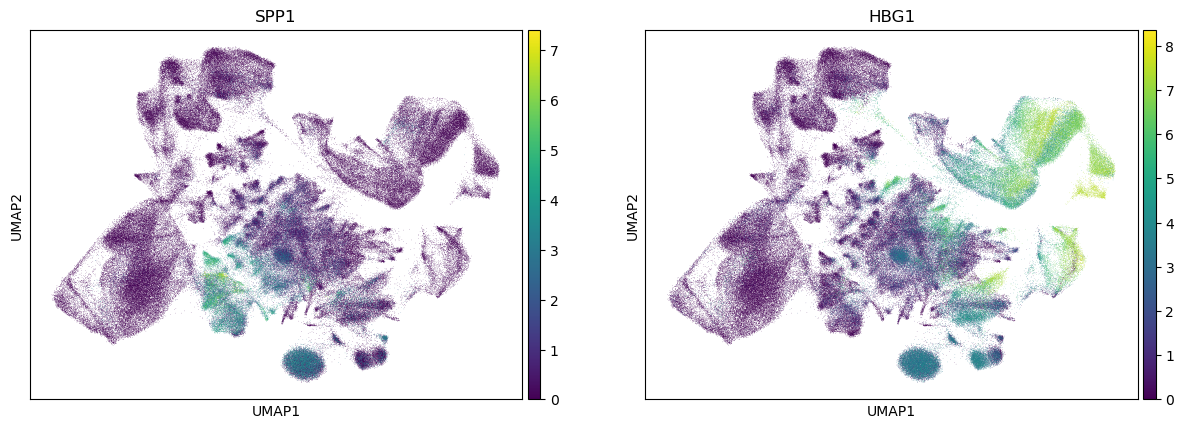

In [119]:
sc.pl.umap(adata_full, color=['SPP1',"HBG1"], groups=[],palette='tab10')

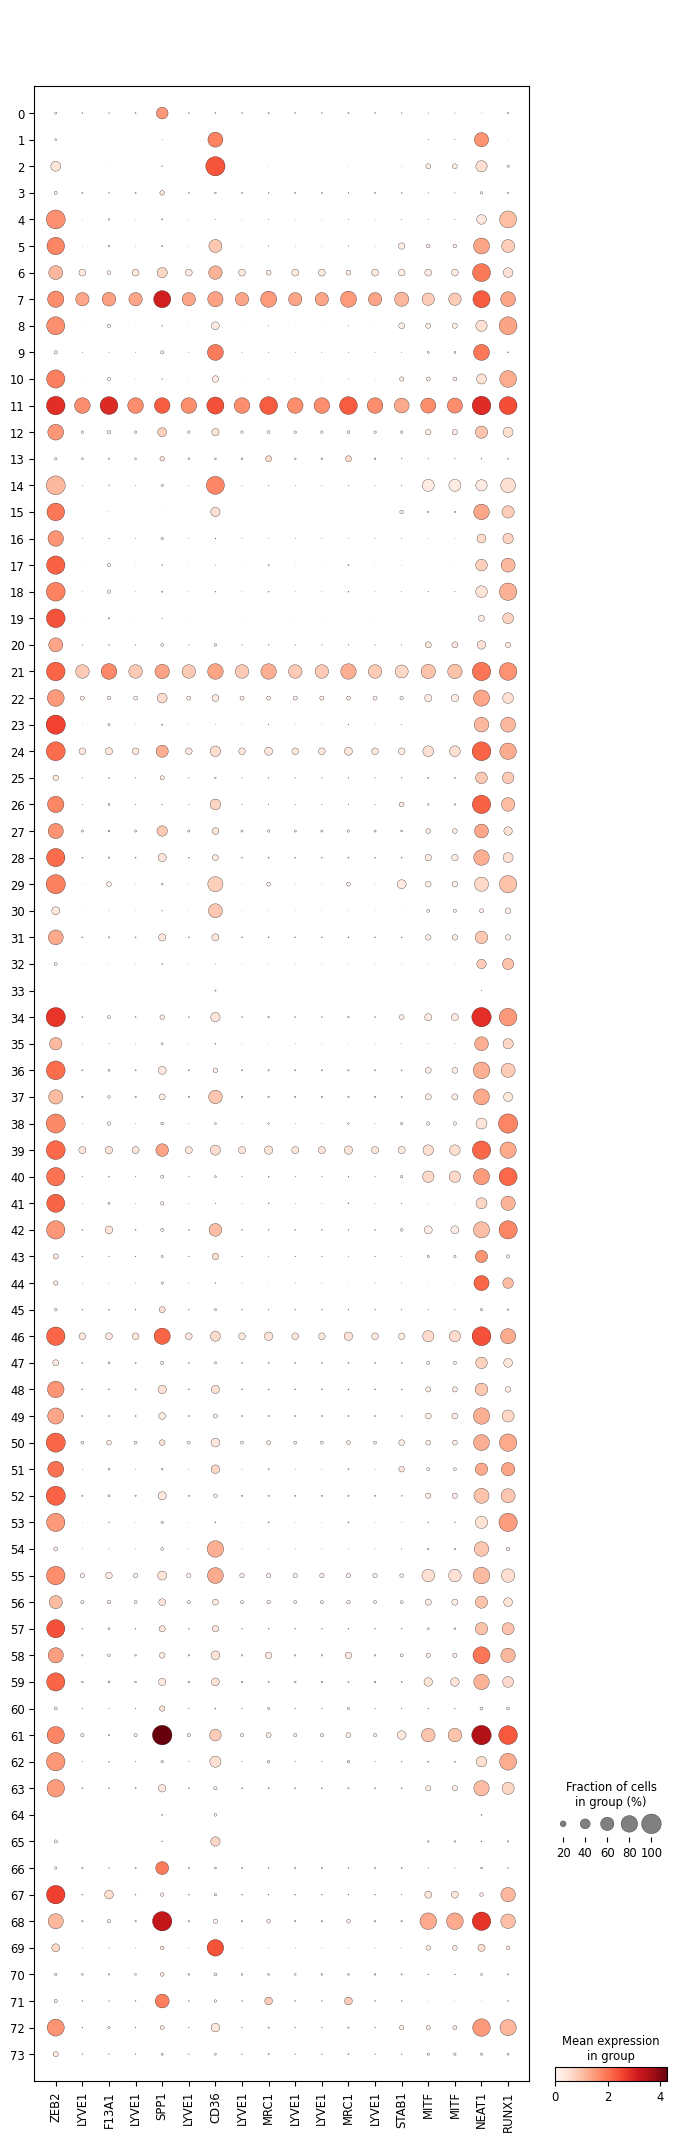

In [182]:
sc.pl.dotplot(adata_full,['ZEB2', 'LYVE1', 'F13A1', 'LYVE1', 'SPP1', 'LYVE1', 'CD36', 'LYVE1', 'MRC1', 'LYVE1', 'LYVE1', 'MRC1', 'LYVE1', 'STAB1', 'MITF', 'MITF', 'NEAT1', 'RUNX1'],["leiden_res_3"])

In [27]:
celltypist_immune= {'MNP': ['HLA-DPA1', 'HLA-DQA1', 'FGL2'], 'Mast': ['TPSAB1', 'TPSB2', 'CPA3']}


In [28]:
fbm1={'DC1': ['CLEC9A', 'CADM1', 'XCR1'],
 'DC2': ['CD1C', 'FCER1A', 'CLEC10A', 'HLA-DPB1'],
 'DC3': ['CD1C', 'CLEC10A', 'S100A8', 'CD36', 'CD163'],
 'early erythroid': ['EPCAM', 'MYC', 'APOC'],
 'early MK': ['ITGA2B', 'GP1BA', 'CMTM5', 'PF4'],
 'early osteoblast': ['IFITM5', 'CPE', 'OMD', 'BGLAP', 'IBSP'],
 'erythroid macrophage': ['CD14', 'APOE', 'F13A1', 'BLVRB'],
 'ELP': ['FLT3', 'IL7R', 'RAG1', 'LTB'],
 'endosteal fibroblast': ['DCN', 'SERPINF1', 'COL3A1', 'BGN'],
 'eo/baso/mast precursor': ['CD34', 'SPINK2', 'CSF2RB', 'HDC']}

In [30]:
def split_dict(input_dict, chunk_size=10):
    items = list(input_dict.items())
    return [dict(items[i:i + chunk_size]) for i in range(0, len(items), chunk_size)]

# Example usage:
split_fbm_cell_types = split_dict(fbm_cell_types, chunk_size=10)

# Display the batches
for idx, sub_dict in enumerate(split_fbm_cell_types):
    print((f"\nBatch {idx+1}:\n{sub_dict}\n"))



Batch 1:
{'adipo-CAR': ['CXCL12', 'LPL', 'APOE', 'GAS6'], 'arteriolar fibroblast': ['DCN', 'SERPINF1', 'COL3A1', 'BGN'], 'basophil': ['IL3RA', 'IL5RA', 'CLC', 'HDC'], 'CD14 monocyte': ['VCAN', 'CD14', 'S100A8', 'CD300E'], 'CD4 T cell': ['CD3D', 'TRAC', 'AQP3', 'CD40LG'], 'CD56 bright NK': ['GZMK', 'XCL1', 'NKG7', 'PRF1'], 'CD8 T cell': ['CD3D', 'TRAC', 'CD8A', 'CD8B'], 'chondrocyte': ['LECT1', 'COL9A3', 'HAPLN1', 'COL11A1'], 'CMP': ['SPINK2', 'CD34', 'CTSG', 'PRTN3'], 'DC precursor': ['CD34', 'IRF8', 'CLEC10A', 'CD1C']}


Batch 2:
{'DC1': ['CLEC9A', 'CADM1', 'XCR1'], 'DC2': ['CD1C', 'FCER1A', 'CLEC10A', 'HLA-DPB1'], 'DC3': ['CD1C', 'CLEC10A', 'S100A8', 'CD36', 'CD163'], 'early erythroid': ['EPCAM', 'MYC', 'APOC'], 'early MK': ['ITGA2B', 'GP1BA', 'CMTM5', 'PF4'], 'early osteoblast': ['IFITM5', 'CPE', 'OMD', 'BGLAP', 'IBSP'], 'erythroid macrophage': ['CD14', 'APOE', 'F13A1', 'BLVRB'], 'ELP': ['FLT3', 'IL7R', 'RAG1', 'LTB'], 'endosteal fibroblast': ['DCN', 'SERPINF1', 'COL3A1', 'BGN'], '

In [31]:
sub_dict

{'stromal macrophage': ['CD14', 'APOE', 'F13A1', 'C1QC', 'SPP1'],
 'tDC': ['AXL', 'SIGLEC6', 'CD22'],
 'tip EC': ['KDR', 'LYVE1', 'ENG', 'DLL4'],
 'Treg': ['CD3D', 'TRAC', 'TIGIT', 'FOXP3']}

In [151]:
fbm_cell_types

{'adipo-CAR': ['CXCL12', 'LPL', 'APOE', 'GAS6'],
 'arteriolar fibroblast': ['DCN', 'SERPINF1', 'COL3A1', 'BGN'],
 'basophil': ['IL3RA', 'IL5RA', 'CLC', 'HDC'],
 'CD14 monocyte': ['VCAN', 'CD14', 'S100A8', 'CD300E'],
 'CD4 T cell': ['CD3D', 'TRAC', 'AQP3', 'CD40LG'],
 'CD56 bright NK': ['GZMK', 'XCL1', 'NKG7', 'PRF1'],
 'CD8 T cell': ['CD3D', 'TRAC', 'CD8A', 'CD8B'],
 'chondrocyte': ['LECT1', 'COL9A3', 'HAPLN1', 'COL11A1'],
 'CMP': ['SPINK2', 'CD34', 'CTSG', 'PRTN3'],
 'DC precursor': ['CD34', 'IRF8', 'CLEC10A', 'CD1C'],
 'DC1': ['CLEC9A', 'CADM1', 'XCR1'],
 'DC2': ['CD1C', 'FCER1A', 'CLEC10A', 'HLA-DPB1'],
 'DC3': ['CD1C', 'CLEC10A', 'S100A8', 'CD36', 'CD163'],
 'early erythroid': ['EPCAM', 'MYC', 'APOC'],
 'early MK': ['ITGA2B', 'GP1BA', 'CMTM5', 'PF4'],
 'early osteoblast': ['IFITM5', 'CPE', 'OMD', 'BGLAP', 'IBSP'],
 'erythroid macrophage': ['CD14', 'APOE', 'F13A1', 'BLVRB'],
 'ELP': ['FLT3', 'IL7R', 'RAG1', 'LTB'],
 'endosteal fibroblast': ['DCN', 'SERPINF1', 'COL3A1', 'BGN'],
 'eo/

In [236]:
import pandas as pd
annotations= pd.read_csv('/nfs/team298/sm54/BoneAtlasProject/src/annotation/cluster_correspondence_hierarchy.csv')
# If clusters are integers, convert CSV clusters to int
annotations['Cluster'] = annotations['Cluster'].astype(str)

# Create a mapping dictionary
cluster_to_celltype = dict(zip(annotations['Cluster'], annotations['Cell_Type']))
#cluster_to_category = dict(zip(annotations['Cluster'], annotations['Category']))

# If adata.obs['clusters'] is int, convert to str for matching
adata_full.obs['leiden_res_3'] = adata_full.obs['leiden_res_3'].astype(str)

# Add cell type and category annotations
adata_full.obs['Manual_Annotation_Level2'] = adata_full.obs['leiden_res_3'].map(cluster_to_celltype)
#adata_full.obs['Manual_Annotation_Level1'] = adata_full.obs['leiden_res_3'].map(cluster_to_category)


In [237]:
adata_full.obs['leiden_res_3'].value_counts()

leiden_res_3
0     12310
1      9454
2      9195
3      8033
4      7752
      ...  
69      748
70      711
71      483
72      302
73      170
Name: count, Length: 74, dtype: int64

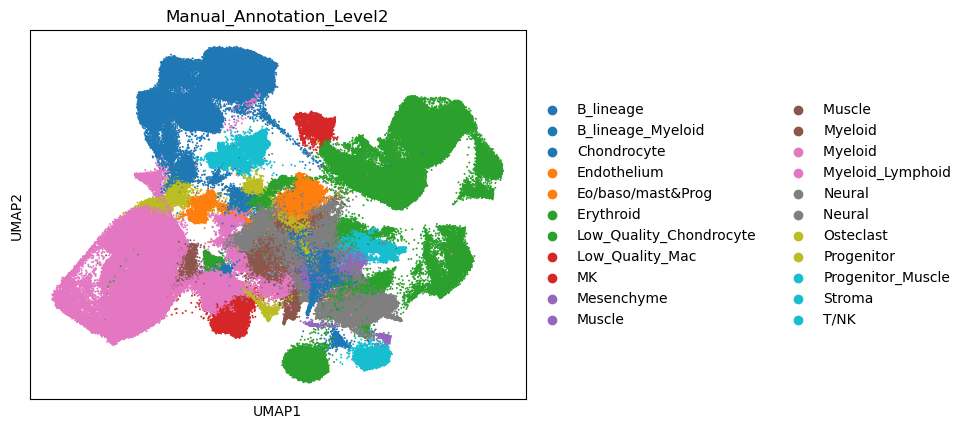

In [36]:
sc.pl.umap(adata_full, color=['Manual_Annotation_Level2'], groups=[],palette='tab10', size=8)

In [77]:
adata_full.write_h5ad('/lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/tmp_version.h5ad')

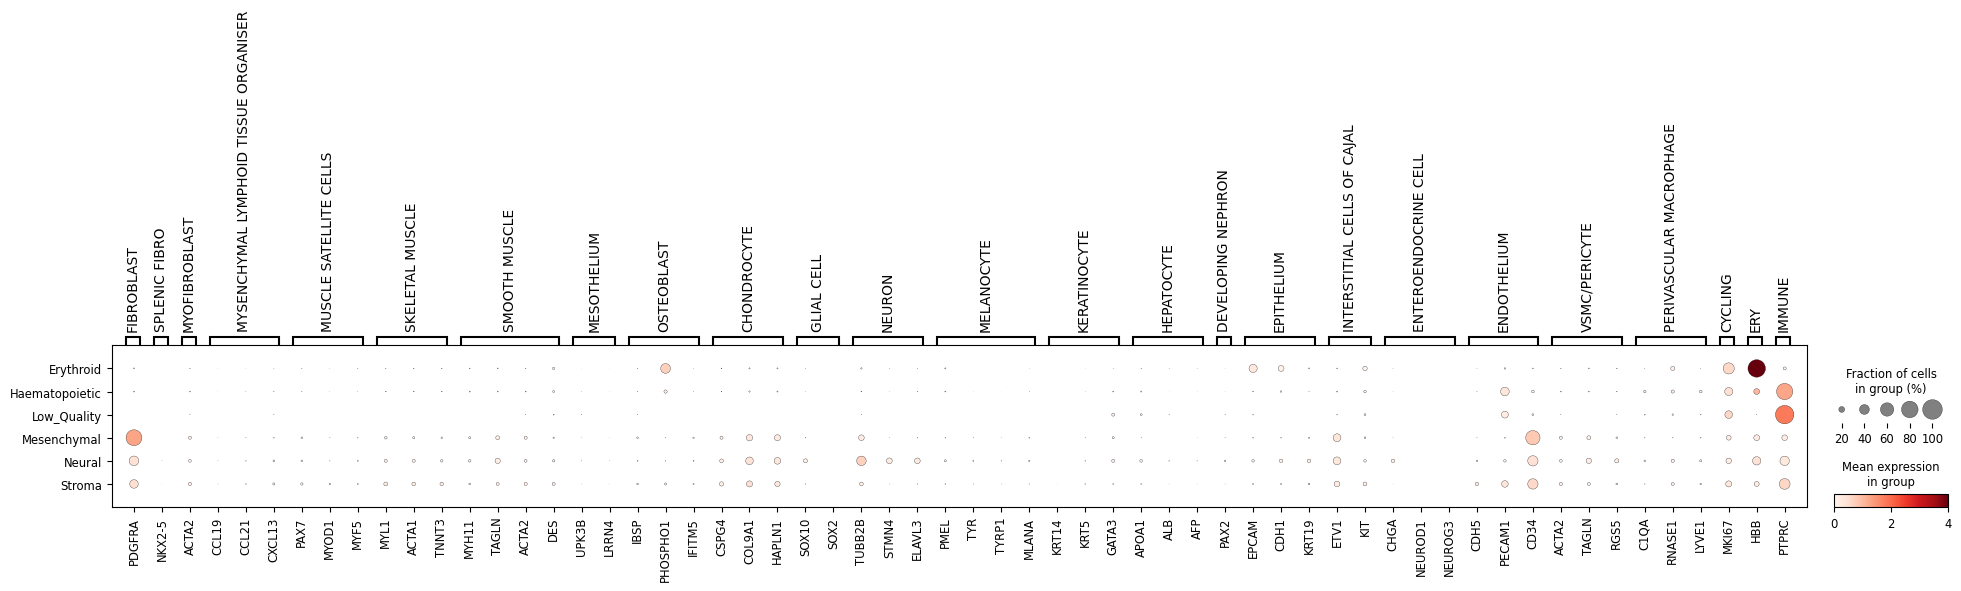

In [37]:
sc.pl.dotplot(adata_full,stroma_markers_panfetal, groupby=["published_anno_level1"])

In [225]:
adata_full.obs['published_anno_level1'].value_counts()

published_anno_level1
Haematopoietic    97589
Erythroid         14422
Stroma            12258
Mesenchymal         990
Neural              484
Low_Quality         179
Name: count, dtype: int64

In [1]:
import scanpy as sc 
adata_full= sc.read_h5ad('/lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/tmp_version.h5ad')

In [2]:
panfetal= sc.read_h5ad('/nfs/team298/sm54/developmental_data_old_versions/A1_V8_scvi_YS_updated_panf_gonads_brain_build_donor_organ_corrected_120922.h5ad')

In [22]:
panfetal[panfetal.obs['broad_cell.labels'].isin(['Macrophage','Microglia'])].obs['organ'].value_counts()

organ
YS    35580
Name: count, dtype: int64

In [11]:
YS=panfetal[panfetal.obs['organ']=="YS"]

In [27]:
YS_macs=YS[YS.obs['broad_cell.labels'].isin(['Macrophage','Microglia','Kupffer_cell','Monocyte','Granulocyte_precursor',])]

In [30]:
YS_macs.write_h5ad('/nfs/team298/sm54/BoneAtlasProject/data/macs_ys.h5ad')

In [33]:
panfetal.obs["LVL1"].value_counts()

LVL1
STROMA        808529
MYELOID       258604
LYMPHOID      232813
ERYTHROID     166181
PROGENITOR     33983
MK             17138
Name: count, dtype: int64

In [26]:
panfetal.obs['broad_cell_labels_organ'].value_counts()

broad_cell_labels_organ
nan                           1336314
Erythroid_ys                    53154
Macrophage_ys                   33902
Fibroblast_ys                   18819
Kupffer_cell_fliv               11501
Erythroid_fliv                  10814
Hepatocyte_fliv                  8228
Endothelium_ys                   5420
Progenitor_fliv                  4885
Smooth_Muscle_ys                 4680
Endoderm_ys                      4391
Progenitors_ys                   4070
Endothelium_fliv                 3256
Fibroblast_fliv                  3213
MK_ys                            2127
DC_fliv                          1993
Microglia_ys                     1678
Lymphoid_fliv                    1636
MK_fliv                          1537
Mesothelium_ys                   1368
B_lymphoid_fliv                   788
Monocyte_fliv                     749
Monocyte_ys                       589
Granulocyte_precursor_fliv        585
DC_ys                             545
Granulocyte_precursors_ys 

In [229]:
#panfetal=panfetal[panfetal.obs['organ']!="BM"]
panfetal.obs['organ'].value_counts()

organ
BR     495190
LI     210549
SK     178563
YS     169494
SP     127186
TH     104251
GU      79435
KI      26372
GO      14244
AGM     12248
MLN      6039
Name: count, dtype: int64

In [228]:
import scanpy as sc
import os

#panfetal=panfetal[panfetal.obs['Organ']!="BM"]
# Add concatenated column
panfetal.obs['LVL1_Organ'] = panfetal.obs['LVL1'].astype(str) + "_" + panfetal.obs['organ'].astype(str)

# Output path
output_dir = "/nfs/team298/sm54/BoneAtlasProject/data/"

# Ensure directory exists
os.makedirs(output_dir, exist_ok=True)

# Iterate through unique LVL1 types and save
for lvl1_category in panfetal.obs['LVL1'].unique():
    subset = panfetal[panfetal.obs['LVL1'] == lvl1_category].copy()
    
    filename = f"{lvl1_category}_panfetal.h5ad"
    save_path = os.path.join(output_dir, filename)
    
    print(f"Saving {lvl1_category} with {subset.n_obs} cells to {save_path}")
    subset.write(save_path)


/tmp/ipykernel_3506271/4293832973.py:6: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  panfetal.obs['LVL1_Organ'] = panfetal.obs['LVL1'].astype(str) + "_" + panfetal.obs['organ'].astype(str)


Saving MYELOID with 225843 cells to /nfs/team298/sm54/BoneAtlasProject/data/MYELOID_panfetal.h5ad
Saving ERYTHROID with 147816 cells to /nfs/team298/sm54/BoneAtlasProject/data/ERYTHROID_panfetal.h5ad
Saving LYMPHOID with 204675 cells to /nfs/team298/sm54/BoneAtlasProject/data/LYMPHOID_panfetal.h5ad
Saving PROGENITOR with 24770 cells to /nfs/team298/sm54/BoneAtlasProject/data/PROGENITOR_panfetal.h5ad
Saving STROMA with 805563 cells to /nfs/team298/sm54/BoneAtlasProject/data/STROMA_panfetal.h5ad
Saving MK with 14904 cells to /nfs/team298/sm54/BoneAtlasProject/data/MK_panfetal.h5ad


In [41]:
panfetal.obs["organ"]

FCAImmP7579224-ATTACTCTCGATGAGG     SK
FCAImmP7579224-CAGCCGAGTACATCCA     SK
FCAImmP7579224-TGCTACCTCATGTAGC     SK
FCAImmP7579224-ACGGCCACAAGCTGAG     SK
FCAImmP7579224-CTAATGGCACTGTGTA     SK
                                  ... 
TTTGTCACAATCTACG-3                 AGM
TTTGTCACATCCAACA-3                 AGM
TTTGTCAGTCTAGCCG-3                 AGM
TTTGTCAGTTATTCTC-3                 AGM
TTTGTCAGTTCCCTTG-3                 AGM
Name: organ, Length: 1517248, dtype: category
Categories (12, object): ['AGM', 'BM', 'BR', 'GO', ..., 'SK', 'SP', 'TH', 'YS']

In [40]:
import pandas as pd
df= pd.read_csv('/lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/propagated_labels_query_cells.csv')

In [41]:
sum(df['propagated_anno'].value_counts())

133954

In [42]:
sum(adata_full.obs['published_anno'].isna())

133954

In [43]:
133954 + 125922

259876

In [44]:
adata_full

AnnData object with n_obs × n_vars = 259876 × 36601
    obs: 'barcode_raw', 'Sanger_ID', 'Cell_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'log1p_total_counts_rb', 'pct_counts_rb', 'total_counts_outlier', 'gene_counts_outlier', 'mt_outlier', 'Organ', '10X_Chemistry', 'Accession_ID', 'Age', 'Age(PCW)', 'Dataset', 'Donor_ID', 'FACS_Sorting', 'Anatomical_Site', 'Method', 'Multiplexed', 'Expected_Donors', 'Organism', 'Run_ID', 'Study', 'Technology', 'predicted_labels_unfiltered', 'over_clustering_unfiltered', 'majority_voting_unfiltered', 'predicted_labels_Level1_unfiltered', 'predicted_labels_Level2_unfiltered', 'majority_voting_Level1_unfiltered', 'majority_voting_Level2_unfiltered', 'mt_high_outlier', 'QC', 'scrublet_score_unfiltered', 'pred

In [45]:
df

Cell_ID propagated_anno
0       CGCAATGTCAGCAAGA-HCA_BN_F12482363       Erythroid
1       TAATCACCAATTGACT-HCA_BN_F12482363       Erythroid
2       CAAGTAACATGACTAT-HCA_BN_F12482363      Epithelial
3       AAAGCCGCATGTTGCA-HCA_BN_F12482363  late erythroid
4       ACTGAATGTCATGAGC-HCA_BN_F12482363       Erythroid
...                                   ...             ...
133949   ATGTGTGAGATGCCAG-5478STDY7850149  low_confidence
133950   CATCAGAGTGCCTGGT-5478STDY7850149           Macro
133951   CCGGTAGCAGTTCATG-5478STDY7850149  low_confidence
133952   CGACTTCGTTATTCTC-5478STDY7850149       PAX7+ Myo
133953   AGGCCACAGGGATGGG-5478STDY7850149  low_confidence

[133954 rows x 2 columns]

In [46]:
# Reindex df on Cell_ID
df_indexed = df.set_index('Cell_ID')

# Ensure the target column is string, not categorical
adata_full.obs['published_propagated_anno'] = adata_full.obs['published_anno'].astype(str)

# Build the mask
mask_na = adata_full.obs['published_anno'].isna()

# Map propagated_anno only to NA entries
adata_full.obs.loc[mask_na, 'published_propagated_anno'] = (
    adata_full.obs.loc[mask_na].index.map(df_indexed['propagated_anno'].get)
)


In [47]:
adata_full.obs['published_propagated_anno'].value_counts()

published_propagated_anno
low_confidence             37718
mid erythroid              19685
pre B progenitor           16876
Immune                     16688
CD14 monocyte              12149
                           ...  
EARLY_OB                       1
V0_NEURON                      1
NOCICEPTOR                     1
MACROPHAGE_KUPFFER_LIKE        1
MACROPHAGE_TREM2               1
Name: count, Length: 297, dtype: int64

In [48]:
# 2. Load the 338-row levels mapping you already prepared
levels_df = pd.read_csv('/nfs/team298/sm54/BoneAtlasProject/metadata/old_annotations/published_anno_bone_atlas_levels_123.csv')  # contains columns Level1, Level2, Level3

# 3. Rename Level3 to published_anno so it matches your combined DF
levels_df = levels_df.rename(columns={'Level3': 'published_propagated_anno'})
# Ensure the mapping dataframe is indexed by 'published_propagated_anno'
levels_df = levels_df.set_index('published_propagated_anno')

# Map Level1 with fallback to 'low_quality'
adata_full.obs['published_propagated_anno_level1'] = (
    adata_full.obs['published_propagated_anno']
    .map(levels_df['Level1'])
    .fillna('low_quality')
)

# Map Level2 with fallback to 'low_quality'
adata_full.obs['published_propagated_anno_level2'] = (
    adata_full.obs['published_propagated_anno']
    .map(levels_df['Level2'])
    .fillna('low_quality')
)

In [49]:
adata_full[adata_full.obs['published_propagated_anno_level2'].isna()].obs['published_propagated_anno']

Series([], Name: published_propagated_anno, dtype: object)

In [50]:
222158- 259876

-37718

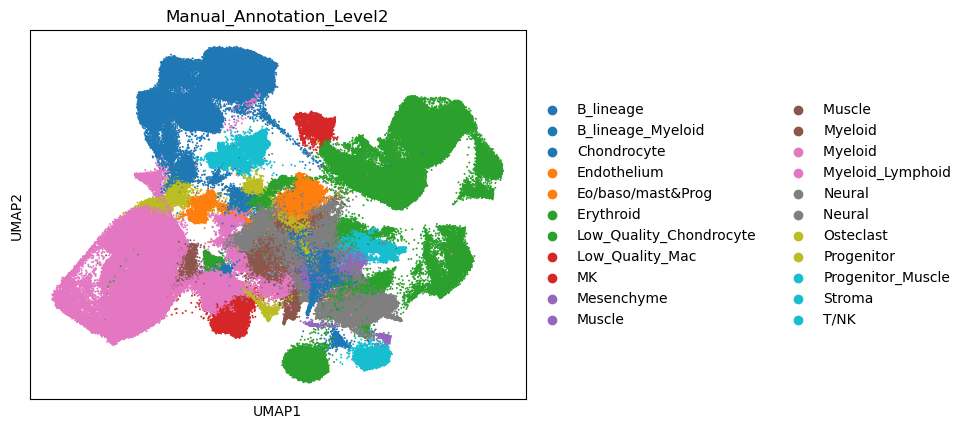

In [51]:
sc.pl.umap(adata_full, color=['Manual_Annotation_Level2'], groups=[],palette='tab10', size=8)

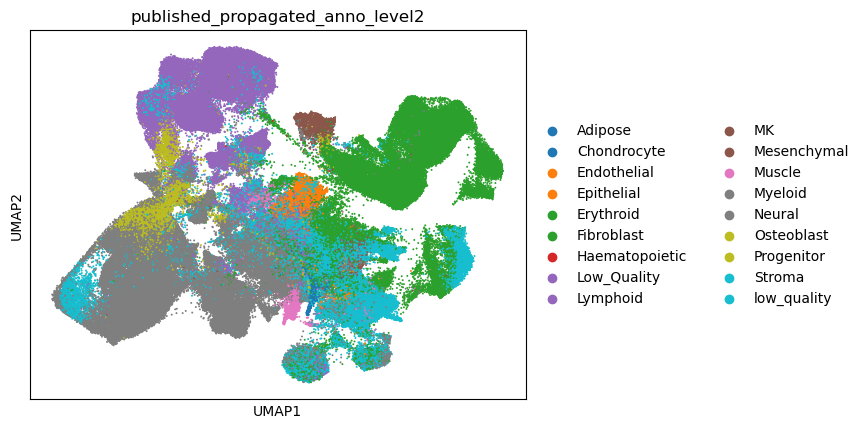

In [52]:
sc.pl.umap(adata_full, color=['published_propagated_anno_level2'], groups=[],palette='tab10', size=8)

In [53]:
pd.crosstab(adata_full.obs['published_propagated_anno_level2'],adata_full.obs['Manual_Annotation_Level2'])

Manual_Annotation_Level2          B_lineage  B_lineage_Myeloid  Chondrocyte  \
published_propagated_anno_level2                                              
Adipose                                   2                  0            0   
Chondrocyte                              12                  0          799   
Endothelial                               4                  1            3   
Epithelial                                1                  2            4   
Erythroid                               485                 35          850   
Fibroblast                              269                  0           54   
Haematopoietic                            4                  0            0   
Low_Quality                             190                 46            0   
Lymphoid                              22430              14040            3   
MK                                       28                 13            0   
Mesenchymal                               4                  0           29   
Muscle                                   37                156           23   
Myeloid                                 461               1100          113   
Neural                                    5                  0            5   
Osteoblast                                0                  1            4   
Progenitor                             1298                182            1   
Stroma                                  213                390          425   
low_quality                            1689                798         1370   

Manual_Annotation_Level2          Endothelium  Eo/baso/mast&Prog  Erythroid   \
published_propagated_anno_level2                                               
Adipose                                     0                  0           0   
Chondrocyte                                 1                  0         136   
Endothelial                              5524                  1           8   
Epithelial                                  7                  0          31   
Erythroid                                 136                 89       45312   
Fibroblast                                  1                  5          83   
Haematopoietic                              0                  0           6   
Low_Quality                                 1                  2           0   
Lymphoid                                  442                 73         122   
MK                                          3                  6         180   
Mesenchymal                                 1                  0          82   
Muscle                                     50                  3        1041   
Myeloid                                   770               1934        1721   
Neural                                      0                  1          40   
Osteoblast                                  0                  0           8   
Progenitor                                 25                111         168   
Stroma                                    155                 11        2528   
low_quality                               438                347        2048   

Manual_Annotation_Level2          Low_Quality_Chondrocyte  Low_Quality_Mac   \
published_propagated_anno_level2                                              
Adipose                                                 0                 0   
Chondrocyte                                             1                 0   
Endothelial                                             1                 0   
Epithelial                                              1                 0   
Erythroid                                            2512                 7   
Fibroblast                                              0                 0   
Haematopoietic                                          0                 0   
Low_Quality                                             0                 0   
Lymphoid                    

In [54]:
dotplot_markers={'Immune': ['PTPRC'],
 'B Lineage': ['CD79A', 'CD19', 'MS4A1', 'PAX5', 'IGHM', 'IGHD'],
                 'Eo/baso/mast&Prog': ['TPSAB1', 'KIT', 'PRG2'],
 'Erythrocyte': ['GYPA', 'GYPB', 'SLC4A1', 'HBA2', 'HBB'],
 'Erythrocyte_YS': ['HBZ', 'HBE1'],
 'MK': ['ITGA2B', 'ITGB3', 'PF4', 'CLK1'],
 
 'Monocyte_lineage': ["MRC1","LYVE1",'CD14', 'C1QA',
  'S100A8',
  'CD52',
  'CD68',
  'HLA-DRA',
  'S100A8'], 
                 "Osteoclast": ["CTSK","ACP5",'MMP9','SIGLEC15',"CD68","ANPEP"],
                'HSC/MPP': ['CD34', 'MLLT3','SPINK2', 'PRSS57'],
                'T/NK': ['IL7R', 'CD3D', 'CD3E', 'TRBC1', 'GZMA', 'TRAC'],}

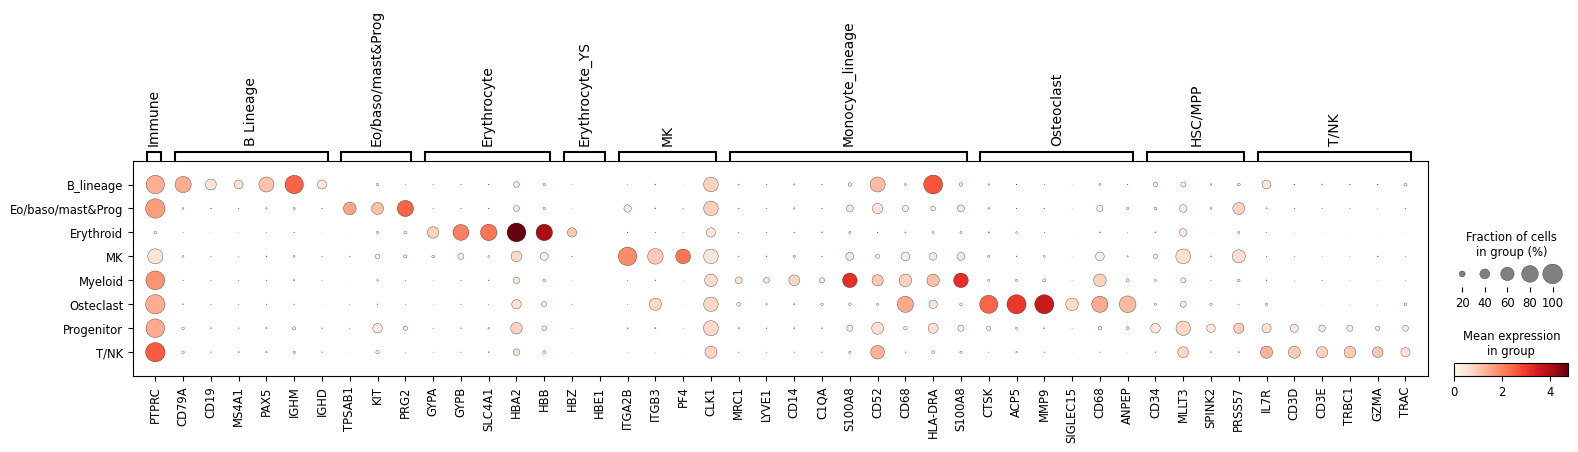

In [61]:
sc.pl.dotplot(subset, dotplot_markers,groupby='Manual_Annotation_Level2',save= "Haem_dotplot.png")

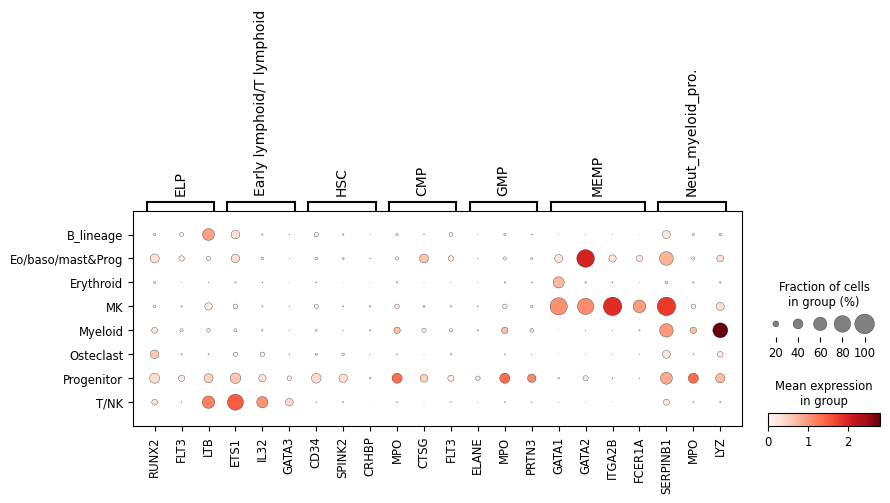

In [60]:
sc.pl.dotplot(subset, celltypist_progenitors,groupby='Manual_Annotation_Level2', )

In [130]:
adata_full.obs['Manual_Annotation_Level2'].value_counts()

Manual_Annotation_Level2
Myeloid                    58411
Erythroid                  53514
B_lineage                  27132
Neural                     24239
B_lineage_Myeloid          16764
Low_Quality_Chondrocyte    12310
Endothelium                 7554
T/NK                        7123
Progenitor                  6079
Low_Quality_Mac             6064
Stroma                      6016
Mesenchyme                  5898
Myeloid                     5571
Progenitor_Muscle           4537
Neural                      4279
Chondrocyte                 3683
Muscle                      2898
Eo/baso/mast&Prog           2583
MK                          2529
Myeloid_Lymphoid            1197
Osteclast                    842
Muscle                       653
Name: count, dtype: int64

In [55]:
# Define clean list of excluded Level2 categories
exclude_level2 = [
    'Neural', 'Low_Quality_Chondrocyte', 'Endothelium', 'Mesenchyme', 'Progenitor_Muscle',
    'Chondrocyte', 'Muscle', 'Stroma','Neural ','Muscle '
]

# Clean up spaces in Manual_Annotation_Level2
adata_full.obs['Manual_Annotation_Level2'] = adata_full.obs['Manual_Annotation_Level2'].str.strip()

# Subset condition
subset = adata_full[
    (~adata_full.obs['Manual_Annotation_Level2'].isin(exclude_level2))
]


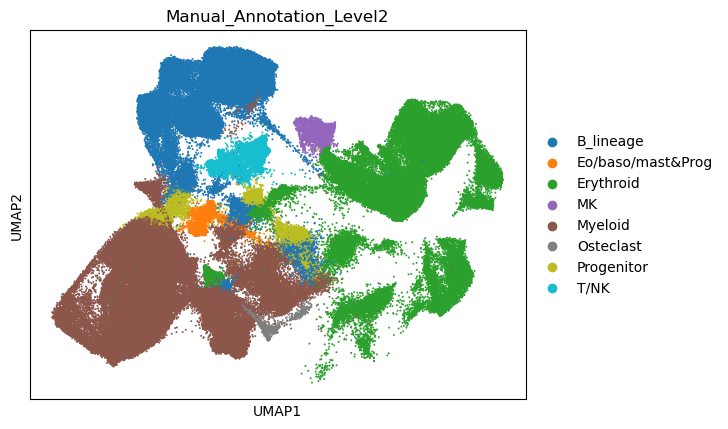

In [59]:
sc.pl.umap(subset, color=['Manual_Annotation_Level2'], groups=[],palette='tab10', size=8, save="Haem_V1.png")

In [57]:
rename_map = {
    'B_lineage_Myeloid': 'B_lineage',
    'Myeloid_Lymphoid': 'Myeloid',
    'Low_Quality_Mac': 'Myeloid'
    # Add more mappings as needed
}

# Apply the renaming
subset.obs['Manual_Annotation_Level2'] = subset.obs['Manual_Annotation_Level2'].replace(rename_map)


/tmp/ipykernel_1723319/2379555792.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  subset.obs['Manual_Annotation_Level2'] = subset.obs['Manual_Annotation_Level2'].replace(rename_map)


In [58]:
sc.pl.dotplot(S, myeloid_markers_panfetal,groupby='published_propagated_anno_level2')

ValueError: groupby has to be a valid observation. Given published_propagated_anno_level2, is not in observations: ['barcode_raw', 'Sanger_ID', 'Cell_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'log1p_total_counts_rb', 'pct_counts_rb', 'total_counts_outlier', 'gene_counts_outlier', 'mt_outlier', 'Organ', '10X_Chemistry', 'Accession_ID', 'Age', 'Age(PCW)', 'Dataset', 'Donor_ID', 'FACS_Sorting', 'Anatomical_Site', 'Method', 'Multiplexed', 'Expected_Donors', 'Organism', 'Run_ID', 'Study', 'Technology', 'predicted_labels_unfiltered', 'over_clustering_unfiltered', 'majority_voting_unfiltered', 'predicted_labels_Level1_unfiltered', 'predicted_labels_Level2_unfiltered', 'majority_voting_Level1_unfiltered', 'majority_voting_Level2_unfiltered', 'mt_high_outlier', 'QC', 'scrublet_score_unfiltered', 'predicted_doublets_unfiltered', 'scrublet_cluster_score_unfiltered', 'bh_pval_unfiltered', 'predicted_doublets_pval_unfiltered', 'Donor_Final', 'Age_Final', 'dmx_status', 'dmx_assignment', 'dmx_brc_code', 'dmx_pcw_published', 'dmx_age_final', 'dmx_donor_final', 'Donor_clean', 'n_counts', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', 'scrublet_score_filtered', 'predicted_doublets_filtered', 'scrublet_cluster_score_filtered', 'bh_pval_filtered', 'predicted_doublets_pval_filtered', 'predicted_labels', 'over_clustering', 'majority_voting', 'predicted_labels_Level1', 'predicted_labels_Level2', 'majority_voting_Level1', 'majority_voting_Level2', 'published_anno', 'published_anno_2', 'published_anno_level1', 'published_anno_level2', 'PTPRRC_positive', 'prog_score', 'lymph_score', 'myelo_score', 'high_prog_score', 'high_lymph_score', 'high_myelo_score', 'published_haem', 'majvote_haem', 'predicted_haem', 'leiden_res_3', 'Manual_Annotation_Level2', 'Manual_Annotation_Level1'] or index name "Cell_ID"

In [204]:
subset.write_h5ad('/lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/tmp_version_subset.h5ad')

In [216]:
subset.obs["Manual_Annotation_Level2"].value_counts()

Manual_Annotation_Level2
Myeloid              71243
Erythroid            53514
B_lineage            43896
T/NK                  7123
Progenitor            6079
Eo/baso/mast&Prog     2583
MK                    2529
Osteclast              842
Name: count, dtype: int64

In [207]:
adata_full

AnnData object with n_obs × n_vars = 259876 × 36601
    obs: 'barcode_raw', 'Sanger_ID', 'Cell_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'log1p_total_counts_rb', 'pct_counts_rb', 'total_counts_outlier', 'gene_counts_outlier', 'mt_outlier', 'Organ', '10X_Chemistry', 'Accession_ID', 'Age', 'Age(PCW)', 'Dataset', 'Donor_ID', 'FACS_Sorting', 'Anatomical_Site', 'Method', 'Multiplexed', 'Expected_Donors', 'Organism', 'Run_ID', 'Study', 'Technology', 'predicted_labels_unfiltered', 'over_clustering_unfiltered', 'majority_voting_unfiltered', 'predicted_labels_Level1_unfiltered', 'predicted_labels_Level2_unfiltered', 'majority_voting_Level1_unfiltered', 'majority_voting_Level2_unfiltered', 'mt_high_outlier', 'QC', 'scrublet_score_unfiltered', 'pred

In [208]:
import os

# Directory to save subsets
output_dir = '/lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/'
os.makedirs(output_dir, exist_ok=True)

# Mapping of annotations to group names
group_mapping = {
    'Osteoclast': 'Myeloid_haem',
    'Myeloid': 'Myeloid_haem',
    'Erythroid': 'Erythroid_haem',
    'MK': 'Erythroid_haem',
    'B_lineage': 'B_lineage',
    'T/NK': 'T_lineage',
    'Progenitor': 'Progenitors'
}

# Iterate over unique group names and subset
for group_name in set(group_mapping.values()):
    # Get original annotations corresponding to this group
    annotations_in_group = [k for k, v in group_mapping.items() if v == group_name]
    
    subset = subset[subset.obs['Manual_Annotation_Level2'].isin(annotations_in_group)].copy()
    
    save_path = os.path.join(output_dir, f'{group_name}.h5ad')
    subset.write(save_path)
    
    print(f"Saved {group_name} with {subset.n_obs} cells to {save_path}")


Saved B_lineage with 43896 cells to /lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/B_lineage.h5ad
Saved T_lineage with 0 cells to /lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/T_lineage.h5ad
Saved Progenitors with 0 cells to /lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/Progenitors.h5ad
Saved Myeloid_haem with 0 cells to /lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/Myeloid_haem.h5ad
Saved Erythroid_haem with 0 cells to /lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/Erythroid_haem.h5ad


In [218]:
myeloid= subset[subset.obs['Manual_Annotation_Level2'].isin(['Myeloid','Osteoclast'])].copy()

In [220]:
myeloid.write_h5ad('/lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/Myeloid_haem.h5ad')


In [ ]:
 subset.write(save_path)

In [222]:
panfetal.obs['uniform_label']

FCAImmP7579224-ATTACTCTCGATGAGG    nan
FCAImmP7579224-CAGCCGAGTACATCCA    nan
FCAImmP7579224-TGCTACCTCATGTAGC    nan
FCAImmP7579224-ACGGCCACAAGCTGAG    nan
FCAImmP7579224-CTAATGGCACTGTGTA    nan
                                  ... 
TTTGTCACAATCTACG-3                 nan
TTTGTCACATCCAACA-3                 nan
TTTGTCAGTCTAGCCG-3                 nan
TTTGTCAGTTATTCTC-3                 nan
TTTGTCAGTTCCCTTG-3                 nan
Name: uniform_label, Length: 1517248, dtype: category
Categories (89, object): ['ADIPOCYTE', 'B CELL', 'BASAL KC', 'BASOPHIL', ..., 'STROMA PROGENITOR', 'TREG', 'UNKNOWN', 'nan']

FCAImmP7579224-ATTACTCTCGATGAGG      MYELOID
FCAImmP7579224-CAGCCGAGTACATCCA    ERYTHROID
FCAImmP7579224-TGCTACCTCATGTAGC      MYELOID
FCAImmP7579224-ACGGCCACAAGCTGAG      MYELOID
FCAImmP7579224-CTAATGGCACTGTGTA     LYMPHOID
                                     ...    
TTTGTCACAATCTACG-3                    STROMA
TTTGTCACATCCAACA-3                    STROMA
TTTGTCAGTCTAGCCG-3                    STROMA
TTTGTCAGTTATTCTC-3                    STROMA
TTTGTCAGTTCCCTTG-3                    STROMA
Name: LVL1, Length: 1517248, dtype: category
Categories (6, object): ['ERYTHROID', 'LYMPHOID', 'MK', 'MYELOID', 'PROGENITOR', 'STROMA']

In [243]:
subset= subset[subset.obs['Manual_Annotation_Level2'].isin(['Progenitor'])].copy()

In [244]:
subset

AnnData object with n_obs × n_vars = 6079 × 36601
    obs: 'barcode_raw', 'Sanger_ID', 'Cell_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'log1p_total_counts_rb', 'pct_counts_rb', 'total_counts_outlier', 'gene_counts_outlier', 'mt_outlier', 'Organ', '10X_Chemistry', 'Accession_ID', 'Age', 'Age(PCW)', 'Dataset', 'Donor_ID', 'FACS_Sorting', 'Anatomical_Site', 'Method', 'Multiplexed', 'Expected_Donors', 'Organism', 'Run_ID', 'Study', 'Technology', 'predicted_labels_unfiltered', 'over_clustering_unfiltered', 'majority_voting_unfiltered', 'predicted_labels_Level1_unfiltered', 'predicted_labels_Level2_unfiltered', 'majority_voting_Level1_unfiltered', 'majority_voting_Level2_unfiltered', 'mt_high_outlier', 'QC', 'scrublet_score_unfiltered', 'predic

In [245]:
subset.write_h5ad('/lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/progenitor.h5ad')


In [ ]:
subset= sc.read_h5ad('/lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/B_lineage.h5ad')


subset.obs['Age_numeric'] = subset.obs['Age_Final'].astype(float).round().astype(int)
subset.obs['Age_numeric']=subset.obs['Age_numeric'].astype(str)

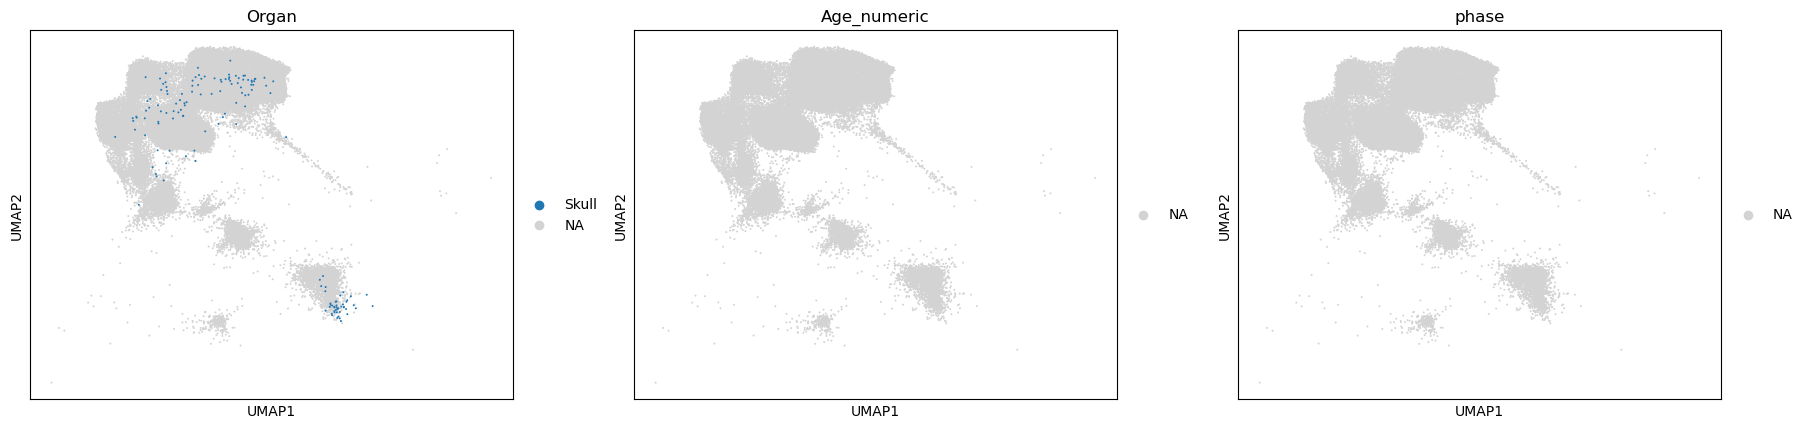

In [76]:
sc.pl.umap(subset, color=['Organ','Age_numeric','phase'], groups=["Skull"],palette='tab10', size=8)

In [56]:
subset[subset.obs['Organ']=="Spine"].obs["Age_numeric"].value_counts()

Age_numeric
17    10721
12      414
10       92
9        74
13       19
5         4
7         2
Name: count, dtype: int64

In [61]:
skull=subset[subset.obs['Organ']=="Skull"]
spine=subset[subset.obs['Organ']=="Spine"]
femur=subset[subset.obs['Organ']=="Long Bone"]

/nfs/users/nfs_s/sm54/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


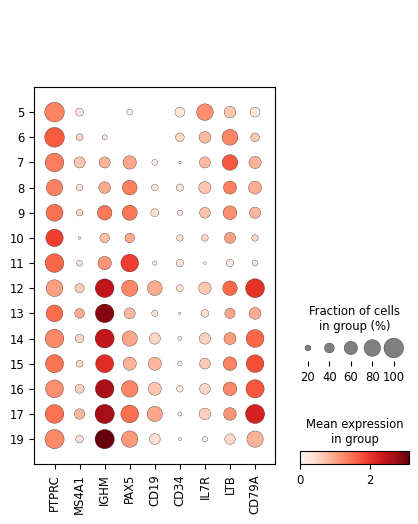

In [62]:
sc.pl.dotplot(femur,["PTPRC","MS4A1","IGHM","PAX5","CD19","CD34","IL7R","LTB","CD79A"], groupby='Age_numeric')

In [ ]:
sc.pl.dotplot(femur,b, groupby='Age_numeric')

In [63]:
femur.obs['Age_numeric'].value_counts()

Age_numeric
19    7971
17    6453
15    6177
16    4674
14    3784
12    2372
13     850
9       40
8       38
7       15
11      15
10      13
6       12
5       10
Name: count, dtype: int64

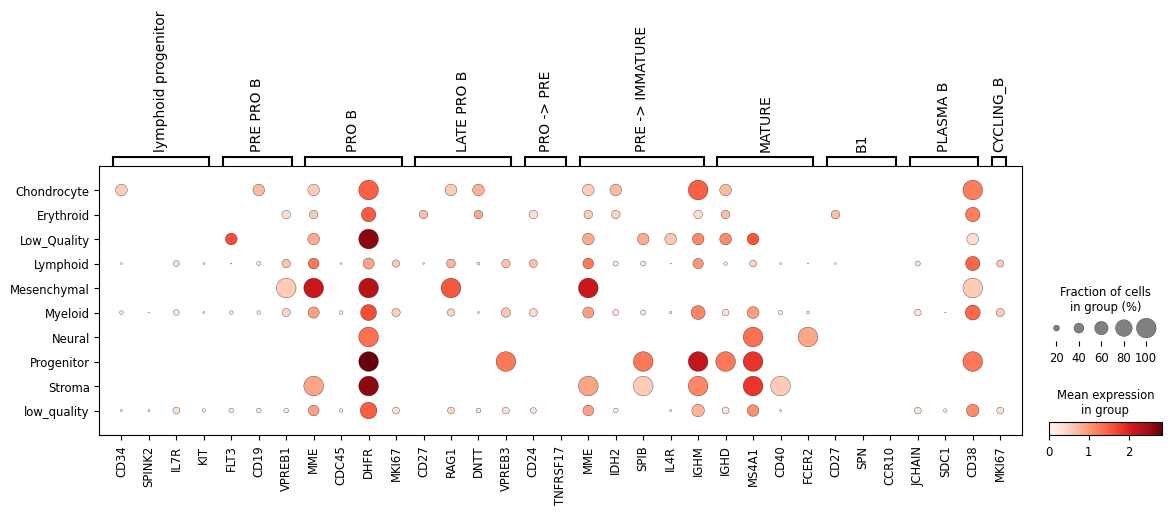

In [39]:
sc.pl.dotplot(skull,b_markers_panfetal, groupby='published_propagated_anno_level2')

In [66]:
fbm_celltypes={'ERY/MK': ['PTPRC', 'EPCAM', 'GYPA', 'GYPB', 'ITGB3'],
 'EC': ['CDH5', 'KDR', 'ANPEP'],
 'Gran/mast/DC': ['MSR1',
  'KIT',
  'IL3RA',
  'IL5RA',
  'HLA-DRA',
  'HAVCR2',
  'CLEC9A'],
 'Monocytes': ['CD1C', 'CLEC4C', 'CD14', 'CD52', 'CD34', 'CD96'],
 'Neurtrophil': ['ITGB2', 'SELL', 'ITGAM'],
 'B lineage': ['CEACAM8', 'CD99', 'CD79A', 'MME', 'MS4A1', 'TNFRSF13C'],
 'CD4T/CD56 NK': ['CD3E', 'KLRB1']}

In [75]:
femur.obs['majority_voting_unfiltered'].value_counts()[0:40]

majority_voting_unfiltered
Large pre-B                              7963
Small pre-B                              7015
Late pro-B                               4537
Pro-B                                    4399
λ small pre-B                            3376
Pre-pro-B cells                          1182
CD5- mature B                             689
Macrophage                                571
Immature B                                517
Promonocyte                               472
Late pre-B                                424
Monocytes                                 245
B1 cells                                  137
LYVE1+ macrophage                          88
Photoreceptor                              81
NK                                         75
Skull erythroid cells                      72
HSC/MPP                                    50
Definitive erythrocytes                    50
pDC                                        47
CMP                                        39
NKT    

In [125]:
S= prog[prog.obs['majority_voting_Level2'].isin(["MK","Erythroid","Progenitor"])]
S[S.obs["Organ"]=="Skull"].obs['Age_numeric'].value_counts()

Age_numeric
12    1
Name: count, dtype: int64

In [2]:
prog= sc.read_h5ad('/lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/progenitor.h5ad')


prog.obs['Age_numeric'] = prog.obs['Age_Final'].astype(float).round().astype(int)
prog.obs['Age_numeric']=prog.obs['Age_numeric'].astype(str)

In [3]:
prog_skull=prog[prog.obs['Organ']=="Skull"]
prog_spine=prog[prog.obs['Organ']=="Spine"]
prog_femur=prog[prog.obs['Organ']=="Long Bone"]

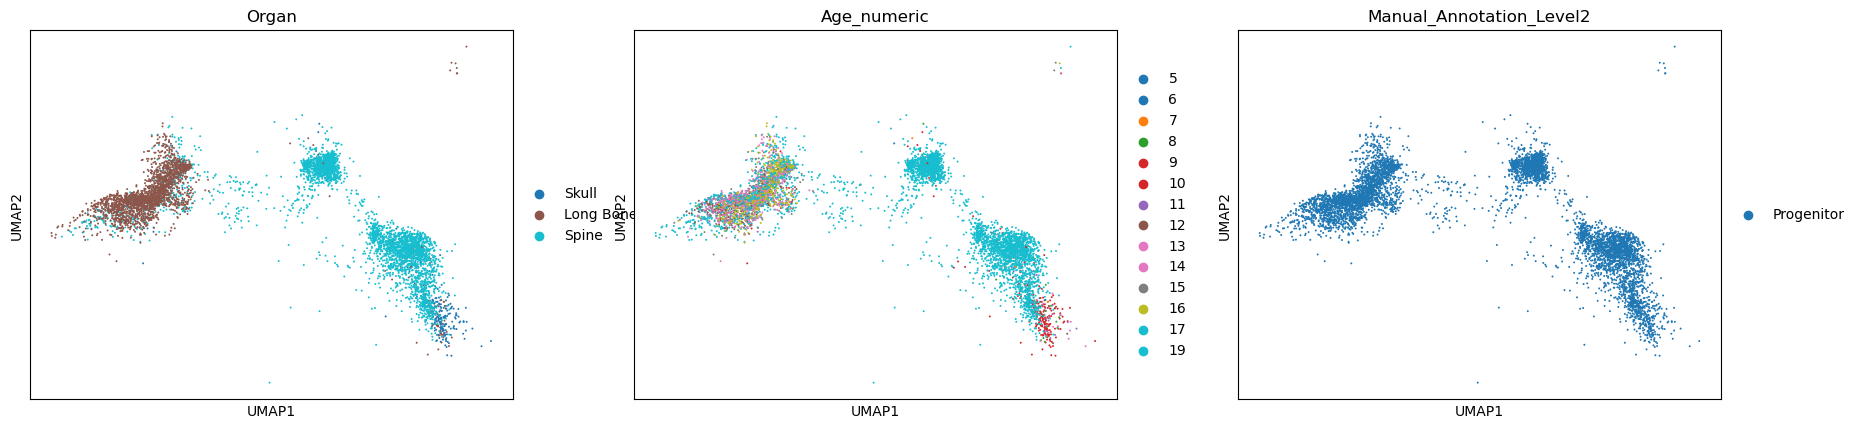

In [99]:
sc.pl.umap(prog, color=['Organ','Age_numeric','Manual_Annotation_Level2'], groups=[],palette='tab10', size=8)

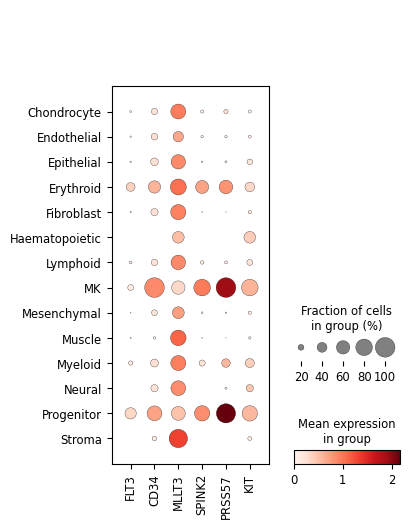

In [121]:
sc.pl.dotplot(prog,['FLT3', 'CD34', 'MLLT3', 'SPINK2',"PRSS57","KIT"], groupby='majority_voting_Level2')

In [4]:
femur_old= sc.read_h5ad('/nfs/team298/sm54/skull_data_sharing/bonemarrow.h5ad')

In [92]:
femur_old_hsc= femur_old[femur_old.obs['uniform_label_lvl0']=='HSC_MPP']

In [105]:
prog.obs['majority_voting_Level2'].value_counts()

majority_voting_Level2
Progenitor        2179
Lymphoid          1250
Muscle             782
Myeloid            749
Fibroblast         436
Mesenchymal        349
Erythroid          129
Endothelial         63
Epithelial          59
Stroma              34
Chondrocyte         23
Neural              19
MK                   5
Haematopoietic       2
Name: count, dtype: int64

In [110]:
split_fbm_cell_types[1]

{'DC1': ['CLEC9A', 'CADM1', 'XCR1'],
 'DC2': ['CD1C', 'FCER1A', 'CLEC10A', 'HLA-DPB1'],
 'DC3': ['CD1C', 'CLEC10A', 'S100A8', 'CD36', 'CD163'],
 'early erythroid': ['EPCAM', 'MYC', 'APOC'],
 'early MK': ['ITGA2B', 'GP1BA', 'CMTM5', 'PF4'],
 'early osteoblast': ['IFITM5', 'CPE', 'OMD', 'BGLAP', 'IBSP'],
 'erythroid macrophage': ['CD14', 'APOE', 'F13A1', 'BLVRB'],
 'ELP': ['FLT3', 'IL7R', 'RAG1', 'LTB'],
 'endosteal fibroblast': ['DCN', 'SERPINF1', 'COL3A1', 'BGN'],
 'eo/baso/mast precursor': ['CD34', 'SPINK2', 'CSF2RB', 'HDC']}

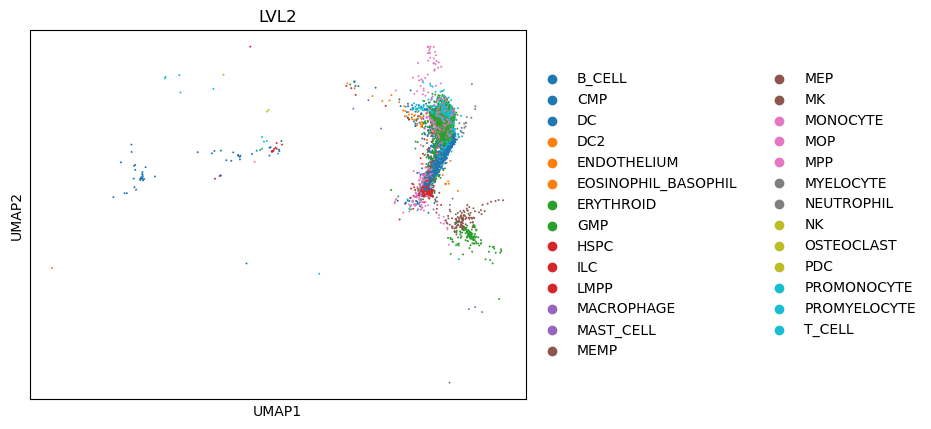

In [96]:
sc.pl.umap(femur_old_hsc, color=['LVL2'], groups=[],palette='tab10', size=8)

In [1]:
import pandas as pd 

In [2]:
df= pd.read_csv( "/lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/propagated_labels_query_cells.csv")

In [3]:
df

Cell_ID propagated_anno
0       CGCAATGTCAGCAAGA-HCA_BN_F12482363       Erythroid
1       TAATCACCAATTGACT-HCA_BN_F12482363       Erythroid
2       CAAGTAACATGACTAT-HCA_BN_F12482363      Epithelial
3       AAAGCCGCATGTTGCA-HCA_BN_F12482363  late erythroid
4       ACTGAATGTCATGAGC-HCA_BN_F12482363       Erythroid
...                                   ...             ...
133949   ATGTGTGAGATGCCAG-5478STDY7850149  low_confidence
133950   CATCAGAGTGCCTGGT-5478STDY7850149           Macro
133951   CCGGTAGCAGTTCATG-5478STDY7850149  low_confidence
133952   CGACTTCGTTATTCTC-5478STDY7850149       PAX7+ Myo
133953   AGGCCACAGGGATGGG-5478STDY7850149  low_confidence

[133954 rows x 2 columns]

In [1]:
import scanpy as sc 

In [2]:
adata= sc.read_h5ad('/lustre/scratch124/cellgen/haniffa/users/sm54/data/Cross_Organ/bone_atlas_scvi_runs/processed_adata/adata_nlatent30_nlayers4_nhidden128_nhvg3000.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 1564008 × 3000
    obs: 'barcode_raw', 'Sanger_ID', 'Cell_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'log1p_total_counts_rb', 'pct_counts_rb', 'total_counts_outlier', 'gene_counts_outlier', 'mt_outlier', 'Organ', '10X_Chemistry', 'Accession_ID', 'Age', 'Age(PCW)', 'Dataset', 'Donor_ID', 'FACS_Sorting', 'Anatomical_Site', 'Method', 'Multiplexed', 'Expected_Donors', 'Organism', 'Run_ID', 'Study', 'Technology', 'Age_pf', 'Anatomical_region_pf', 'BCR_library_id', 'Comment[library construction]', 'Comment[technical replicate group]', 'Donor_pf', 'End_Bias', 'Factor Value[facs sorting]', 'File_pf', 'Method_pf', 'N_cells', 'N_cells_pf', 'Organ_Orig', 'Organ_pf', 'Processing_method', 'Processing_method_pf', 'Sa

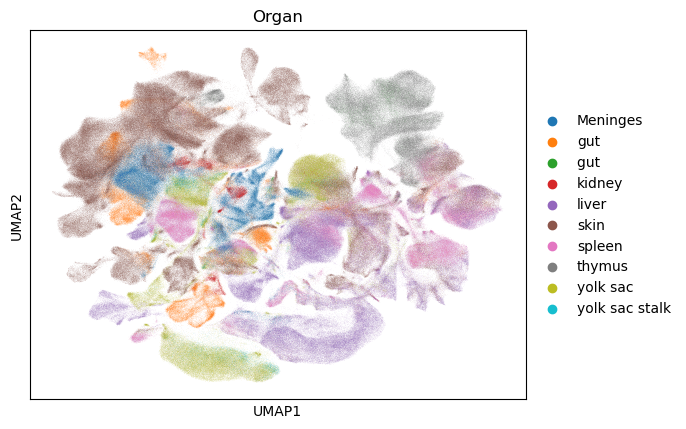

In [5]:
sc.pl.umap(adata, color="Organ")

In [7]:
adata.obs['Organ'].value_counts()

Organ
skin              516498
liver             273073
spleen            162187
yolk sac          157300
thymus            147308
Meninges          129196
gut               118357
kidney             34509
yolk sac stalk     16414
gut                 9166
Name: count, dtype: int64

In [16]:
keep = []
for organ in adata.obs["Organ"].unique():
    idx = np.where(adata.obs['Organ'] == organ)[0]
    if len(idx) > 1000:
        idx = np.random.choice(idx, 1000, replace=False)
    keep.extend(idx)
adata = adata[keep].copy()

In [17]:
adata

AnnData object with n_obs × n_vars = 10000 × 3000
    obs: 'barcode_raw', 'Sanger_ID', 'Cell_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'log1p_total_counts_rb', 'pct_counts_rb', 'total_counts_outlier', 'gene_counts_outlier', 'mt_outlier', 'Organ', '10X_Chemistry', 'Accession_ID', 'Age', 'Age(PCW)', 'Dataset', 'Donor_ID', 'FACS_Sorting', 'Anatomical_Site', 'Method', 'Multiplexed', 'Expected_Donors', 'Organism', 'Run_ID', 'Study', 'Technology', 'Age_pf', 'Anatomical_region_pf', 'BCR_library_id', 'Comment[library construction]', 'Comment[technical replicate group]', 'Donor_pf', 'End_Bias', 'Factor Value[facs sorting]', 'File_pf', 'Method_pf', 'N_cells', 'N_cells_pf', 'Organ_Orig', 'Organ_pf', 'Processing_method', 'Processing_method_pf', 'Samp

In [18]:
sc.pp.normalize_total(adata, target_sum=1e4, layer='raw_counts')
sc.pp.log1p(adata, layer='raw_counts')

In [20]:
import os
import argparse

import scanpy as sc
import numpy as np
import pandas as pd
from scipy import sparse
from sklearn.feature_selection import SelectKBest, f_classif

X = sparse.csr_matrix(adata.layers['raw_counts'])
y = adata.obs["Organ"].values
genes = np.array(adata.var_names)

In [22]:
from sklearn.linear_model import LogisticRegression

# 5) Fit L1-penalized multinomial logistic regression
clf = LogisticRegression(
        penalty='l1',
        solver='saga',
        multi_class='multinomial',
        C=0.1,
        tol=1e-4,
        max_iter=2000,
        n_jobs=-1,
        random_state=42)
print("Fitting LogisticRegression…")
clf.fit(X, y)

Fitting LogisticRegression…


/software/cellgen/team298/sm54/envs/boneatlas/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=0.1, max_iter=2000, multi_class='multinomial', n_jobs=-1,
                   penalty='l1', random_state=42, solver='saga')

In [23]:
clf

LogisticRegression(C=0.1, max_iter=2000, multi_class='multinomial', n_jobs=-1,
                   penalty='l1', random_state=42, solver='saga')

In [26]:
out_base = os.path.join('/lustre/scratch124/cellgen/haniffa/users/sm54/data/Cross_Organ/', "logistic_l1")
for i, organ in enumerate(clf.classes_):
    coeffs = clf.coef_[i]
    idx = np.argsort(np.abs(coeffs))[::-1][:100]
    top = genes[idx]

    od = os.path.join(out_base, organ.replace(" ", "_"))
    os.makedirs(od, exist_ok=True)
        
    pd.Series(top, name='gene')\
          .to_csv(os.path.join(od, f"top_{100}_genes_{organ}.csv"),
                  index=False)
    print(f"[Logistic L1] {organ}: saved {len(top)} genes → {od}")

[Logistic L1] Meninges: saved 100 genes → /lustre/scratch124/cellgen/haniffa/users/sm54/data/Cross_Organ/logistic_l1/Meninges
[Logistic L1] gut: saved 100 genes → /lustre/scratch124/cellgen/haniffa/users/sm54/data/Cross_Organ/logistic_l1/gut
[Logistic L1] gut : saved 100 genes → /lustre/scratch124/cellgen/haniffa/users/sm54/data/Cross_Organ/logistic_l1/gut_
[Logistic L1] kidney: saved 100 genes → /lustre/scratch124/cellgen/haniffa/users/sm54/data/Cross_Organ/logistic_l1/kidney
[Logistic L1] liver: saved 100 genes → /lustre/scratch124/cellgen/haniffa/users/sm54/data/Cross_Organ/logistic_l1/liver
[Logistic L1] skin: saved 100 genes → /lustre/scratch124/cellgen/haniffa/users/sm54/data/Cross_Organ/logistic_l1/skin
[Logistic L1] spleen: saved 100 genes → /lustre/scratch124/cellgen/haniffa/users/sm54/data/Cross_Organ/logistic_l1/spleen
[Logistic L1] thymus: saved 100 genes → /lustre/scratch124/cellgen/haniffa/users/sm54/data/Cross_Organ/logistic_l1/thymus
[Logistic L1] yolk sac: saved 100 ge

In [27]:
top

array(['LINGO1', 'MT-ND3', 'MTURN', 'HBB', 'CEBPD', 'RASGEF1B', 'MALAT1',
       'LYL1', 'RBM38', 'PITX2', 'MTRNR2L12', 'APOA2', 'ALAS2', 'FRZB',
       'RNF220', 'APOC3', 'HBZ', 'SMOC2', 'ANKRD9', 'ACY3', 'PTGDS',
       'FLT1', 'HSP90AA1', 'HSPA1B', 'APOM', 'NR4A1', 'SPP1', 'CDH1',
       'MTRNR2L8', 'CDKN1A', 'MT1F', 'MGP', 'CCN2', 'CSMD1', 'MAGI2',
       'HSPA6', 'CD74', 'UBAC1', 'LMCD1', 'MRC1', 'CCL4L2', 'SLIT2',
       'CXCL14', 'ARHGAP15', 'SYNPO2', 'NR4A3', 'DNAJB1', 'MT-ND6', 'TNR',
       'GADD45A', 'DENND4A', 'HES4', 'CCL4', 'HMGB2', 'SAMD5', 'FAT3',
       'DCAF12', 'SERPINA6', 'HLA-DRB1', 'C1QB', 'ARL15', 'HPSE2',
       'SLC5A12', 'SPARCL1', 'MAN1A1', 'SERPINE1', 'OSBP2', 'F13A1',
       'MYLPF', 'TAL1', 'ADAP2', 'ANK2', 'EGFL7', 'PRKAR2B', 'ZNF331',
       'DUSP1', 'CXCL2', 'H19', 'HBA2', 'FTL', 'GMPR', 'NEAT1', 'ABHD5',
       'MXD1', 'GUCY1A1', 'MPP1', 'EDIL3', 'HSPA1A', 'MCTP1', 'SNHG10',
       'PIP5K1B', 'C5AR1', 'CRYAB', 'HLA-B', 'ITIH2', 'FOS', 'ALB',
       'AB

In [28]:
import os
import glob
import pandas as pd

# 1. Point this at your logistic_l1 base directory
base_dir = "/lustre/scratch124/cellgen/haniffa/users/sm54/data/Cross_Organ/logistic_l1"

# 2. Find all the per-organ CSVs
pattern = os.path.join(base_dir, "*", "top_100_genes_*.csv")
files = glob.glob(pattern)

# 3. Read and annotate
df_list = []
for fp in files:
    organ = os.path.basename(os.path.dirname(fp))
    tmp = pd.read_csv(fp, names=["gene"], header=0)
    tmp["organ"] = organ
    df_list.append(tmp)

# 4. Concatenate into one DataFrame
combined = pd.concat(df_list, ignore_index=True)

# Now `combined` has one row per gene-organ pair
print(combined.head())
print(f"Total rows: {len(combined)}")


     gene  organ
0     ALB  liver
1   APOA2  liver
2    FCN3  liver
3  LINGO1  liver
4  CLEC1B  liver
Total rows: 1000


In [31]:
combined[combined['organ']=='Meninges']

gene     organ
900         TTR  Meninges
901  AC105402.3  Meninges
902        HBG2  Meninges
903        RMST  Meninges
904       PTGDS  Meninges
..          ...       ...
995       PITX1  Meninges
996      TUBB2B  Meninges
997  AL391422.2  Meninges
998       CPEB4  Meninges
999        LCP2  Meninges

[100 rows x 2 columns]

In [32]:
#!/usr/bin/env python3
import os
import argparse

import scanpy as sc
import numpy as np
import pandas as pd
from scipy import sparse
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

def preprocess(adata, layer='raw_counts'):
    """Normalize & log1p on `layer`, return sparse X, gene names, and obs index."""
    if layer not in adata.layers:
        adata.layers[layer] = adata.X.copy()
    sc.pp.normalize_total(adata, target_sum=1e4, layer=layer)
    sc.pp.log1p(adata, layer=layer)
    X = sparse.csr_matrix(adata.layers[layer])
    genes = np.array(adata.var_names)
    return X, genes

def split_adata(adata, label_col, test_frac, val_frac, random_state=42):
    """Stratified split into train/val/test AnnDatas."""
    labels = adata.obs[label_col].astype(str).str.strip().values
    idx = np.arange(len(labels))
    # first split off test
    idx_trainval, idx_test = train_test_split(
        idx, test_size=test_frac, stratify=labels, random_state=random_state)
    labels_trainval = labels[idx_trainval]
    # then split train vs val
    val_fraction_of_trainval = val_frac / (1 - test_frac)
    idx_train, idx_val = train_test_split(
        idx_trainval,
        test_size=val_fraction_of_trainval,
        stratify=labels_trainval,
        random_state=random_state)
    return adata[idx_train].copy(), adata[idx_val].copy(), adata[idx_test].copy()

def fit_and_evaluate(X_train, y_train, X_eval, y_eval, split_name, output_dir):
    """Fit on X_train, predict on X_eval, save classification report."""
    clf = LogisticRegression(
        penalty='l1',
        solver='saga',
        multi_class='multinomial',
        C=0.1,
        tol=1e-4,
        max_iter=2000,
        n_jobs=-1,
        random_state=42
    )
    print(f"[{split_name}] Fitting LogisticRegression on train…")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_eval)
    report = classification_report(y_eval, y_pred, output_dict=True)
    rpt_df = pd.DataFrame(report).T
    rpt_path = os.path.join(output_dir, f"classification_report_{split_name}.csv")
    rpt_df.to_csv(rpt_path)
    print(f"[{split_name}] Saved classification report → {rpt_path}")
    return clf

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 1. Assume X (cells×genes) and y (organ labels) are already prepared:

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Instantiate the classifier
clf = LogisticRegression(
    penalty='l1',
    solver='saga',
    multi_class='multinomial',
    C=0.1,
    tol=1e-4,
    max_iter=2000,
    n_jobs=-1,
    random_state=42
)

# 4. Fit on the training data
clf.fit(X_train, y_train)

# 5. Predict “hard” labels on the test set
y_pred = clf.predict(X_test)

# 6. Predict class probabilities
y_proba = clf.predict_proba(X_test)

# 7. Evaluate
print(classification_report(y_test, y_pred))


/software/cellgen/team298/sm54/envs/boneatlas/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


                precision    recall  f1-score   support

      Meninges       0.99      0.99      0.99       200
           gut       0.94      0.91      0.93       200
          gut        0.97      0.95      0.96       200
        kidney       0.88      0.86      0.87       200
         liver       0.83      0.90      0.87       200
          skin       0.89      0.85      0.87       200
        spleen       0.77      0.83      0.80       200
        thymus       0.94      0.90      0.92       200
      yolk sac       0.93      0.90      0.91       200
yolk sac stalk       0.91      0.95      0.93       200

      accuracy                           0.90      2000
     macro avg       0.91      0.90      0.90      2000
  weighted avg       0.91      0.90      0.90      2000



In [34]:
y

['gut', 'gut', 'gut', 'gut', 'gut', ..., 'Meninges', 'Meninges', 'Meninges', 'Meninges', 'Meninges']
Length: 10000
Categories (10, object): ['Meninges', 'gut', 'gut ', 'kidney', ..., 'spleen', 'thymus', 'yolk sac', 'yolk sac stalk']

In [35]:
def extract_gene_modules(clf, genes, n_genes, output_dir):
    """From trained clf, pick top n_genes per organ and save CSVs."""
    gene_sets = {}
    gm_dir = os.path.join(output_dir, "gene_modules")
    os.makedirs(gm_dir, exist_ok=True)
    for i, organ in enumerate(clf.classes_):
        coeffs = clf.coef_[i]
        idx = np.argsort(np.abs(coeffs))[::-1][:n_genes]
        top = genes[idx]
        gene_sets[organ] = list(top)
        od = os.path.join(gm_dir, organ.replace(" ", "_"))
        os.makedirs(od, exist_ok=True)
        pd.Series(top, name="gene")\
          .to_csv(os.path.join(od, f"top_{n_genes}_genes_{organ}.csv"),
                  index=False)
        print(f"[Modules] {organ}: saved {n_genes} genes → {od}")
    return gene_sets

In [54]:
import scanpy as sc
import pandas as pd

# 1) Load your query AnnData
prog= sc.read_h5ad('/lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/B_lineage.h5ad')# ensure you have a raw_counts layer (or whichever layer you want to score)
# if 'raw_counts' not in adata.layers:
#     adata.layers['raw_counts'] = adata.X.copy()

# # 2) Load your gene-sets DataFrame
#    Expected format: columns ["organ", "gene"], one row per gene
#combined = pd.read_csv("combined_logistic_l1_genes.csv")  

# pivot into a dict of lists
gene_sets = {organ: grp["gene"].tolist()
             for organ, grp in combined.groupby("organ")}

# 3) Compute a module score per organ
for organ, genes in gene_sets.items():
    score_key = f"score_{organ.replace(' ', '_')}"
    sc.tl.score_genes(
        prog,
        gene_list=genes,
        score_name=score_key,
        use_raw=False,
    )

# 4) Aggregate scores by true organ label
#    Assume your true-organ labels are in adata.obs["Organ"]
#    and have already been .str.strip() cleaned.
score_cols = [c for c in prog.obs.columns if c.startswith("score_")]

# compute mean score per true-organ
mean_scores = (
    prog.obs
         .groupby("Organ")[score_cols]
         .mean()
         .reset_index()
)
print(mean_scores)

# 5) For each true-organ, find which module scores highest
def best_module(row):
    # drop the 'Organ' column, find col with max value
    scores = row[score_cols]
    best = scores.idxmax().replace("score_", "").replace("_", " ")
    return best

mean_scores["best_matching_module"] = mean_scores.apply(best_module, axis=1)
print(mean_scores[["Organ", "best_matching_module"]])


       Organ  score_Meninges  score_gut  score_gut_  score_kidney  \
0      Skull        0.355460   0.157831    0.344957      0.205992   
1  Long Bone        0.331955   0.125765    0.400882      0.169528   
2      Spine        0.467564   0.240439    0.525789      0.301046   

   score_liver  score_skin  score_spleen  score_thymus  score_yolk_sac  \
0     0.199025    0.117137      0.122459      0.196146        0.148335   
1     0.211754    0.124794      0.110210      0.141585        0.116775   
2     0.230058    0.202795      0.160606      0.244374        0.232456   

   score_yolk_sac_stalk  
0              0.177776  
1              0.281000  
2              0.396521  
       Organ best_matching_module
0      Skull             Meninges
1  Long Bone                 gut 
2      Spine                 gut 


/tmp/ipykernel_3317312/2598463680.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prog.obs


In [55]:
mean_scores

Organ  score_Meninges  score_gut  score_gut_  score_kidney  \
0      Skull        0.355460   0.157831    0.344957      0.205992   
1  Long Bone        0.331955   0.125765    0.400882      0.169528   
2      Spine        0.467564   0.240439    0.525789      0.301046   

   score_liver  score_skin  score_spleen  score_thymus  score_yolk_sac  \
0     0.199025    0.117137      0.122459      0.196146        0.148335   
1     0.211754    0.124794      0.110210      0.141585        0.116775   
2     0.230058    0.202795      0.160606      0.244374        0.232456   

   score_yolk_sac_stalk best_matching_module  
0              0.177776             Meninges  
1              0.281000                 gut   
2              0.396521                 gut

In [56]:
# For a single column:
combined['organ'] = combined['organ'].astype(str).str.strip()

# — or, to strip _every_ object-dtype column:
for col in combined.select_dtypes(include='object'):
    combined[col] = combined[col].str.strip()


In [122]:
import os
import glob
import pandas as pd

# 1. Point this at your logistic_l1 base directory
base_dir = "/lustre/scratch124/cellgen/haniffa/users/sm54/data/Cross_Organ/organ_origin_predictions_lr/logistic_l1/"

# 2. Find all the per-organ CSVs
pattern = os.path.join(base_dir, "*", "top_100_genes_*.csv")
files = glob.glob(pattern)

# 3. Read and annotate
df_list = []
for fp in files:
    organ = os.path.basename(os.path.dirname(fp))
    tmp = pd.read_csv(fp, names=["gene"], header=0)
    tmp["organ"] = organ
    df_list.append(tmp)

# 4. Concatenate into one DataFrame
combined = pd.concat(df_list, ignore_index=True)

# Now `combined` has one row per gene-organ pair
print(combined.head())
print(f"Total rows: {len(combined)}")


      gene  organ
0      ALB  liver
1    APOA2  liver
2     FCN3  liver
3  COLEC11  liver
4    GATA4  liver
Total rows: 900


In [123]:
import scanpy as sc
import pandas as pd

# 1) Load your query AnnData
prog= sc.read_h5ad('/lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/B_lineage.h5ad')# ensure you have a raw_counts layer (or whichever layer you want to score)
# if 'raw_counts' not in adata.layers:
#     adata.layers['raw_counts'] = adata.X.copy()

# # 2) Load your gene-sets DataFrame
#    Expected format: columns ["organ", "gene"], one row per gene
#combined = pd.read_csv("combined_logistic_l1_genes.csv")  

# pivot into a dict of lists
gene_sets = {organ: grp["gene"].tolist()
             for organ, grp in combined.groupby("organ")}

# 3) Compute a module score per organ
for organ, genes in gene_sets.items():
    score_key = f"score_{organ.replace(' ', '_')}"
    sc.tl.score_genes(
        prog,
        gene_list=genes,
        score_name=score_key,
        use_raw=False,
    )

# 4) Aggregate scores by true organ label
#    Assume your true-organ labels are in adata.obs["Organ"]
#    and have already been .str.strip() cleaned.
score_cols = [c for c in prog.obs.columns if c.startswith("score_")]

# compute mean score per true-organ
mean_scores = (
    prog.obs
         .groupby("Organ")[score_cols]
         .mean()
         .reset_index()
)
print(mean_scores)

# 5) For each true-organ, find which module scores highest
def best_module(row):
    # drop the 'Organ' column, find col with max value
    scores = row[score_cols]
    best = scores.idxmax().replace("score_", "").replace("_", " ")
    return best

mean_scores["best_matching_module"] = mean_scores.apply(best_module, axis=1)
(mean_scores[["Organ", "best_matching_module"]])


       Organ  score_Meninges  score_gut  score_kidney  score_liver  \
0      Skull        0.202158   0.008403      0.007680     0.034780   
1  Long Bone        0.146544  -0.025799     -0.017226     0.027123   
2      Spine        0.292850   0.042262      0.045262     0.058677   

   score_skin  score_spleen  score_thymus  score_yolk_sac  \
0    0.030206      0.034240      0.067900        0.051306   
1    0.031638      0.019048      0.069059        0.053998   
2    0.063031      0.055783      0.102105        0.114689   

   score_yolk_sac_stalk  
0              0.094940  
1              0.128354  
2              0.201610  


/tmp/ipykernel_3317312/2434106635.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prog.obs


Organ best_matching_module
0      Skull             Meninges
1  Long Bone             Meninges
2      Spine             Meninges

In [124]:
# 1) Convert to numeric, coercing invalid strings into NaN
prog.obs['Age_Final_numeric'] = pd.to_numeric(
    prog.obs['Age_Final'].astype(str).str.strip(),
    errors='coerce'
)


first_trimester= prog[prog.obs['Age_Final_numeric']<12.0]
second_trimester= prog[prog.obs['Age_Final_numeric']>=12.0]

score_cols = [c for c in first_trimester.obs.columns if c.startswith("score_")]

# compute mean score per true-organ
mean_scores = (
    first_trimester.obs
         .groupby("Organ")[score_cols]
         .mean()
         .reset_index()
)
print(mean_scores)

# 5) For each true-organ, find which module scores highest
def best_module(row):
    # drop the 'Organ' column, find col with max value
    scores = row[score_cols]
    best = scores.idxmax().replace("score_", "").replace("_", " ")
    return best

mean_scores["best_matching_module"] = mean_scores.apply(best_module, axis=1)

(mean_scores[["Organ", "best_matching_module"]])

       Organ  score_Meninges  score_gut  score_kidney  score_liver  \
0      Skull        0.209938   0.012625      0.004540     0.035121   
1  Long Bone        0.190921  -0.010889     -0.006699     0.023580   
2      Spine        0.200956  -0.001530     -0.029609     0.016255   

   score_skin  score_spleen  score_thymus  score_yolk_sac  \
0    0.031445      0.037460      0.071582        0.051049   
1    0.019934      0.002686      0.075033        0.050476   
2    0.019637      0.024060      0.065466        0.067657   

   score_yolk_sac_stalk  
0              0.095761  
1              0.087855  
2              0.165656  


/tmp/ipykernel_3317312/1260887937.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  first_trimester.obs


Organ best_matching_module
0      Skull             Meninges
1  Long Bone             Meninges
2      Spine             Meninges

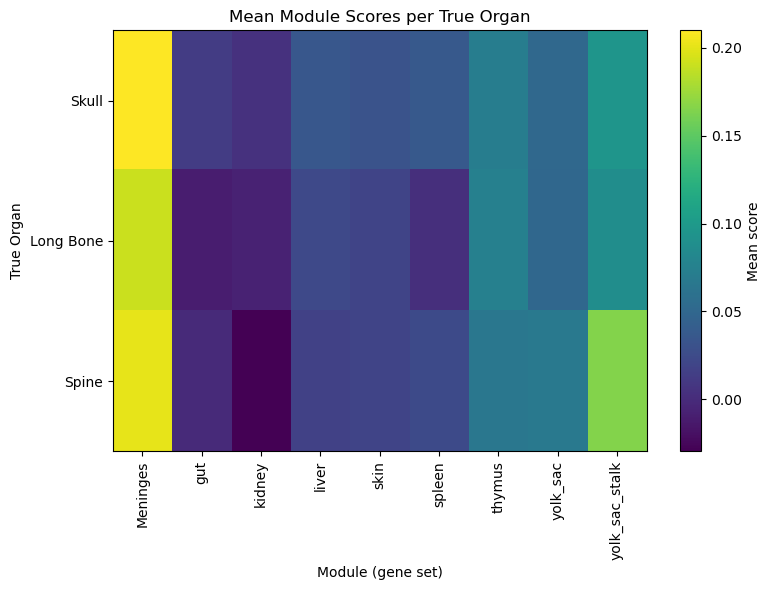

/tmp/ipykernel_3317312/332615487.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(mean_scores['Organ'], rotation=45, ha='right')


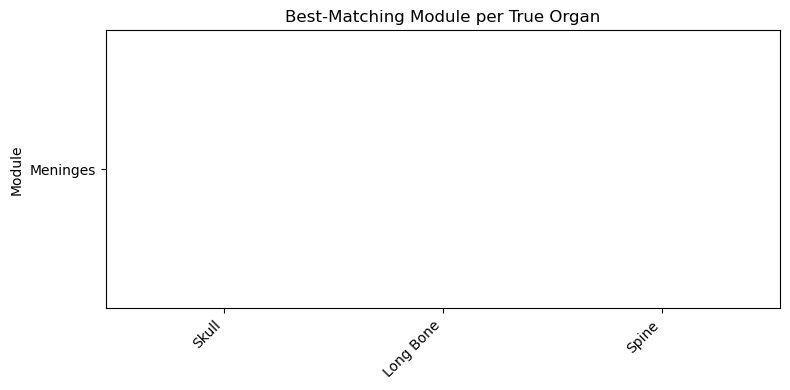

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# assume mean_scores from before, and score_cols defined
# e.g.
# score_cols = [c for c in mean_scores.columns if c.startswith("score_")]

# 1) Heatmap of mean module scores
fig, ax = plt.subplots(figsize=(8, 6))
# extract the matrix of values
M = mean_scores[score_cols].values
im = ax.imshow(M, aspect='auto')

# ticks
ax.set_yticks(np.arange(len(mean_scores)))
ax.set_yticklabels(mean_scores['Organ'])
ax.set_xticks(np.arange(len(score_cols)))
ax.set_xticklabels([c.replace('score_', '') for c in score_cols], rotation=90)

ax.set_title("Mean Module Scores per True Organ")
ax.set_xlabel("Module (gene set)")
ax.set_ylabel("True Organ")

# colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Mean score")

plt.tight_layout()
plt.show()


# 2) Bar chart of “best matching” module per organ
# map module names to integer codes so we can plot them
best = mean_scores['best_matching_module'].values
modules = sorted(set(best))
mod2idx = {m:i for i,m in enumerate(modules)}
y = [mod2idx[m] for m in best]

fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(mean_scores['Organ'], y)
ax.set_yticks(range(len(modules)))
ax.set_yticklabels(modules)
ax.set_xticklabels(mean_scores['Organ'], rotation=45, ha='right')
ax.set_title("Best‐Matching Module per True Organ")
ax.set_ylabel("Module")
plt.tight_layout()
plt.show()


In [110]:
# compute mean score per true-organ
mean_scores = (
    second_trimester.obs
         .groupby("Organ")[score_cols]
         .mean()
         .reset_index()
)

# 5) For each true-organ, find which module scores highest
def best_module(row):
    # drop the 'Organ' column, find col with max value
    scores = row[score_cols]
    best = scores.idxmax().replace("score_", "").replace("_", " ")
    return best

mean_scores["best_matching_module"] = mean_scores.apply(best_module, axis=1)


/tmp/ipykernel_3317312/3896147084.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  second_trimester.obs


In [111]:
mean_scores

Organ  score_Meninges  score_gut  score_kidney  score_liver  \
0      Skull        0.113863  -0.014437      0.097945     0.069292   
1  Long Bone        0.121112  -0.056094      0.032619     0.092574   
2      Spine        0.222138   0.010128      0.093740     0.098263   

   score_skin  score_spleen  score_thymus  score_yolk_sac  \
0    0.051637      0.195647      0.271913        0.112008   
1   -0.030769      0.458353      0.283208        0.106895   
2    0.189373      0.398604      0.240201        0.146208   

   score_yolk_sac_stalk best_matching_module  
0              0.027816               thymus  
1             -0.002505               spleen  
2              0.044994               spleen

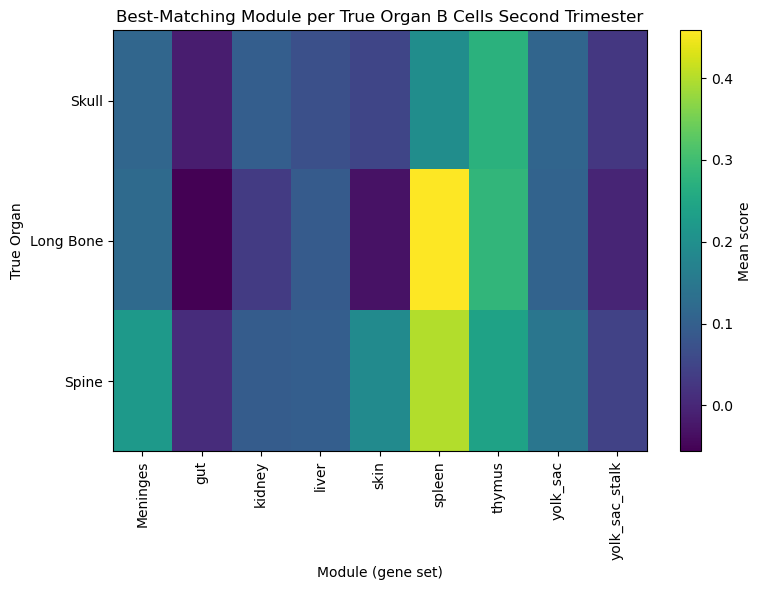

/tmp/ipykernel_3317312/3901553787.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(mean_scores['Organ'], rotation=45, ha='right')


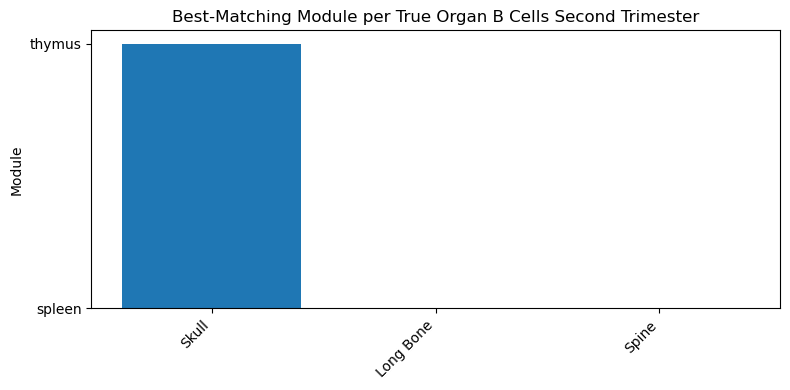

In [119]:
import matplotlib.pyplot as plt
import numpy as np

# assume mean_scores from before, and score_cols defined
# e.g.
# score_cols = [c for c in mean_scores.columns if c.startswith("score_")]

# 1) Heatmap of mean module scores
fig, ax = plt.subplots(figsize=(8, 6))
# extract the matrix of values
M = mean_scores[score_cols].values
im = ax.imshow(M, aspect='auto')

# ticks
ax.set_yticks(np.arange(len(mean_scores)))
ax.set_yticklabels(mean_scores['Organ'])
ax.set_xticks(np.arange(len(score_cols)))
ax.set_xticklabels([c.replace('score_', '') for c in score_cols], rotation=90)

ax.set_title("Best‐Matching Module per True Organ B Cells Second Trimester")
ax.set_xlabel("Module (gene set)")
ax.set_ylabel("True Organ")

# colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Mean score")

plt.tight_layout()
plt.show()


# 2) Bar chart of “best matching” module per organ
# map module names to integer codes so we can plot them
best = mean_scores['best_matching_module'].values
modules = sorted(set(best))
mod2idx = {m:i for i,m in enumerate(modules)}
y = [mod2idx[m] for m in best]

fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(mean_scores['Organ'], y)
ax.set_yticks(range(len(modules)))
ax.set_yticklabels(modules)
ax.set_xticklabels(mean_scores['Organ'], rotation=45, ha='right')
ax.set_title("Best‐Matching Module per True Organ B Cells Second Trimester")
ax.set_ylabel("Module")
plt.tight_layout()
plt.show()


In [120]:

second_trimester.obs["Organ"].value_counts()

Organ
Long Bone    32281
Spine        11154
Skull           38
Name: count, dtype: int64

In [115]:
first_trimester.obs["Organ"].value_counts()

Organ
Spine        172
Long Bone    143
Skull        108
Name: count, dtype: int64

In [116]:
import scanpy as sc
import pandas as pd

# 1) Load your query AnnData
prog= sc.read_h5ad('/lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/haem_compartment/Myeloid_haem.h5ad')# ensure you have a raw_counts layer (or whichever layer you want to score)

In [69]:
prog.obs['Organ'].value_counts()

Organ
Long Bone    47890
Spine        15940
Skull         7413
Name: count, dtype: int64

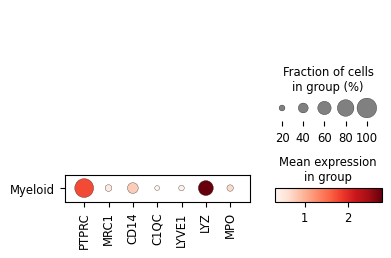

In [76]:
sc.pl.dotplot(prog,["PTPRC","MRC1","CD14","C1QC","LYVE1","LYZ","MPO"], groupby= "Manual_Annotation_Level2")

In [80]:
prog.obs['Age_Final'].value_counts()

Age_Final
17      18542
15      11781
14       9362
12       6794
16       6384
19       3506
9.4      2155
11.2     1923
10       1922
13       1834
13.0     1495
10.3     1129
9         816
8.6       534
7         377
7.3       347
8.5       341
8         272
7.6       233
5         233
9.3       225
5.7       221
8.3       203
8.4       161
6.1       127
5.8       109
7.2        78
5.6        63
6.5        39
5.4        24
6          10
5.1         3
Name: count, dtype: int64

In [82]:
# 1) Convert to numeric, coercing invalid strings into NaN
prog.obs['Age_Final_numeric'] = pd.to_numeric(
    prog.obs['Age_Final'].astype(str).str.strip(),
    errors='coerce'
)


In [84]:
prog.obs['Age_Final_numeric'].value_counts()

Age_Final_numeric
17.0    18542
15.0    11781
14.0     9362
12.0     6794
16.0     6384
19.0     3506
13.0     3329
9.4      2155
11.2     1923
10.0     1922
10.3     1129
9.0       816
8.6       534
7.0       377
7.3       347
8.5       341
8.0       272
5.0       233
7.6       233
9.3       225
5.7       221
8.3       203
8.4       161
6.1       127
5.8       109
7.2        78
5.6        63
6.5        39
5.4        24
6.0        10
5.1         3
Name: count, dtype: int64

In [94]:
first_trimester= prog[prog.obs['Age_Final_numeric']<12.0]
second_trimester= prog[prog.obs['Age_Final_numeric']>=12.0]

In [95]:
score_cols = [c for c in first_trimester.obs.columns if c.startswith("score_")]

# compute mean score per true-organ
mean_scores = (
    first_trimester.obs
         .groupby("Organ")[score_cols]
         .mean()
         .reset_index()
)
print(mean_scores)

# 5) For each true-organ, find which module scores highest
def best_module(row):
    # drop the 'Organ' column, find col with max value
    scores = row[score_cols]
    best = scores.idxmax().replace("score_", "").replace("_", " ")
    return best

mean_scores["best_matching_module"] = mean_scores.apply(best_module, axis=1)
print(mean_scores[["Organ", "best_matching_module"]])


       Organ  score_Meninges  score_gut  score_kidney  score_liver  \
0      Skull        0.232918  -0.002297      0.229507     0.202672   
1  Long Bone        0.202519  -0.007115      0.185453     0.239373   
2      Spine        0.184153  -0.039835      0.053567     0.356001   

   score_skin  score_spleen  score_thymus  score_yolk_sac  \
0    0.139359      0.067395      0.092292        0.274501   
1    0.140865      0.124764      0.093327        0.310090   
2    0.108054      0.278236      0.114831        0.404639   

   score_yolk_sac_stalk  
0              0.044463  
1              0.032158  
2              0.032135  
       Organ best_matching_module
0      Skull             yolk sac
1  Long Bone             yolk sac
2      Spine             yolk sac


/tmp/ipykernel_3317312/2638089526.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  first_trimester.obs


In [96]:
mean_scores

Organ  score_Meninges  score_gut  score_kidney  score_liver  \
0      Skull        0.232918  -0.002297      0.229507     0.202672   
1  Long Bone        0.202519  -0.007115      0.185453     0.239373   
2      Spine        0.184153  -0.039835      0.053567     0.356001   

   score_skin  score_spleen  score_thymus  score_yolk_sac  \
0    0.139359      0.067395      0.092292        0.274501   
1    0.140865      0.124764      0.093327        0.310090   
2    0.108054      0.278236      0.114831        0.404639   

   score_yolk_sac_stalk best_matching_module  
0              0.044463             yolk sac  
1              0.032158             yolk sac  
2              0.032135             yolk sac

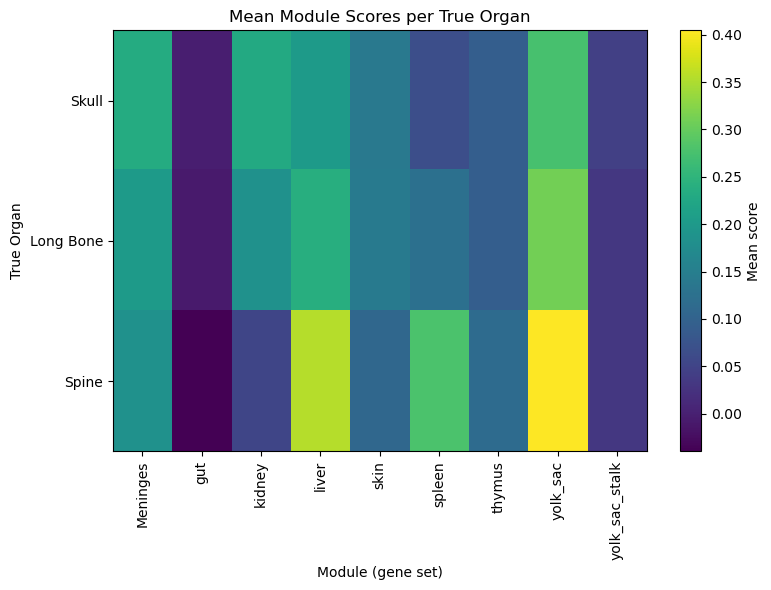

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# assume mean_scores from before, and score_cols defined
# e.g.
# score_cols = [c for c in mean_scores.columns if c.startswith("score_")]

# 1) Heatmap of mean module scores
fig, ax = plt.subplots(figsize=(8, 6))
# extract the matrix of values
M = mean_scores[score_cols].values
im = ax.imshow(M, aspect='auto')

# ticks
ax.set_yticks(np.arange(len(mean_scores)))
ax.set_yticklabels(mean_scores['Organ'])
ax.set_xticks(np.arange(len(score_cols)))
ax.set_xticklabels([c.replace('score_', '') for c in score_cols], rotation=90)

ax.set_title("Mean Module Scores per True Organ")
ax.set_xlabel("Module (gene set)")
ax.set_ylabel("True Organ")

# colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Mean score")

plt.tight_layout()
plt.show()

In [98]:
score_cols = [c for c in second_trimester.obs.columns if c.startswith("score_")]

# compute mean score per true-organ
mean_scores = (
    second_trimester.obs
         .groupby("Organ")[score_cols]
         .mean()
         .reset_index()
)
print(mean_scores)

# 5) For each true-organ, find which module scores highest
def best_module(row):
    # drop the 'Organ' column, find col with max value
    scores = row[score_cols]
    best = scores.idxmax().replace("score_", "").replace("_", " ")
    return best

mean_scores["best_matching_module"] = mean_scores.apply(best_module, axis=1)
print(mean_scores[["Organ", "best_matching_module"]])


       Organ  score_Meninges  score_gut  score_kidney  score_liver  \
0      Skull        0.211603  -0.021028      0.198896     0.154079   
1  Long Bone        0.101413  -0.032726      0.012883     0.373847   
2      Spine        0.237969   0.021874      0.104597     0.264735   

   score_skin  score_spleen  score_thymus  score_yolk_sac  \
0    0.121884      0.071930      0.099574        0.240194   
1    0.045268      0.273531      0.148680        0.190267   
2    0.265486      0.283127      0.142842        0.272139   

   score_yolk_sac_stalk  
0              0.023349  
1              0.016263  
2              0.055232  
       Organ best_matching_module
0      Skull             yolk sac
1  Long Bone                liver
2      Spine               spleen


/tmp/ipykernel_3317312/3097440756.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  second_trimester.obs


In [99]:
mean_scores

Organ  score_Meninges  score_gut  score_kidney  score_liver  \
0      Skull        0.211603  -0.021028      0.198896     0.154079   
1  Long Bone        0.101413  -0.032726      0.012883     0.373847   
2      Spine        0.237969   0.021874      0.104597     0.264735   

   score_skin  score_spleen  score_thymus  score_yolk_sac  \
0    0.121884      0.071930      0.099574        0.240194   
1    0.045268      0.273531      0.148680        0.190267   
2    0.265486      0.283127      0.142842        0.272139   

   score_yolk_sac_stalk best_matching_module  
0              0.023349             yolk sac  
1              0.016263                liver  
2              0.055232               spleen

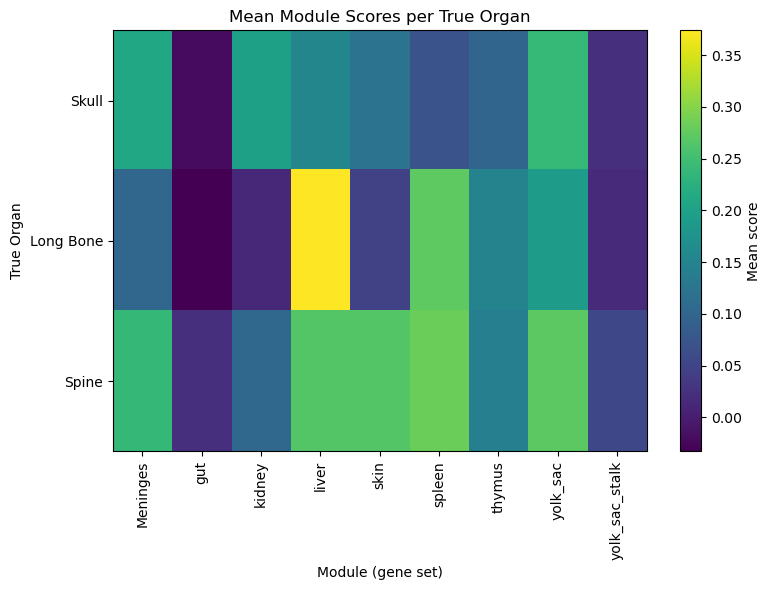

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# assume mean_scores from before, and score_cols defined
# e.g.
# score_cols = [c for c in mean_scores.columns if c.startswith("score_")]

# 1) Heatmap of mean module scores
fig, ax = plt.subplots(figsize=(8, 6))
# extract the matrix of values
M = mean_scores[score_cols].values
im = ax.imshow(M, aspect='auto')

# ticks
ax.set_yticks(np.arange(len(mean_scores)))
ax.set_yticklabels(mean_scores['Organ'])
ax.set_xticks(np.arange(len(score_cols)))
ax.set_xticklabels([c.replace('score_', '') for c in score_cols], rotation=90)

ax.set_title("Mean Module Scores per True Organ")
ax.set_xlabel("Module (gene set)")
ax.set_ylabel("True Organ")

# colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Mean score")

plt.tight_layout()
plt.show()

In [121]:
second_trimester.obs['Organ'].value_counts()

Organ
Long Bone    32281
Spine        11154
Skull           38
Name: count, dtype: int64

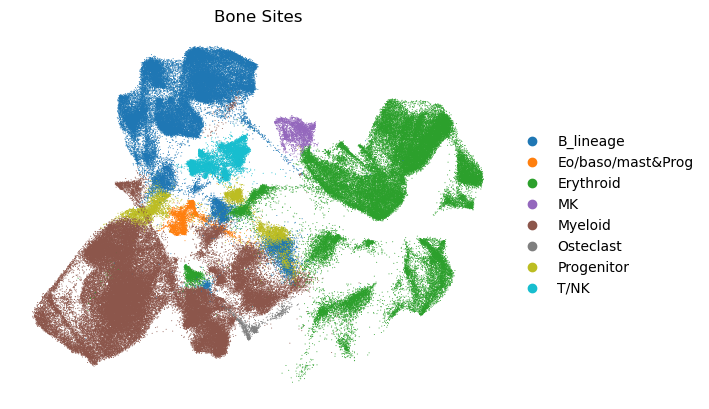

In [62]:
import scanpy as sc

# Set global settings
sc.settings.figsize = (15, 10)   # Width x Height in inches
sc.settings.dpi = 300           # High resolution

sc.pl.umap(
    subset,
    color='Manual_Annotation_Level2',
    size=2,
    legend_loc='right margin',
    frameon=False,
    title='Bone Sites',
    save='_Anatomical_Site_Simplified.png', palette= 'tab10'  # File saved to `figures/` by default
)


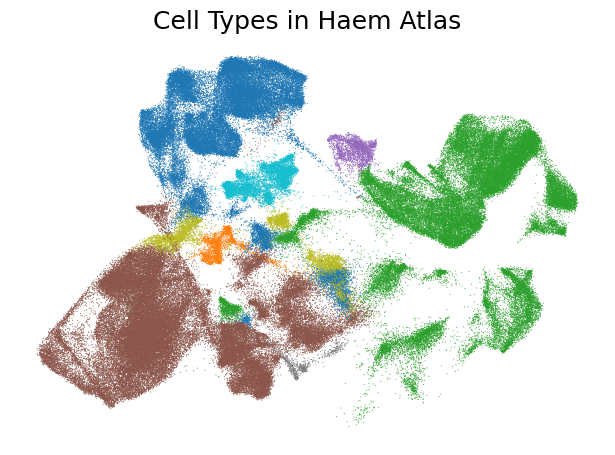

In [64]:
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib.collections import PathCollection
from matplotlib.lines import Line2D
# Set global settings
sc.settings.figsize = (10, 10)   # Width x Height in inches
plt.rcParams.update({"font.size": 15})

# Plot but don't show yet
sc.pl.umap(
    subset,
    color="Manual_Annotation_Level2",
    size=2,
    legend_loc='none',
    frameon=False,
    title="Cell Types in Haem Atlas",
    show=False
)

# Get the current axes & legend
ax = plt.gca()
leg = ax.get_legend()

if leg is not None:
    for h in leg.legend_handles:       # ✅ correct API
        if isinstance(h, PathCollection):   # scatter-style legend
            h.set_sizes([300])              # adjust circle size (default ~20–40)
        elif isinstance(h, Line2D):         # line/marker proxies
            h.set_markersize(10)            # increase marker size in points
    # Adjust legend font size
    plt.setp(leg.get_texts(), fontsize=18)

# Adjust layout
plt.tight_layout()

plt.savefig('Main_Celltypes.png')

plt.show()



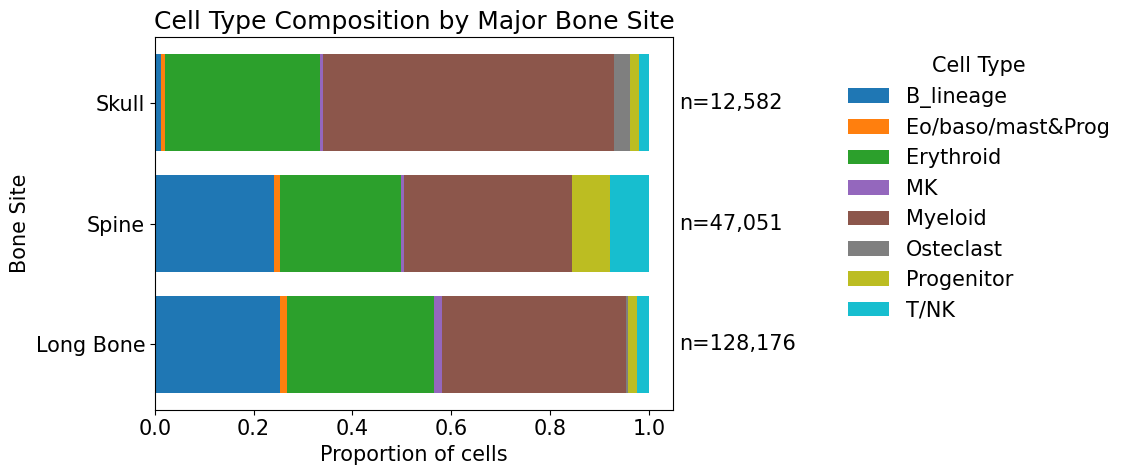

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

celltype_col = "Manual_Annotation_Level2"
site_col     = "Organ"

# Cross-tabulation
counts = pd.crosstab(subset.obs[site_col], adata.obs[celltype_col])
props  = counts.div(counts.sum(axis=1), axis=0)

# Categories & colors from Scanpy palette
cats = subset.obs[celltype_col].cat.categories
colors = subset.uns[celltype_col + "_colors"]

# Order sites by total cells (largest on top)
site_order = counts.sum(axis=1).sort_values(ascending=False).index

# Plot horizontal stacked bar
fig, ax = plt.subplots(figsize=(13, 5))
bottom = np.zeros(len(site_order))

for ct, color in zip(cats, colors):
    vals = props.loc[site_order, ct].values
    ax.barh(site_order, vals, left=bottom, color=color, edgecolor="none", label=ct)
    bottom += vals

# Add total cell count labels at end of bars
totals = counts.sum(axis=1)
# for i, site in enumerate(site_order):
#     ax.text(1.02, i, f"n={totals.loc[site]:,}", va="center")
for i, site in enumerate(site_order):
    ax.text(1.01, i, f"n={totals.loc[site]:,}",
            va="center", transform=ax.get_yaxis_transform())  


ax.set_xlim(0, 1.05)
ax.set_xlabel("Proportion of cells")
ax.set_ylabel("Bone Site")
ax.set_title("Cell Type Composition by Major Bone Site")
ax.legend(title="Cell Type", bbox_to_anchor=(1.3, 1), loc="upper left", frameon=False)

plt.tight_layout()
plt.savefig("barplot_bone_sites_composition.png", dpi=300, bbox_inches="tight")
plt.show()


In [68]:
adata= subset.copy()

In [71]:
pwd

'/nfs/team298/sm54/BoneAtlasProject/src/annotation'